

**블랙보드 만족도 조사를 통해 데이터 결과를 분석하여 개선사항 수렴
및 시스템 고도화 반영**

## _0. 라이브러리 임포트

In [ ]:
import pandas as pd # python에서의 엑셀과 같은 역할
import numpy as np # 계산을 편하게 해 주는 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화
import math

import matplotlib.ticker as ticker # 시각화
import matplotlib.dates as mdates # 시각화

import warnings

warnings.filterwarnings('ignore')

# sns.set_theme(style='white')
# sns.set(font_scale=2)

In [ ]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

# 해당 코드 실행이 완료되면, 반드시 상단의 런타임 > 런타임 다시 시작 누르기. 그리고 재실행

fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


# 데이터 전처리

# _1. 데이터 불러오기 

In [ ]:
%%time
df = pd.read_excel('/content/data.xlsx')
df_base = df.copy()

CPU times: user 707 ms, sys: 51.8 ms, total: 759 ms
Wall time: 875 ms


In [ ]:
df_base.head()

Timestamp    UniqID            소속    학년 성별  \
0   2022/10/18 1:45:14 PM GMT+9  C5559ekz  교육대학원 생물교육전공  석사과정  여   
1  2022/10/24 10:11:29 AM GMT+9  S9340unw    정보대학 컴퓨터학과   1학년  여   
2  2022/10/24 10:14:12 AM GMT+9  Q6348ilg     경영대학 경영학과   4학년  여   
3  2022/10/24 10:23:01 AM GMT+9  F7696nak   문과대학 중어중문학과   3학년  여   
4  2022/10/24 10:26:54 AM GMT+9  C5856rtq      이과대학 화학과   2학년  여   

   1. 블랙보드 시스템에 전반적으로 만족하십니까? 2. 학기중 블랙보드에는 얼마나 자주 접속하십니까?  \
0                           4                    하루에 3회 이상   
1                           3                    하루에 3회 이상   
2                           4                      하루에 한 번   
3                           4                      하루에 한 번   
4                           3                    하루에 3회 이상   

  3. 학기중 블랙보드를 가장 많이 활용한 시간대는 언제입니까?  4. 학기 중 블랙보드 사이트 접속이 신속하게 이루어집니까?  \
0                   저녁 (18:00-24:00)                                  5   
1                    새벽 (24:00-6:00)                                  2   
2                   저녁 (18:00-24:00)                                  4   
3                  오후2 (15:00-18:00)                                  4   
4                  오후2 (15:00-18:00)                                  4   

  5. 어떤 브라우저를 사용하여 블랙보드를 주로 접속하십니까?  ...  \
0                        크롬(Chrome)  ...   
1                        크롬(Chrome)  ...   
2                        크롬(Chrome)  ...   
3                          Mac용 사파리  ...   
4                        크롬(Chrome)  ...   

   41. 실시간 강의 도구(ZOOM, Collaborate) 기능에 만족하십니까?   \
0                                              4   
1                                              4   
2                                              4   
3                                              4   
4                                              4   

   42. 실시간 강의 도구(ZOOM, Collaborate) 기능에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.  \
0                                  소리 송출 문제 좀 해결해주세요                    
1                      녹화본 접근 방법이 조금 복잡 (어흥톡 보고 깨달음)                    
2                                                NaN                    
3                                                 없음                    
4                                                NaN                    

   43. 성적 기능에 얼마나 만족하십니까?  44. 성적 기능에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.  \
0                       3                                       NaN   
1                       4                     성적 상대적 그래프 보는 기능? 활성화   
2                       4                                       NaN   
3                       4                                 한 학기 성적보기   
4                       4                                       NaN   

  45. 학습관리시스템(LMS) 블랙보드와 관련하여 개선되었으면 하는 사항 및 기타 하고 싶으신 말씀에 대해 작성해주십시오.  \
0                                                                        
1                                                NaN                     
2                                                NaN                     
3                                                 없음                     
4                                                NaN                     

  46. 차세대 학습관리시스템(LMS)를 도입하는 것에 대해 어떻게 생각하십니까?   \
0                        차세대 학습관리시스템(LMS) 도입 희망   
1                        차세대 학습관리시스템(LMS) 도입 희망   
2                       현재 학습관리시스템(LMS) 블랙보드 유지   
3                       현재 학습관리시스템(LMS) 블랙보드 유지   
4                                          상관없음   

  47. 차세대 학습관리시스템(LMS)을 도입을 희망하지 않는 이유에 대해 작성하여 주십시오.  \
0                                                NaN    
1                                                NaN    
2                                          변경시 혼란 가중    
3                                              현재 만족    
4                                                NaN    

  48. 차세대 학습관리시스템(LMS)을 도입을 희망하는 이유에 대해 작성하여 주십시오.  \
0                    블랙보드가 구린데 이거보단 괜찮을거라고 생각합니다.    
1                                          블랙보드 불편   
2                                              NaN   
3                                 

#_2. 데이터 파악하기 

## 2.1 data spec 파악

In [ ]:
df_base.shape

(220, 55)

In [ ]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

df_base.head(2)

Timestamp    UniqID            소속    학년 성별  \
0   2022/10/18 1:45:14 PM GMT+9  C5559ekz  교육대학원 생물교육전공  석사과정  여   
1  2022/10/24 10:11:29 AM GMT+9  S9340unw    정보대학 컴퓨터학과   1학년  여   

   1. 블랙보드 시스템에 전반적으로 만족하십니까? 2. 학기중 블랙보드에는 얼마나 자주 접속하십니까?  \
0                           4                    하루에 3회 이상   
1                           3                    하루에 3회 이상   

  3. 학기중 블랙보드를 가장 많이 활용한 시간대는 언제입니까?  4. 학기 중 블랙보드 사이트 접속이 신속하게 이루어집니까?  \
0                   저녁 (18:00-24:00)                                  5   
1                    새벽 (24:00-6:00)                                  2   

  5. 어떤 브라우저를 사용하여 블랙보드를 주로 접속하십니까?  6. 블랙보드 메인 화면의 구성 및 디자인에 만족하십니까?  \
0                        크롬(Chrome)                                 1   
1                        크롬(Chrome)                                 2   

   7. 블랙보드 강의실 내 메뉴는 직관적이라고 생각하십니까?  8. 블랙보드에서 제공되는 정보들은 잘 분류되어 있습니까?  \
0                                 1                                 4   
1                                 2                                 3   

   9. 블랙보드 내 글자 크기(메뉴 텍스트, 본문, 코스 정보 등)는 적정합니까?  \
0                                             4   
1                                             2   

  10. 블랙보드 내에서 가장 선호하는 온라인수업(비대면) 운영 방식은 무엇입니까?  \
0                                녹화영상(영상 출석콘텐츠)   
1                                녹화영상(영상 출석콘텐츠)   

  11. 귀하가 생각하는 가장 효과적인 블랙보드 내 학습활동은 무엇입니까? 12. 블랙보드 내 학습의 한계는 무엇이라고 생각하십니까?  \
0                         영상 출석콘텐츠 외 자료 제공           교수-학생·학생-학생 간 의사소통의 부족   
1                                       과제           교수-학생·학생-학생 간 의사소통의 부족   

  13. 블랙보드 내 수강 환경의 한계는 무엇이라고 생각하십니까?  \
0                             시스템 불안정   
1                       온라인수업 시 집중 저하   

  14. 블랙보드 영상 출석콘텐츠 수업 방식에 대해 전반적으로 만족합니까?  \
0                                       보통   
1                                       만족   

  15. 블랙보드 영상 출석콘텐츠 수업 방식의 한계는 무엇이라고 생각하십니까? (복수응답 가능)  \
0                                           출석 반영 오류     
1                                       재생 오류로 인한 끊김     

  16. 실시간 화상강의(Zoom, Collaborate) 수업 방식에 대해 전반적으로 만족합니까?  \
0                                                 보통       
1                                                 보통       

  17. 실시간 화상강의(Zoom, Collaborate)를 활용한 온라인수업의 한계는 무엇이라고 생각하십니까? (복수응답 가능)  \
0                         음향이 작거나 울림;접속 오류로 인한 수업 끊김                        
1                                                 없음                        

  18. 블랙보드 내에서 가장 선호하는 소통 방식을 선택하여 주십시오.   19. 블랙보드 기능에 전반적으로 만족하십니까?  \
0                                      없음                           3   
1                               과제·퀴즈 피드백                           3   

   20. 블랙보드 기능은 전반적으로 사용하기 쉽습니까?  \
0                              5   
1                              2   

  21. 블랙보드 이용 시 오류를 겪었다면, 어떤 유형의 오류였는지 표기해주십시오. (복수응답 가능)  \
0  실시간 화상강의(Zoom, Collaborate) 참여;출석 반영 오류;시험 응시 ...        
1  실시간 화상강의(Zoom, Collaborate) 참여;코스 화면 접속;출석 반영 ...        

   22. 블랙보드 홈페이지는 LMS를 사용하는데 필요한 정보를 손쉽게 찾고 관련 안내를 신속하게 전달할 수 있도록 구성되었습니다. 이 구성에 만족하십니까?   \
0                                                  4                                        
1                                                  1                                        

   23. 모바일 APP Blackboard는 웹에서 이용하는 주요 기능을 모바일 기기에서 이용 가능하도록 구성되었습니다. 모바일 APP 이용에 얼마나 만족하십니까?  \
0                                                  3                                            
1                                                  1                                            

  24. 모바일 APP 이용 시 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.  \
0  전반적인 모든 것(사실 모바일 사용을 권장하지 않고 있지 않습니까 ??! ㅎㅎ)   
1                         코스 화면이 안 들어가짐 UI도 별로임   

   25. 코스 화면에서는 과거 코스, 현재 수강 중인 코스 목록을 손쉽게 파악할 수 있도록 구성되어 있습니다. 코스 화면 구성에 만족하십니까?  \
0                                                  5                                
1                                                  2                                

     26. 코스 화면에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.  \
0                      

In [ ]:
df_base['basic'] = 1 # 전체 집계 시 활용할 컬럼 

## 2.2 data scheme 파악



| idx | column | desc | type |
| --- | --- | --- | --- |
| 0 | Timestamp | 설문답변시각 | 시간 |
| 1 | UniqID | 학번 | 개인정보 |
| 2 | 소속 | 단과대+소속학과 | 개인정보_소속 |
| 3 | 학년 | 학년 | 개인정보 |
| 4 | 성별 | 성별 | 개인정보 | 
| ------ | ------------------------------ | ------------------------------ |------------------------------ |
| 5 | q01 | 전반적 만족도 | 블랙보드_만족도 | 
| 6 | q02 | 접속 빈도 | 블랙보드_접속빈도 | 
| 7 | q03 | 활용 시간대 | 블랙보드_접속시간대 | 
| 8 | q04 | 접속의 신속도 | 블랙보드_접속신속도 | 
| 9 | q05 | 사용 브라우저 | 블랙보드_브라우저 | 
| 10 | q06 | UI/UX 만족도 | 블랙보드_디자인 | 
| 11 | q07 | 메뉴 직관성 | 블랙보드_직관성 | 
| 12 | q08 | 정보 분류 | 블랙보드_정보분류 | 
| 13 | q09 | 글자크기 | 블랙보드_글자크기 | 
| 14 | q10 | 선호 비대면운영방식 | 블랙보드_수업방식 | 
| 15 | q11 | 효과적인 학습활동 | 블랙보드_학습활동 | 
| 16 | q12 | 학습 한계 | 블랙보드_한계점_학습 | 
| 17 | q13 | 환경 한계 | 블랙보드_한계점_수강환경 | 
| ------ | ------------------------------ | ------------------------------ |------------------------------ |
| 18 | q14 | 영상 출석콘텐츠 만족도 | 영상강의_만족도 | 
| 19 | q15 | 영상 출석콘텐츠 한계점 | 영상강의_한계점 | 
| ------ | ------------------------------ | ------------------------------ |------------------------------ |
| 20 | q16 | 실시간 화상강의 만족도 | 실시간강의_만족도 | 
| 21 | q17 | 실시간 화상강의 한계점 | 실시간강의_만족도 | 
| ------ | ------------------------------ | ------------------------------ |------------------------------ |
| 22 | q18 | 선호 소통방식 | 블랙보드_소통방식 | 
| 23 | q19 | 기능 만족도 | 블랙보드_기능_만족도 | 
| 24 | q20 | 기능 사용성 | 블랙보드_기능_사용성 | 
| 25 | q21 | 오류 유형 | 블랙보드_오류유형 | 
| 26 | q22 | 블랙보드 내 LMS 구성만족도 | 블랙보드_LMS |
| ------ | ------------------------------ | ------------------------------ |------------------------------ | 
| 27 | q23 | 앱 이용 만족도| 앱_만족도 | 
| 28 | q24 | 앱 개선점 | 앱_개선점 |
| ------ | ------------------------------ | ------------------------------ |------------------------------ |  
| 29 | q25 | 코스 화면 구성 만족도 | 코스_화면_구성만족도 | 
| 30 | q26 | 코스 개선점 | 코스_화면_개선점 | 
| 31 | q27 | 코스 좌측메뉴 구성| 코스_좌측메뉴_만족도 | 
| 32 | q28 | 코스 좌측메뉴 개선점 | 코스_좌측메뉴_개선점 | 
| 33 | q29 | 코스 공지사항 기능 만족도 | 코스_공지사항_만족도 | 
| 34 | q30 | 코스 공지사항 개선점 | 코스_공지사항_개선점 | 
| ------ | ------------------------------ | ------------------------------ |------------------------------ |  
| 35 | q31 | 영상출결콘텐츠 기능 만족도 | 영상출결콘텐츠_만족도 | 
| 36 | q32 | 영상출결콘텐츠 개선점 | 영상출결콘텐츠_개선점 | 
| ------ | ------------------------------ | ------------------------------ |------------------------------ |  
| 37 | q33 | 과제 제출 및 피드백 기능 만족도 | 과제기능_만족도 | 
| 38 | q34 | 과제 제출 및 피드백 기능 개선점 | 과제기능_개선점 | 
| ------ | ------------------------------ | ------------------------------ |------------------------------ |  
| 39 | q35 | 그룹활동 기능 만족도 | 그룹활동_만족도 | 
| 40 | q36 | 그룹활동 기능 개선점 | 그룹활동_개선점 | 
| ------ | ------------------------------ | ------------------------------ |------------------------------ |  
| 41 | q37 | 영상출결콘텐츠 출석현황 기능 만족도 | 영상출결콘텐츠_출결현황 | 
| 42 | q38 | 영상출석현황 개선점 | 영상출결콘텐츠_출결현황_개선점 | 
| ------ | ------------------------------ | ------------------------------ |------------------------------ |  
| 43 | q39 | 시험/락다운브라우저 기능 만족도 | 시험기능_만족도 | 
| 44 | q40 | 시험/락다운브라우저 기능 개선점| 시험기능_개선점 | 
| ------ | ------------------------------ | ------------------------------ |------------------------------ |  
| 45 | q41 | 실시간 강의도구 기능 만족도 | 실시간강의도구_만족도 | 
| 46 | q42 | 실시간 강의도구 기능 개선점 | 실시간강의도구_개선점 | 
| ------ | ------------------------------ | ------------------------------ |------------------------------ |  
| 47 | q43 | 성적 기능 만족도 | 성적기능_만족도 | 
| 48 | q44 | 성적 기능 개선점 | 성적기능_개선점 | 
| ------ | ------------------------------ | ------------------------------ |------------------------------ | 
| 49 | q45 | LMS 블랙보드 관련 의견 | LMS_의견 | 
| 50 | q46 | LMS 도입에 대한 의견 | LMS_도입의견 | 
| 51 | q47 | LMS 도입 비희망 이유 | LMS_도입_비희망이유 | 
| 52 | q48 | LMS 도입 희망 이유 | LMS_도입_희망이유 | 
| 53 | q49 | LMS 도입 시 유지해야 할 기능 | LMS_도입_유지기능 | 
| 54 | q50 | LMS 도입 시 새로 도입해야할 기능 | LMS_도입_추가기능 |
| ------ | ------------------------------ | ------------------------------ |------------------------------ | 


#_3. 데이터 가공하기

## 3.1 컬럼명 수정

In [ ]:
dic = {}
question = df_base.columns.to_list()[5:-1]

for i in range(1, 51): 
  if i < 10: 
    key = "q0" + str(i)
  else: 
    key = "q" + str(i) 
  
  dic[key] = question[i-1]

questions_full = dic

In [ ]:
df_base.rename(
    columns = {
        'Timestamp':'timestamp',
        'UniqID':'user_id',
        '소속':'from',
        '학년':'grade',
        '성별':'sex',
        '1. 블랙보드 시스템에 전반적으로 만족하십니까?':'q01',
        '2. 학기중 블랙보드에는 얼마나 자주 접속하십니까?':'q02',
        '3. 학기중 블랙보드를 가장 많이 활용한 시간대는 언제입니까?' :'q03',
        '4. 학기 중 블랙보드 사이트 접속이 신속하게 이루어집니까?':'q04',
        '5. 어떤 브라우저를 사용하여 블랙보드를 주로 접속하십니까?':'q05',
        '6. 블랙보드 메인 화면의 구성 및 디자인에 만족하십니까?':'q06',
        '7. 블랙보드 강의실 내 메뉴는 직관적이라고 생각하십니까?':'q07',
        '8. 블랙보드에서 제공되는 정보들은 잘 분류되어 있습니까?':'q08',
        '9. 블랙보드 내 글자 크기(메뉴 텍스트, 본문, 코스 정보 등)는 적정합니까?':'q09',
        '10. 블랙보드 내에서 가장 선호하는 온라인수업(비대면) 운영 방식은 무엇입니까?':'q10',
        '11. 귀하가 생각하는 가장 효과적인 블랙보드 내 학습활동은 무엇입니까?':'q11',
        '12. 블랙보드 내 학습의 한계는 무엇이라고 생각하십니까?':'q12',
        '13. 블랙보드 내 수강 환경의 한계는 무엇이라고 생각하십니까?':'q13',
        '14. 블랙보드 영상 출석콘텐츠 수업 방식에 대해 전반적으로 만족합니까?':'q14',
        '15. 블랙보드 영상 출석콘텐츠 수업 방식의 한계는 무엇이라고 생각하십니까? (복수응답 가능)':'q15',
        '16. 실시간 화상강의(Zoom, Collaborate) 수업 방식에 대해 전반적으로 만족합니까?':'q16',
        '17. 실시간 화상강의(Zoom, Collaborate)를 활용한 온라인수업의 한계는 무엇이라고 생각하십니까? (복수응답 가능)':'q17',
        '18. 블랙보드 내에서 가장 선호하는 소통 방식을 선택하여 주십시오. ':'q18',
        '19. 블랙보드 기능에 전반적으로 만족하십니까?':'q19',
        '20. 블랙보드 기능은 전반적으로 사용하기 쉽습니까?':'q20',
        '21. 블랙보드 이용 시 오류를 겪었다면, 어떤 유형의 오류였는지 표기해주십시오. (복수응답 가능)':'q21',
        '22. 블랙보드 홈페이지는 LMS를 사용하는데 필요한 정보를 손쉽게 찾고 관련 안내를 신속하게 전달할 수 있도록 구성되었습니다. 이 구성에 만족하십니까? ':'q22',
        '23. 모바일 APP Blackboard는 웹에서 이용하는 주요 기능을 모바일 기기에서 이용 가능하도록 구성되었습니다. 모바일 APP 이용에 얼마나 만족하십니까?':'q23',
        '24. 모바일 APP 이용 시 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.':'q24',
        '25. 코스 화면에서는 과거 코스, 현재 수강 중인 코스 목록을 손쉽게 파악할 수 있도록 구성되어 있습니다. 코스 화면 구성에 만족하십니까?':'q25',
        '26. 코스 화면에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.':'q26',
        '27. 코스 홈 접속 후 좌측에 나타나는 코스 메뉴 구성에 만족하십니까?':'q27',
        '28. 코스 메뉴 구성에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.':'q28',
        '29. 코스 메뉴 공지사항 기능에 만족하십니까?':'q29',
        '30. 코스 메뉴 공지사항 기능 중 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.':'q30',
        '31. 영상 출결 콘텐츠(커먼즈, 유튜브, 구글 드라이브) 기능에 만족하십니까? ':'q31',
        '32. 영상 출결 콘텐츠(커먼즈, 유튜브, 구글 드라이브) 기능 중 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.':'q32',
        '33. 과제 제출 및 피드백 기능(턴잇인, SafeAssign)에 얼마나 만족하십니까?':'q33',
        '34. 과제 제출 및 피드백 기능에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.':'q34',
        '35. 그룹활동(토론, 블로그, 저널) 기능에 만족하십니까?':'q35',
        '36. 그룹활동(토론, 블로그, 저널) 기능에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.':'q36',
        '37.  영상 출결 콘텐츠  출석 현황 기능에 만족하십니까?':'q37',
        '38. 녹화영상 출석 현황에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.':'q38',
        '39. 시험/락다운브라우저 기능에 만족하십니까?':'q39',
        '40. 시험/락다운브라우저 기능 중 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.':'q40',
        '41. 실시간 강의 도구(ZOOM, Collaborate) 기능에 만족하십니까? ':'q41',
        '42. 실시간 강의 도구(ZOOM, Collaborate) 기능에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.':'q42',
        '43. 성적 기능에 얼마나 만족하십니까?':'q43',
        '44. 성적 기능에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.':'q44',
        '45. 학습관리시스템(LMS) 블랙보드와 관련하여 개선되었으면 하는 사항 및 기타 하고 싶으신 말씀에 대해 작성해주십시오.':'q45',
        '46. 차세대 학습관리시스템(LMS)를 도입하는 것에 대해 어떻게 생각하십니까? ':'q46',
        '47. 차세대 학습관리시스템(LMS)을 도입을 희망하지 않는 이유에 대해 작성하여 주십시오.':'q47',
        '48. 차세대 학습관리시스템(LMS)을 도입을 희망하는 이유에 대해 작성하여 주십시오.':'q48',
        '49. 차세대 학습관리시스템(LMS)을 도입하게 된다면, 반드시 유지해야 하는 기능에 대해 작성하여 주십시오.':'q49',
        '50. 차세대 학습관리시스템(LMS)을 도입하게 된다면, 새롭게 도입되길 희망하는 기능에 대해 작성하여 주십시오.':'q50'
    },
    inplace = True
)

In [ ]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 56 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  220 non-null    object
 1   user_id    220 non-null    object
 2   from       220 non-null    object
 3   grade      220 non-null    object
 4   sex        220 non-null    object
 5   q01        220 non-null    int64 
 6   q02        220 non-null    object
 7   q03        220 non-null    object
 8   q04        220 non-null    int64 
 9   q05        220 non-null    object
 10  q06        220 non-null    int64 
 11  q07        220 non-null    int64 
 12  q08        220 non-null    int64 
 13  q09        220 non-null    int64 
 14  q10        220 non-null    object
 15  q11        220 non-null    object
 16  q12        220 non-null    object
 17  q13        220 non-null    object
 18  q14        220 non-null    object
 19  q15        220 non-null    object
 20  q16        220 non-null    objec

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 3.2 새로운 컬럼 생성 
- 단과대학/학과 컬럼 분리 

In [ ]:
df_base['from'].head()

0    교육대학원 생물교육전공
1      정보대학 컴퓨터학과
2       경영대학 경영학과
3     문과대학 중어중문학과
4        이과대학 화학과
Name: from, dtype: object

In [ ]:
def get_college(txt): 
  x = txt.split()
  return x[0]

def get_department(txt):
  x = txt.split()
  if len(x) < 2: 
    return np.nan
  return x[1]

In [ ]:
%%time 
df_base['college'] = df_base['from'].apply(lambda s: get_college(s))
df_base['department'] = df_base['from'].apply(lambda s: get_department(s))

CPU times: user 3.12 ms, sys: 0 ns, total: 3.12 ms
Wall time: 3.28 ms


In [ ]:
def is_graduate(college): 
  if '대학원' in college: 
    return 1
  else:
    return 0

In [ ]:
%%time 
df_base['is_graduate'] = df_base['college'].apply(lambda s: is_graduate(s))

CPU times: user 1.91 ms, sys: 0 ns, total: 1.91 ms
Wall time: 1.92 ms


## 3.2 컬럼 확인

In [ ]:
df_base.columns.to_list()

['timestamp',
 'user_id',
 'from',
 'grade',
 'sex',
 'q01',
 'q02',
 'q03',
 'q04',
 'q05',
 'q06',
 'q07',
 'q08',
 'q09',
 'q10',
 'q11',
 'q12',
 'q13',
 'q14',
 'q15',
 'q16',
 'q17',
 'q18',
 'q19',
 'q20',
 'q21',
 'q22',
 'q23',
 'q24',
 'q25',
 'q26',
 'q27',
 'q28',
 'q29',
 'q30',
 'q31',
 'q32',
 'q33',
 'q34',
 'q35',
 'q36',
 'q37',
 'q38',
 'q39',
 'q40',
 'q41',
 'q42',
 'q43',
 'q44',
 'q45',
 'q46',
 'q47',
 'q48',
 'q49',
 'q50',
 'basic',
 'college',
 'department',
 'is_graduate']

### 3.2.2 column distinct 확인

In [ ]:
print(questions_full['q02'])
print(df_base['q02'].unique().tolist())

2. 학기중 블랙보드에는 얼마나 자주 접속하십니까?
['하루에 3회 이상', '하루에 한 번', '1주에 3회 정도', '1주에 1회 정도', '1달에 1회 정도', '접속하지 않음']


In [ ]:
print(questions_full['q03'])
print(df_base['q03'].unique().tolist())

3. 학기중 블랙보드를 가장 많이 활용한 시간대는 언제입니까?
['저녁 (18:00-24:00)', '새벽 (24:00-6:00)', '오후2 (15:00-18:00)', '오후1 (12:00-15:00)', '오전 (6:00-12:00)']


In [ ]:
# 모든 컬럼 이름에 대한 고유값 확인

idx = 1
for temp_column in df_base.columns:
    print(f'{idx}\n컬럼 이름: {temp_column}')
    if 'q' in temp_column: 
      print(f'문항: {questions_full[temp_column]}') 
    print(f'고유값 개수: {df_base[temp_column].nunique()}\n고유값: {df_base[temp_column].unique().tolist()}\n최대 10개 샘플: {df_base[temp_column].unique()[:11]}\n\n\n\n')
    idx += 1


1
컬럼 이름: timestamp
고유값 개수: 219
고유값: ['2022/10/18 1:45:14 PM GMT+9', '2022/10/24 10:11:29 AM GMT+9', '2022/10/24 10:14:12 AM GMT+9', '2022/10/24 10:23:01 AM GMT+9', '2022/10/24 10:26:54 AM GMT+9', '2022/10/24 10:30:54 AM GMT+9', '2022/10/24 10:32:58 AM GMT+9', '2022/10/24 10:33:45 AM GMT+9', '2022/10/24 10:34:28 AM GMT+9', '2022/10/24 10:34:55 AM GMT+9', '2022/10/24 10:37:33 AM GMT+9', '2022/10/24 10:38:18 AM GMT+9', '2022/10/24 10:39:17 AM GMT+9', '2022/10/24 10:39:56 AM GMT+9', '2022/10/24 10:40:23 AM GMT+9', '2022/10/24 10:40:29 AM GMT+9', '2022/10/24 10:47:11 AM GMT+9', '2022/10/24 10:47:52 AM GMT+9', '2022/10/24 10:48:59 AM GMT+9', '2022/10/24 10:50:33 AM GMT+9', '2022/10/24 10:51:15 AM GMT+9', '2022/10/24 10:55:38 AM GMT+9', '2022/10/24 10:57:26 AM GMT+9', '2022/10/24 10:57:33 AM GMT+9', '2022/10/24 10:58:50 AM GMT+9', '2022/10/24 10:59:12 AM GMT+9', '2022/10/24 10:59:22 AM GMT+9', '2022/10/24 10:59:25 AM GMT+9', '2022/10/24 11:01:38 AM GMT+9', '2022/10/24 11:09:19 AM GMT+9', '202

#_4. 데이터 클렌징

## 4.1 주관식 답변 확인
- 이후 워드클라우드 생성 시 필요한 컬럼에 한해서 클렌징 진행 

In [ ]:
rows = df_base.shape[0]

In [ ]:
columns = df_base.columns 
columns_nan = []

for temp_col in columns: 
  if temp_col == 'department': 
    break 
  if df_base[temp_col].isna().sum() > 0: 
    columns_nan.append(temp_col) 
    print(f'{temp_col}\nquestion:{questions_full[temp_col]}\nnumber of nans: {df_base[temp_col].isna().sum()}\n\n')


q24
question:24. 모바일 APP 이용 시 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.
number of nans: 63


q26
question:26. 코스 화면에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.
number of nans: 72


q28
question:28. 코스 메뉴 구성에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.
number of nans: 111


q30
question:30. 코스 메뉴 공지사항 기능 중 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.
number of nans: 105


q32
question:32. 영상 출결 콘텐츠(커먼즈, 유튜브, 구글 드라이브) 기능 중 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.
number of nans: 111


q34
question:34. 과제 제출 및 피드백 기능에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.
number of nans: 119


q36
question:36. 그룹활동(토론, 블로그, 저널) 기능에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.
number of nans: 112


q38
question:38. 녹화영상 출석 현황에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.
number of nans: 117


q40
question:40. 시험/락다운브라우저 기능 중 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.
number of nans: 121


q42
question:42. 실시간 강의 도구(ZOOM, Collaborate) 기능에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.
number of nans: 119


q44
question:44. 성적 기능에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.
number of nans: 117


q45
question:45. 학습관리시스템(LMS) 블랙보드와 관련하여 개선되었으면 하는 사항 및 기타 하고

In [ ]:
print(columns_nan) # 결측치가 있는 문항은 모두 주관식 문항 
questions_str = columns_nan

['q24', 'q26', 'q28', 'q30', 'q32', 'q34', 'q36', 'q38', 'q40', 'q42', 'q44', 'q45', 'q47', 'q48', 'q49', 'q50']


## 4.2 중복데이터 처리 

In [ ]:
df_base['user_id'].nunique() # 중복 데이터 없음 # 한 행이 한 명의 응답자 

220

## 4.3 객관식 답변 확인 

In [ ]:
questions_obj = [q for q in questions if q not in questions_str]
#questions_obj

In [ ]:
# 객관식 답변 고유값 확인 
questions_objs = []
for q in questions_obj: 
  print(f'컬럼 이름: {q}')
  print(f'문항: {questions_full[q]}') 
  print(f'고유값 개수: {df_base[q].nunique()}\n고유값: {df_base[q].unique().tolist()}\n\n')

  if df_base[q].nunique() > 10: 
    questions_objs.append(q)

컬럼 이름: q01
문항: 1. 블랙보드 시스템에 전반적으로 만족하십니까?
고유값 개수: 5
고유값: [4, 3, 1, 2, 5]


컬럼 이름: q02
문항: 2. 학기중 블랙보드에는 얼마나 자주 접속하십니까?
고유값 개수: 6
고유값: ['하루에 3회 이상', '하루에 한 번', '1주에 3회 정도', '1주에 1회 정도', '1달에 1회 정도', '접속하지 않음']


컬럼 이름: q03
문항: 3. 학기중 블랙보드를 가장 많이 활용한 시간대는 언제입니까?
고유값 개수: 5
고유값: ['저녁 (18:00-24:00)', '새벽 (24:00-6:00)', '오후2 (15:00-18:00)', '오후1 (12:00-15:00)', '오전 (6:00-12:00)']


컬럼 이름: q04
문항: 4. 학기 중 블랙보드 사이트 접속이 신속하게 이루어집니까?
고유값 개수: 5
고유값: [5, 2, 4, 3, 1]


컬럼 이름: q05
문항: 5. 어떤 브라우저를 사용하여 블랙보드를 주로 접속하십니까?
고유값 개수: 5
고유값: ['크롬(Chrome)', 'Mac용 사파리', '기타', '엣지(Edge)', 'Mac용 파이어폭스']


컬럼 이름: q06
문항: 6. 블랙보드 메인 화면의 구성 및 디자인에 만족하십니까?
고유값 개수: 5
고유값: [1, 2, 4, 5, 3]


컬럼 이름: q07
문항: 7. 블랙보드 강의실 내 메뉴는 직관적이라고 생각하십니까?
고유값 개수: 5
고유값: [1, 2, 4, 5, 3]


컬럼 이름: q08
문항: 8. 블랙보드에서 제공되는 정보들은 잘 분류되어 있습니까?
고유값 개수: 5
고유값: [4, 3, 5, 1, 2]


컬럼 이름: q09
문항: 9. 블랙보드 내 글자 크기(메뉴 텍스트, 본문, 코스 정보 등)는 적정합니까?
고유값 개수: 5
고유값: [4, 2, 5, 3, 1]


컬럼 이름: q10
문항: 10. 블랙보드 내에서 가장 선호하는 온라인수업(비대면) 운영 방식은 무엇입니까?
고유값 개수: 5
고유값: ['

컬럼 이름: q15
* 문항: 15. 블랙보드 영상 출석콘텐츠 수업 방식의 한계는 무엇이라고 생각하십니까? (복수응답 가능)
* 고유값 개수: 40

컬럼 이름: q17
* 문항: 17. 실시간 화상강의(Zoom, Collaborate)를 활용한 온라인수업의 한계는 무엇이라고 생각하십니까? (복수응답 가능)
* 고유값 개수: 22

컬럼 이름: q21

*   문항: 21. 블랙보드 이용 시 오류를 겪었다면, 어떤 유형의 오류였는지 표기해주십시오. (복수응답 가능)
*  고유값 개수: 60

#EDA 

### _0. 사용자 정보 

In [ ]:
df_college = df_base.groupby('college').agg({'user_id':'count'}).reset_index()
df_college['user_id'].sum()

220

In [ ]:
pd.set_option('display.max_rows', None)

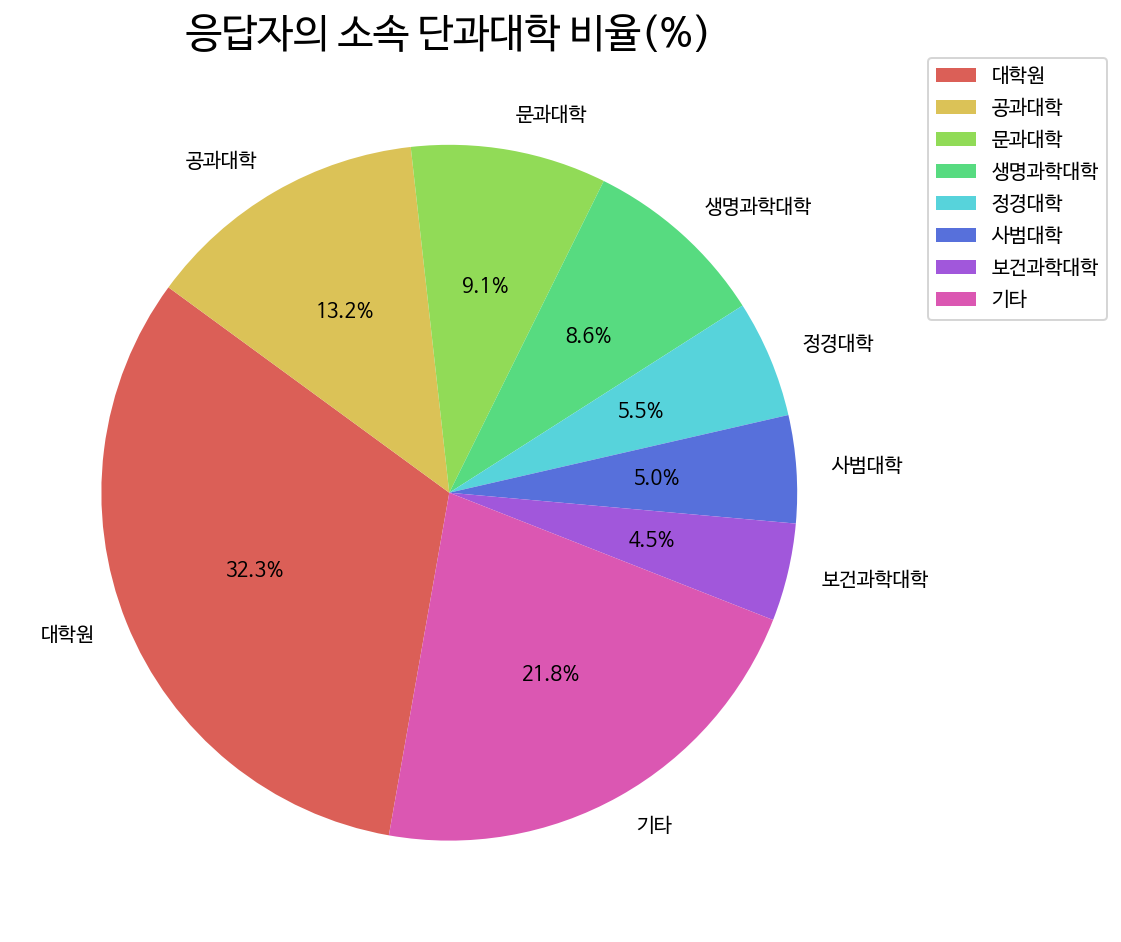

In [ ]:
# sns.set(font_scale=2)

def f_college(college): 
  if '대학원' in college or '정보보호대학' == college: 
    return '대학원'
  elif college == '신소재공학부':
    return '공과대학'
  elif '고려대' in college: 
    return '알수없음'
  elif '/' in college:
    temp = college.split('/')
    if '대학' in temp[0]: 
      return temp[0]
    else: return college
  elif '학과' in college: 
    temp_college = college[:-2]
    return temp_college + '학부'
  elif college == '일반': 
    return '알수없음'
  elif '심리' in college: 
    return '심리학부'
  elif college == '생명환경과학대학':
    return '생명과학대학'
  else:
    return college

df_college['college_v1'] = df_college['college'].apply(lambda s: f_college(s))
df_college_v1 = df_college.groupby('college_v1').agg({'user_id':'sum'}).reset_index().sort_values(by = 'user_id', ascending=False).reset_index()

df_college_v2 = df_college_v1[['college_v1', 'user_id']][0:7]
df_college_v2.loc[7] = ['기타', df_college_v1[7:]['user_id'].sum()]
df_college_v2['ratio'] = df_college_v2['user_id'] / df_college_v2['user_id'].sum() * 100
df_college_v2

# pie graph 
colors = sns.color_palette('hls',len(df_college_v2['college_v1']))

plt.figure(figsize=(8,8))
pie = plt.pie(df_college_v2['ratio'], labels=df_college_v2['college_v1'], autopct='%.1f%%', 
        startangle=260, counterclock=False, 
        colors = colors)

plt.legend(df_college_v2['college_v1']) 
plt.title('응답자의 소속 단과대학 비율(%)', fontsize= 20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()



##_1. 전반적 만족도

In [ ]:
questions_full['q01']

'1. 블랙보드 시스템에 전반적으로 만족하십니까?'

In [ ]:
# df_base.groupby(['basic'])['se_inflowed', 'se_joined', 'se_cert_pv', 'se_cert_done', 'se_tax_calculation', 'se_tax_check', 'se_pay_pv', 'se_is_not_target'].agg('nunique').reset_index()
df_q01 = df_base.groupby('q01').agg(cnts = ('user_id', 'count')).reset_index()
df_q01.sort_values(by = 'cnts', ascending = False, inplace = True)
df_q01

q01  cnts
3    4   143
4    5    36
2    3    21
1    2    16
0    1     4

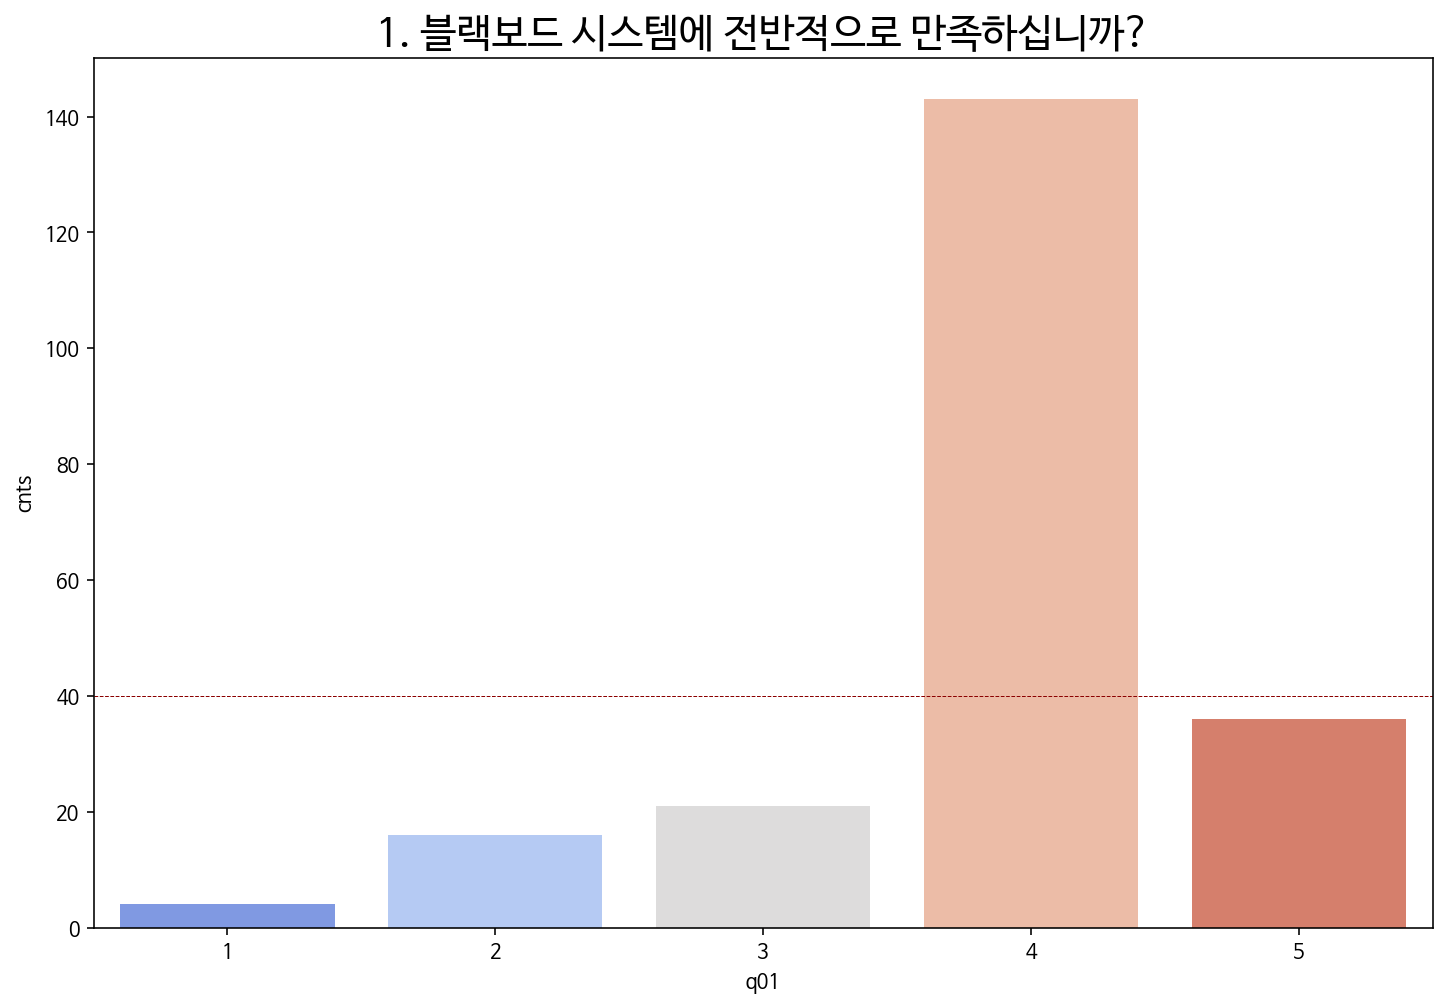

CPU times: user 533 ms, sys: 78.2 ms, total: 612 ms
Wall time: 866 ms


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8)) # 빈 캔버스

# sns.set(font_scale=2)
sns.barplot(
    data = df_q01,
    x = 'q01',
    y = 'cnts', 
    palette= 'coolwarm'
)

#ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x: 0,.0f}'))
plt.title(f'1. 블랙보드 시스템에 전반적으로 만족하십니까?', fontsize = 20)
plt.axhline(40, color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.show()


##_2.접속시간대, 접속 빈도 등의 문항 시각화
- 접속시간대, 접속 빈도 등의 문항을 그래프로 시각화 (한 패널에 여러 개

In [ ]:
df_base['q18'].value_counts() 

과제·퀴즈 피드백                                      89
없음                                             39
수업용 화상강의 외 별도의 추가적인 화상강의(Zoom, Collaborate)    38
토론방                                            29
메시지                                            24
블로그·위키 피드백                                      1
Name: q18, dtype: int64

In [ ]:
df_base['q11'].value_counts() 

영상 출석콘텐츠 외 자료 제공    93
과제                  82
퀴즈/시험               25
토론                  10
없음                   8
조별 활동                1
질의 응답                1
Name: q11, dtype: int64

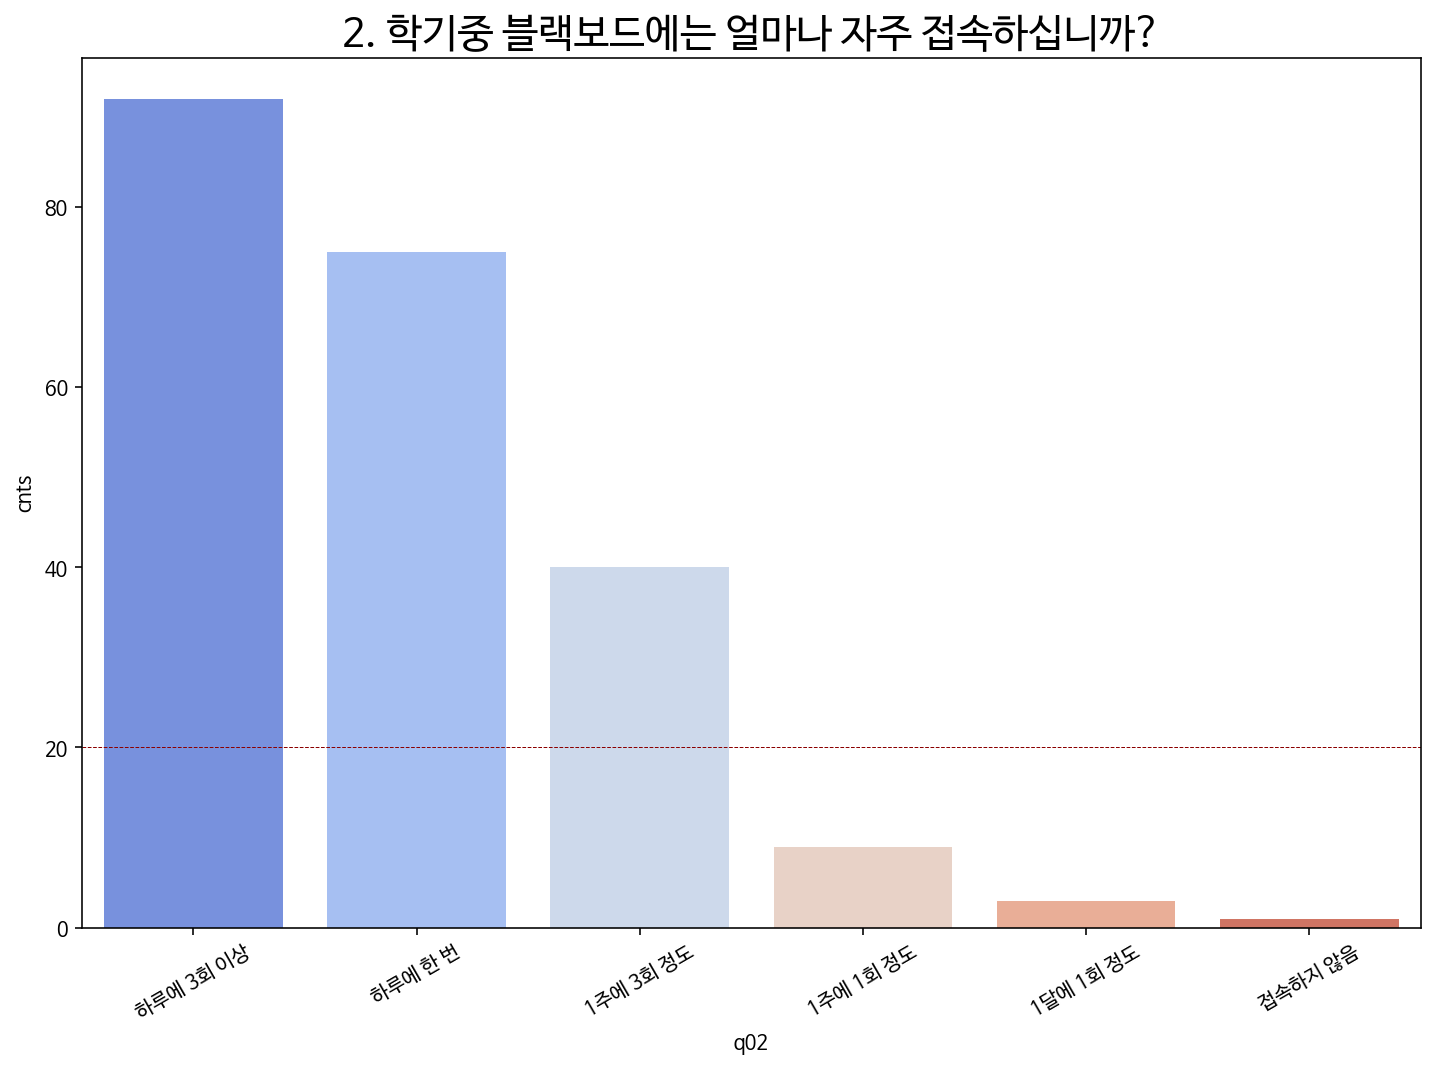

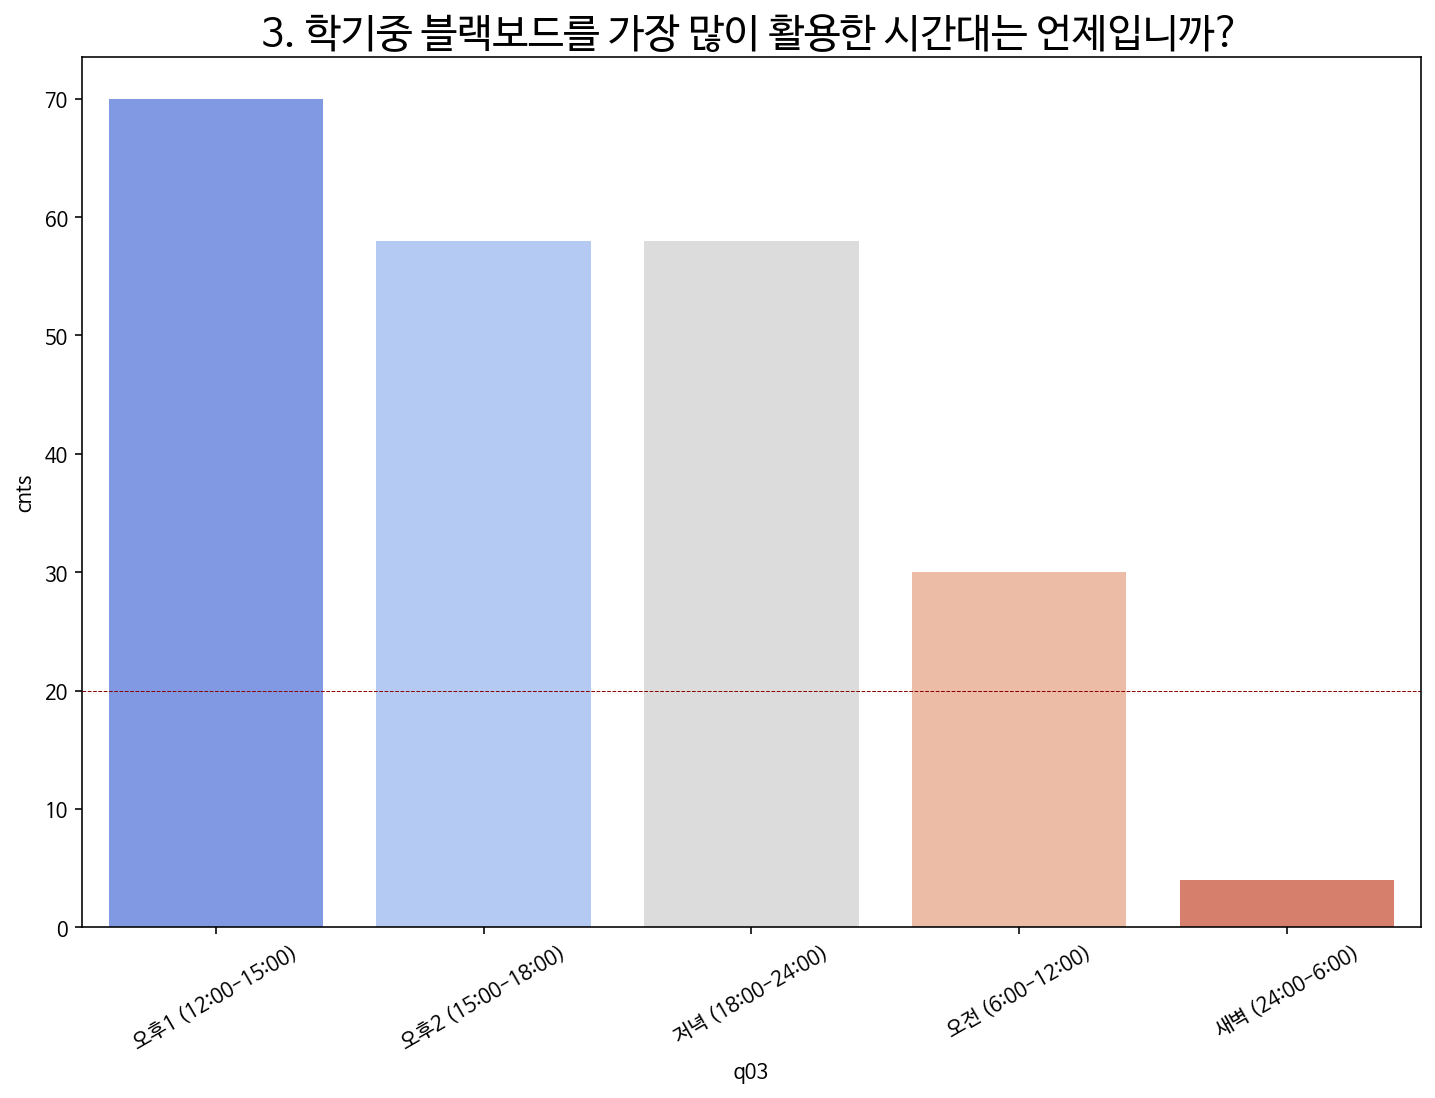

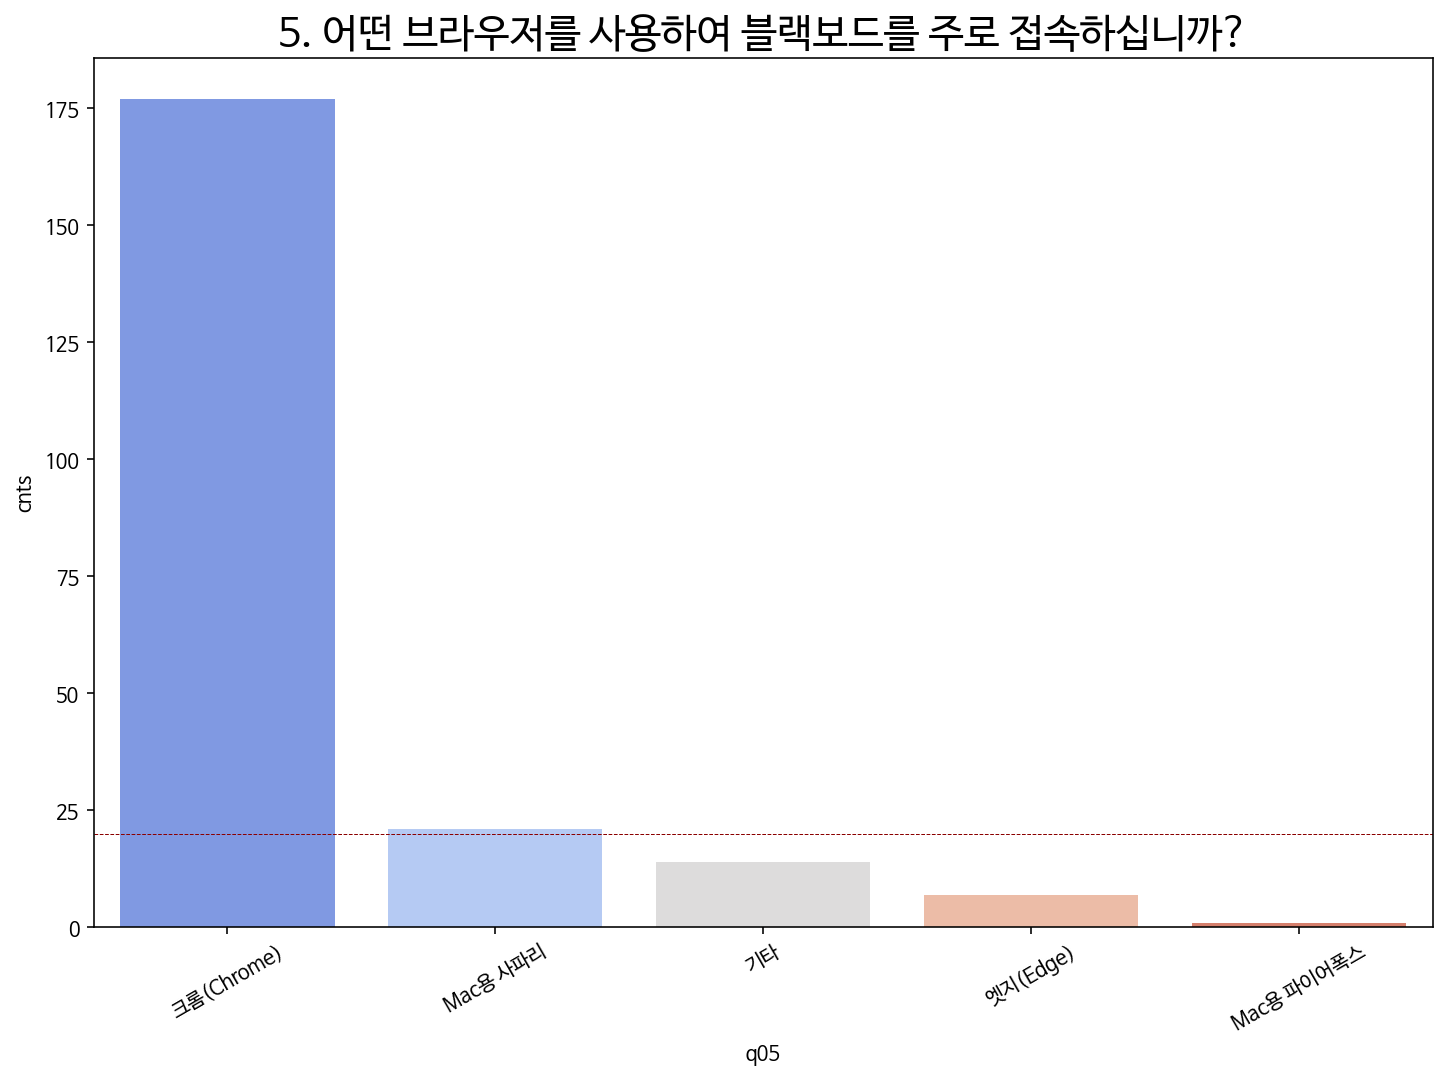

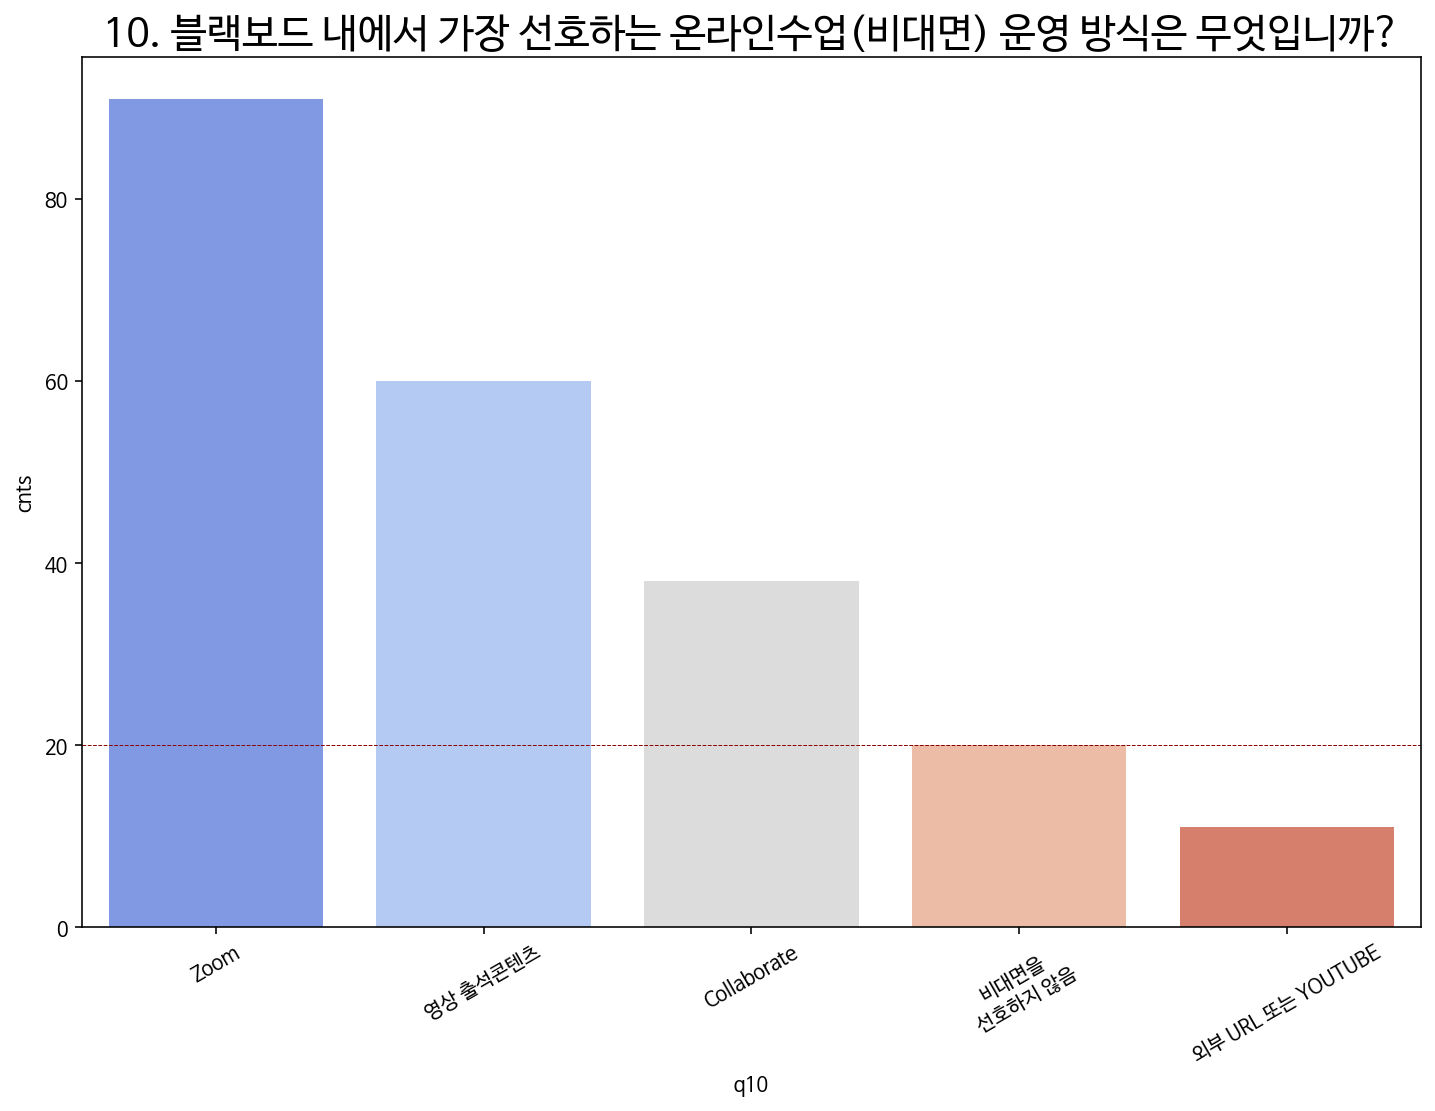

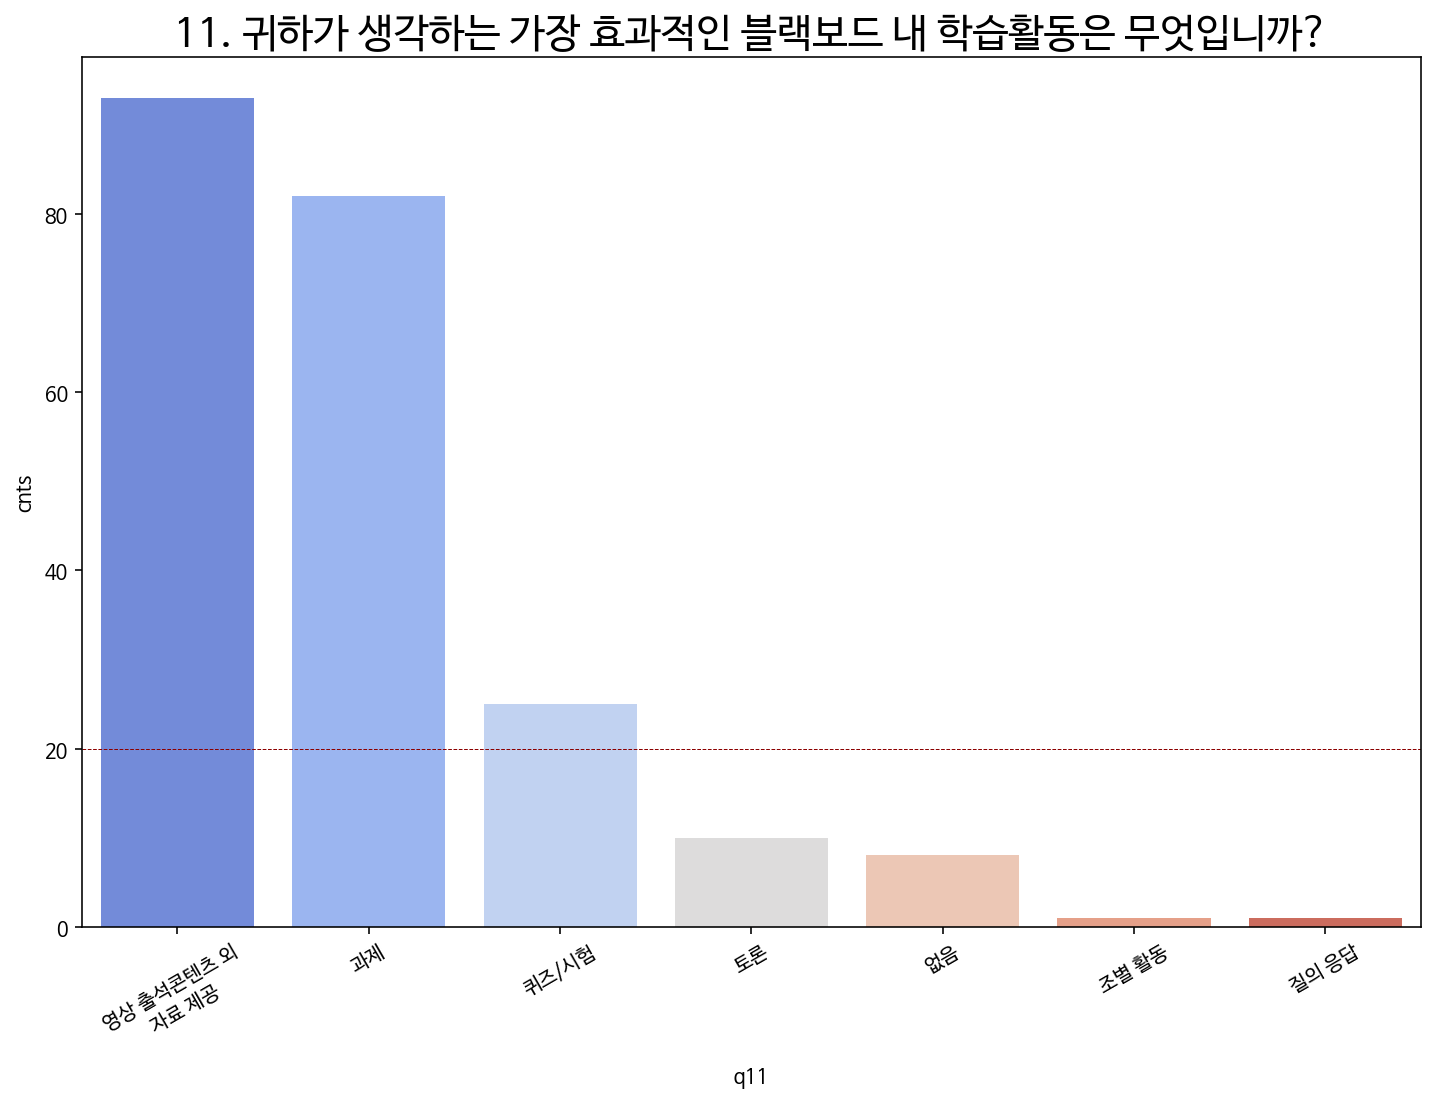

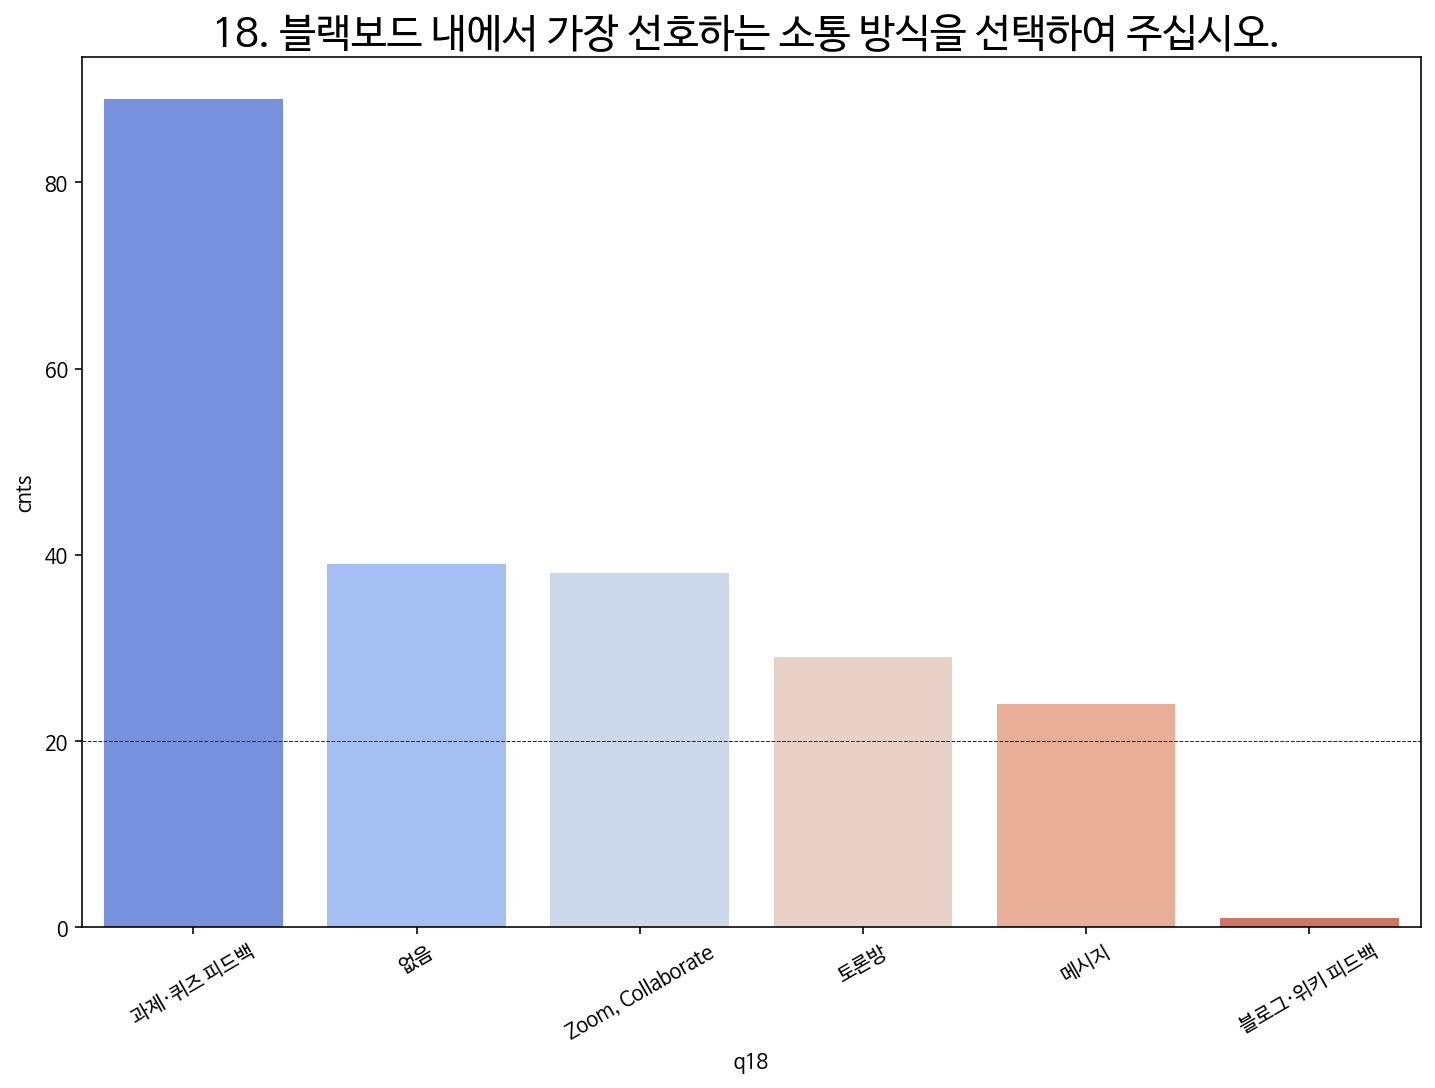

CPU times: user 3.33 s, sys: 345 ms, total: 3.68 s
Wall time: 5.26 s


In [ ]:
%%time
cols = ['user_id','q02', 'q03', 'q05', 
        #'q06', 'q07', 'q08', 'q09', 
        'q10', 'q11', 'q18']

temp_df_01 = df_base[cols] 

# 값 replace 
temp_df_01['q18'] = temp_df_01['q18'].replace('수업용 화상강의 외 별도의 추가적인 화상강의(Zoom, Collaborate)', 'Zoom, Collaborate')

temp_df_01['q10'] = temp_df_01['q10'].replace('실시간 화상강의(Zoom)', 'Zoom')
temp_df_01['q10'] = temp_df_01['q10'].replace('녹화영상(영상 출석콘텐츠)', '영상 출석콘텐츠')
temp_df_01['q10'] = temp_df_01['q10'].replace('실시간 화상강의(Collaborate)', 'Collaborate')
temp_df_01['q10'] = temp_df_01['q10'].replace('온라인수업(비대면)을 선호하지 않음', '비대면을\n 선호하지 않음')
temp_df_01['q10'] = temp_df_01['q10'].replace('외부 URL 또는 YOUTUBE 제공', '외부 URL 또는 YOUTUBE')

temp_df_01['q11'] = temp_df_01['q11'].replace('영상 출석콘텐츠 외 자료 제공', '영상 출석콘텐츠 외\n 자료 제공')

for c in cols[1:]: 
  temp_df_02 = temp_df_01.groupby(c).agg(cnts = ('user_id', 'count')).reset_index()
  temp_df_02.sort_values(by='cnts', inplace=True, ascending = False)

  fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8)) # 빈 캔버스

  sns.barplot(
    data = temp_df_02,
    x = c,
    y = 'cnts', 
    palette = 'coolwarm'
  )
  
  #ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x: 0,.0f}'))
  plt.title(f'{questions_full[c]}', fontsize = 20)

  plt.axhline(20, color = 'darkred', linestyle = '--', linewidth = 0.5)
  plt.xticks(rotation= 30)
  plt.show()



개선 필요한 부분: 
* 조별활동 
* 퀴즈, 시험, 질의응답, 토론 

선호하는 수업 방식도, 블랙보드 내에서 자체적으로 제공하는 콜라보레이트가 아닌 zoom이었음 


In [ ]:
cols = df_base.columns.tolist()[6: 16]

## _3. 세부 기능별 만족도 비교

In [ ]:
## 100% stakced Bar Chart 그리기 
# https://hleecaster.com/python-stacked-bar-chart/

In [ ]:
df_base['q22'].value_counts()

4    114
3     50
5     33
2     18
1      5
Name: q22, dtype: int64

In [ ]:
def get_satisfaction_point(n): 
  if type(n) == str: 
    if n == '매우 만족': return 5
    elif n == '만족': return 4
    elif n == '보통': return 3
    elif n == '불만족': return 2
    elif n == '매우 불만족': return 1
    elif '없음' in n: return np.nan
    else: return n
  else: return n 

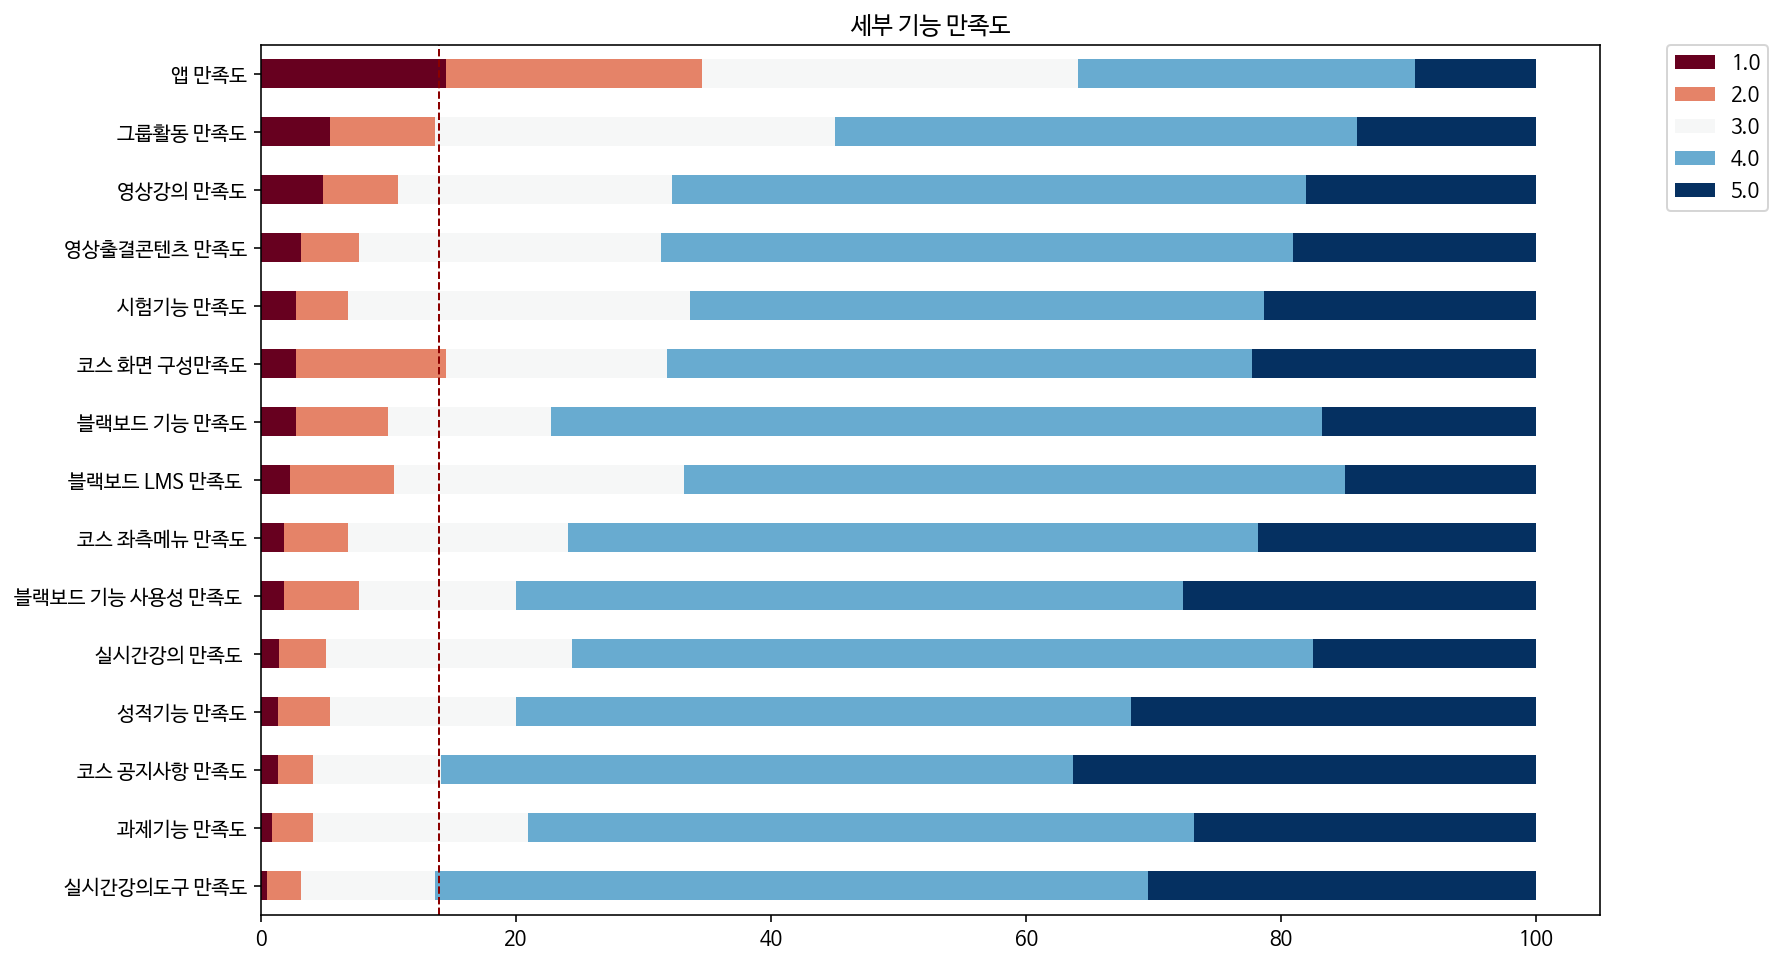

In [ ]:
# 만족도 관련 설문 문항
questions_satisfaction = ['q14', 'q16', 'q19',
                          'q20', 'q22','q23', 'q25', 
                          'q27', 'q29', 'q31', 'q33', 
                          'q35', 'q39', 
                          'q41', 'q43']
df_temp = df_base[questions_satisfaction]
frequencies = {}   

df_temp.rename(
    columns = {
        #'q01':'블랙보드 만족도 ',
        'q14':'영상강의 만족도',
        'q16':'실시간강의 만족도 ',
        'q19':'블랙보드 기능 만족도',
        'q20': '블랙보드 기능 사용성 만족도 ',
        'q22': '블랙보드 LMS 만족도 ',
        'q23':'앱 만족도',
        'q25':'코스 화면 구성만족도',
        'q27':'코스 좌측메뉴 만족도',
        'q29':'코스 공지사항 만족도',
        'q31':'영상출결콘텐츠 만족도',
        'q33':'과제기능 만족도',
        'q35':'그룹활동 만족도',
        'q39':'시험기능 만족도', 
        'q41':'실시간강의도구 만족도',
        'q43':'성적기능 만족도',
    },
    inplace = True
)


for i in df_temp.columns.tolist(): 
  df_temp[i] = df_temp[i].apply(lambda s: get_satisfaction_point(s))
  frequencies[i] = df_temp[i].value_counts()

# 행/열 전환
df_freq = pd.DataFrame(frequencies).T

# 빈도를 비율로 변환 (문항별)
df_freq = df_freq.div(df_freq.sum(axis=1), axis=0)*100

# # columns 순서 정렬 (응답 1,2,3,4,5 순으로)
df_freq = df_freq.reindex(sorted(df_freq.columns, reverse= False), axis=1)
# df_freq.sort_values(by = 5.0, ascending = False)
# df_freq

df_freq['sorting'] = df_freq[1.0] #+ df_freq[2.0]
df_freq = df_freq.sort_values(by=['sorting'])


df_freq[[1.0, 2.0, 3.0, 4.0, 5.0]].plot(kind="barh", 
             stacked=True, 
             colormap = 'RdBu', #colormap='coolwarm', 
             figsize = (12,8), 
             title = "세부 기능 만족도"
             )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# plt.axvline(x= 80, color='darkred', linestyle='--', linewidth=1)
plt.axvline(x= 14, color='darkred', linestyle='--', linewidth=1)


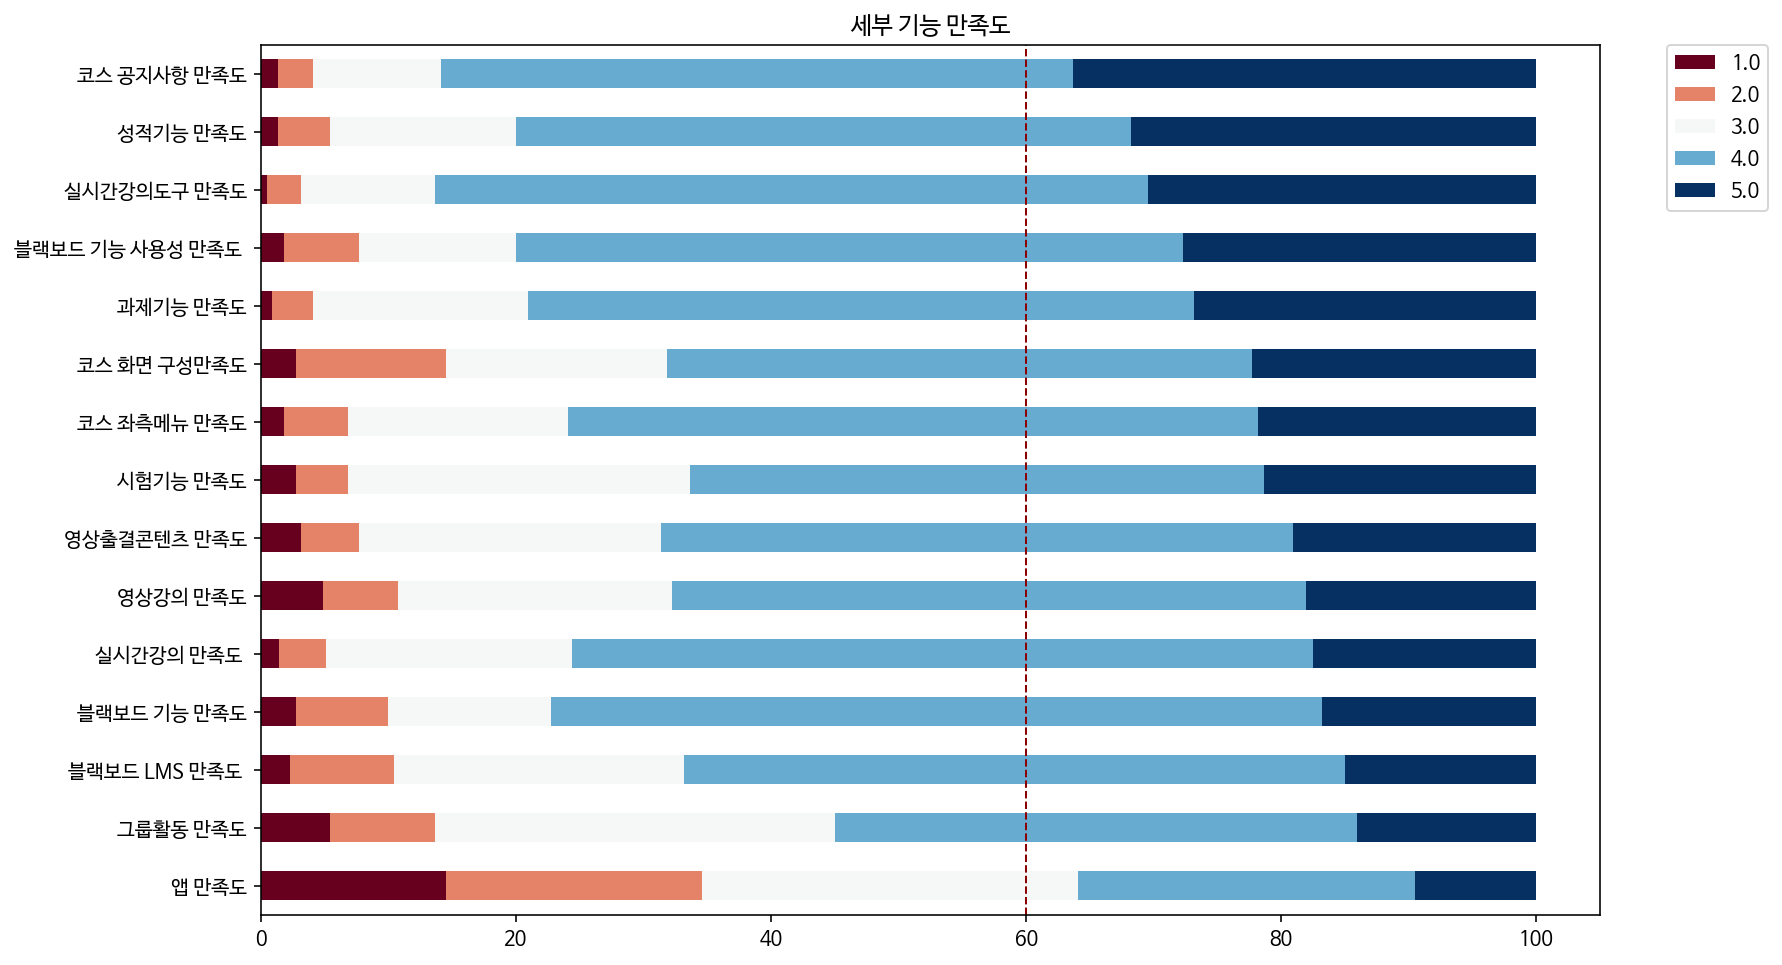

In [ ]:
# 만족도 관련 설문 문항
questions_satisfaction = ['q14', 'q16', 'q19',
                          'q20', 'q22','q23', 'q25', 
                          'q27', 'q29', 'q31', 'q33', 
                          'q35', 'q39', 
                          'q41', 'q43']
df_temp = df_base[questions_satisfaction]
frequencies = {}   

df_temp.rename(
    columns = {
        #'q01':'블랙보드 만족도 ',
        'q14':'영상강의 만족도',
        'q16':'실시간강의 만족도 ',
        'q19':'블랙보드 기능 만족도',
        'q20': '블랙보드 기능 사용성 만족도 ',
        'q22': '블랙보드 LMS 만족도 ',
        'q23':'앱 만족도',
        'q25':'코스 화면 구성만족도',
        'q27':'코스 좌측메뉴 만족도',
        'q29':'코스 공지사항 만족도',
        'q31':'영상출결콘텐츠 만족도',
        'q33':'과제기능 만족도',
        'q35':'그룹활동 만족도',
        'q39':'시험기능 만족도', 
        'q41':'실시간강의도구 만족도',
        'q43':'성적기능 만족도',
    },
    inplace = True
)


for i in df_temp.columns.tolist(): 
  df_temp[i] = df_temp[i].apply(lambda s: get_satisfaction_point(s))
  frequencies[i] = df_temp[i].value_counts()

# 행/열 전환
df_freq = pd.DataFrame(frequencies).T

# 빈도를 비율로 변환 (문항별)
df_freq = df_freq.div(df_freq.sum(axis=1), axis=0)*100

# # columns 순서 정렬 (응답 1,2,3,4,5 순으로)
df_freq = df_freq.reindex(sorted(df_freq.columns, reverse= False), axis=1)
df_freq['sorting'] = df_freq[5.0] #+ df_freq[2.0]
df_freq = df_freq.sort_values(by=['sorting'])


df_freq[[1.0, 2.0, 3.0, 4.0, 5.0]].plot(kind="barh", 
             stacked=True, 
             colormap = 'RdBu', #colormap='coolwarm', 
             figsize = (12,8), 
             title = "세부 기능 만족도"
             )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# plt.axvline(x= 80, color='darkred', linestyle='--', linewidth=1)
plt.axvline(x= 60, color='darkred', linestyle='--', linewidth=1)


In [ ]:
df_freq['sorting'] = df_freq[1.0] + df_freq[2.0]

앱 > 코스화면 구성만족도, 

그룹활동, 앱에 대한 개선이 특히 필요한 듯 

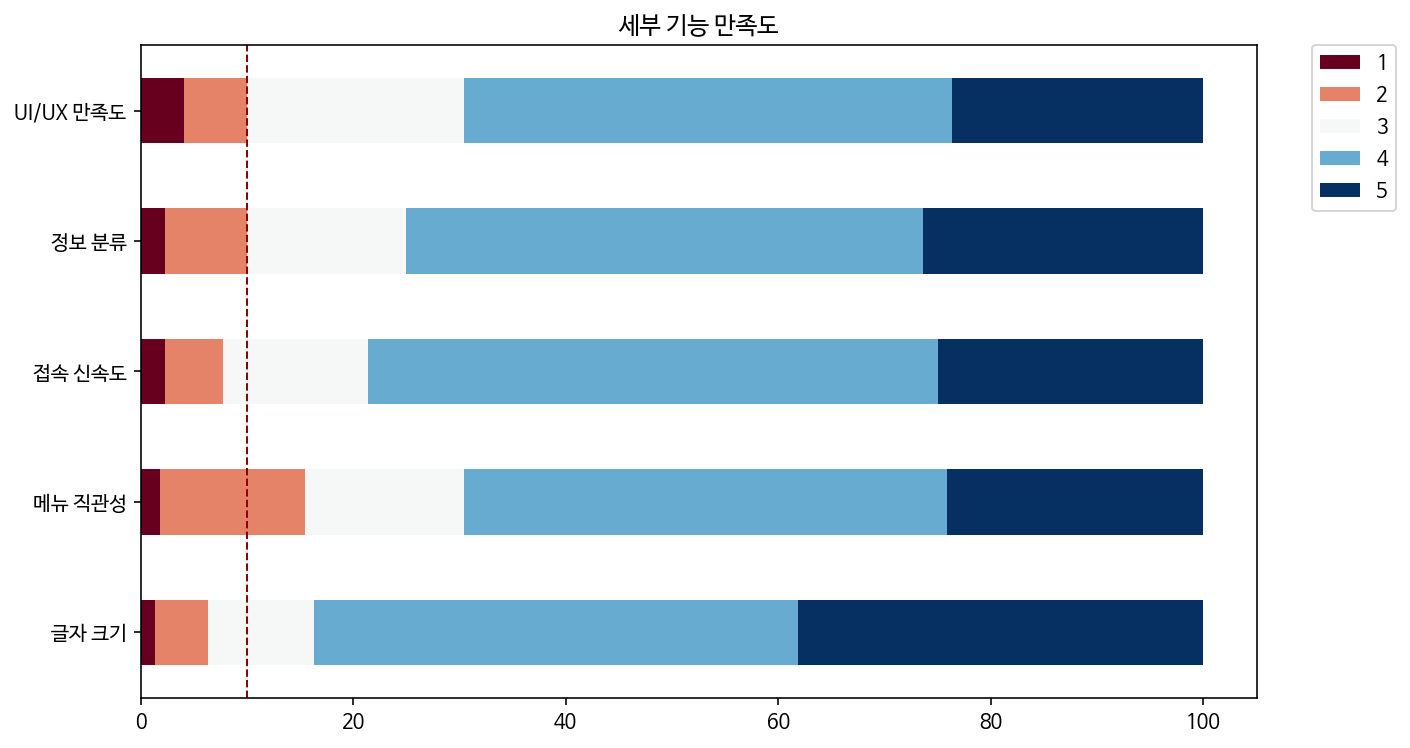

In [ ]:
# 기타 세부사항 만족도 

questions_satisfaction = ['q04', 'q06', 'q07', 'q08', 'q09']
df_temp = df_base[questions_satisfaction]
frequencies = {}   

df_temp.rename(
    columns = {
        #'q01':'블랙보드_만족도 ',
        'q04': '접속 신속도', 
        'q06': 'UI/UX 만족도', 
        'q07': '메뉴 직관성', 
        'q08': '정보 분류',
        'q09': '글자 크기',
    },
    inplace = True
)

for i in df_temp.columns.tolist(): 
  df_temp[i] = df_temp[i].apply(lambda s: get_satisfaction_point(s))
  frequencies[i] = df_temp[i].value_counts()

# df_freq = pd.DataFrame(frequencies)

# 행/열 전환
df_freq = pd.DataFrame(frequencies).T

# 빈도를 비율로 변환 (문항별)
df_freq = df_freq.div(df_freq.sum(axis=1), axis=0)*100

# # columns 순서 정렬 (응답 1,2,3,4,5 순으로)
df_freq = df_freq.reindex(sorted(df_freq.columns, reverse= False), axis=1)
df_freq['sorting'] = df_freq[1.0] #+ df_freq[2.0]
df_freq = df_freq.sort_values(by=['sorting'])

# df_freq.sort_values(by = 5.0, ascending = False)

df_freq[[1.0, 2.0, 3.0, 4.0, 5.0]].plot(kind="barh", 
             stacked=True, 
             colormap = 'RdBu', #colormap='coolwarm', 
             figsize = (10,6), 
             title = "세부 기능 만족도"
             )

# plt.axvline(x= 90, color='darkred', linestyle='--', linewidth=1)
plt.axvline(x= 10, color='darkred', linestyle='--', linewidth=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


강의실 내 메뉴 직관성 개선 필요  

## _4. 수강한계, 학습한계, 오류 
- q12, q13
- q21 (복수응답 가능) 

In [ ]:
df_base['q12'].unique().tolist()

['교수-학생·학생-학생 간 의사소통의 부족',
 '녹화 강의 영상의 질',
 '내용 이해를 돕는 학습 활동의 부족',
 '시험의 공정성',
 '실시간 화상강의 수업의 질',
 '없음',
 '과제 수행의 어려움']

In [ ]:
df_base['q13'].unique().tolist()

['시스템 불안정',
 '온라인수업 시 집중 저하',
 '안정적인 수업 수강 장소 부재',
 '네트워크 불안정으로 접속 끊김 현상',
 '블랙보드 기능 사용의 어려움',
 '없음']

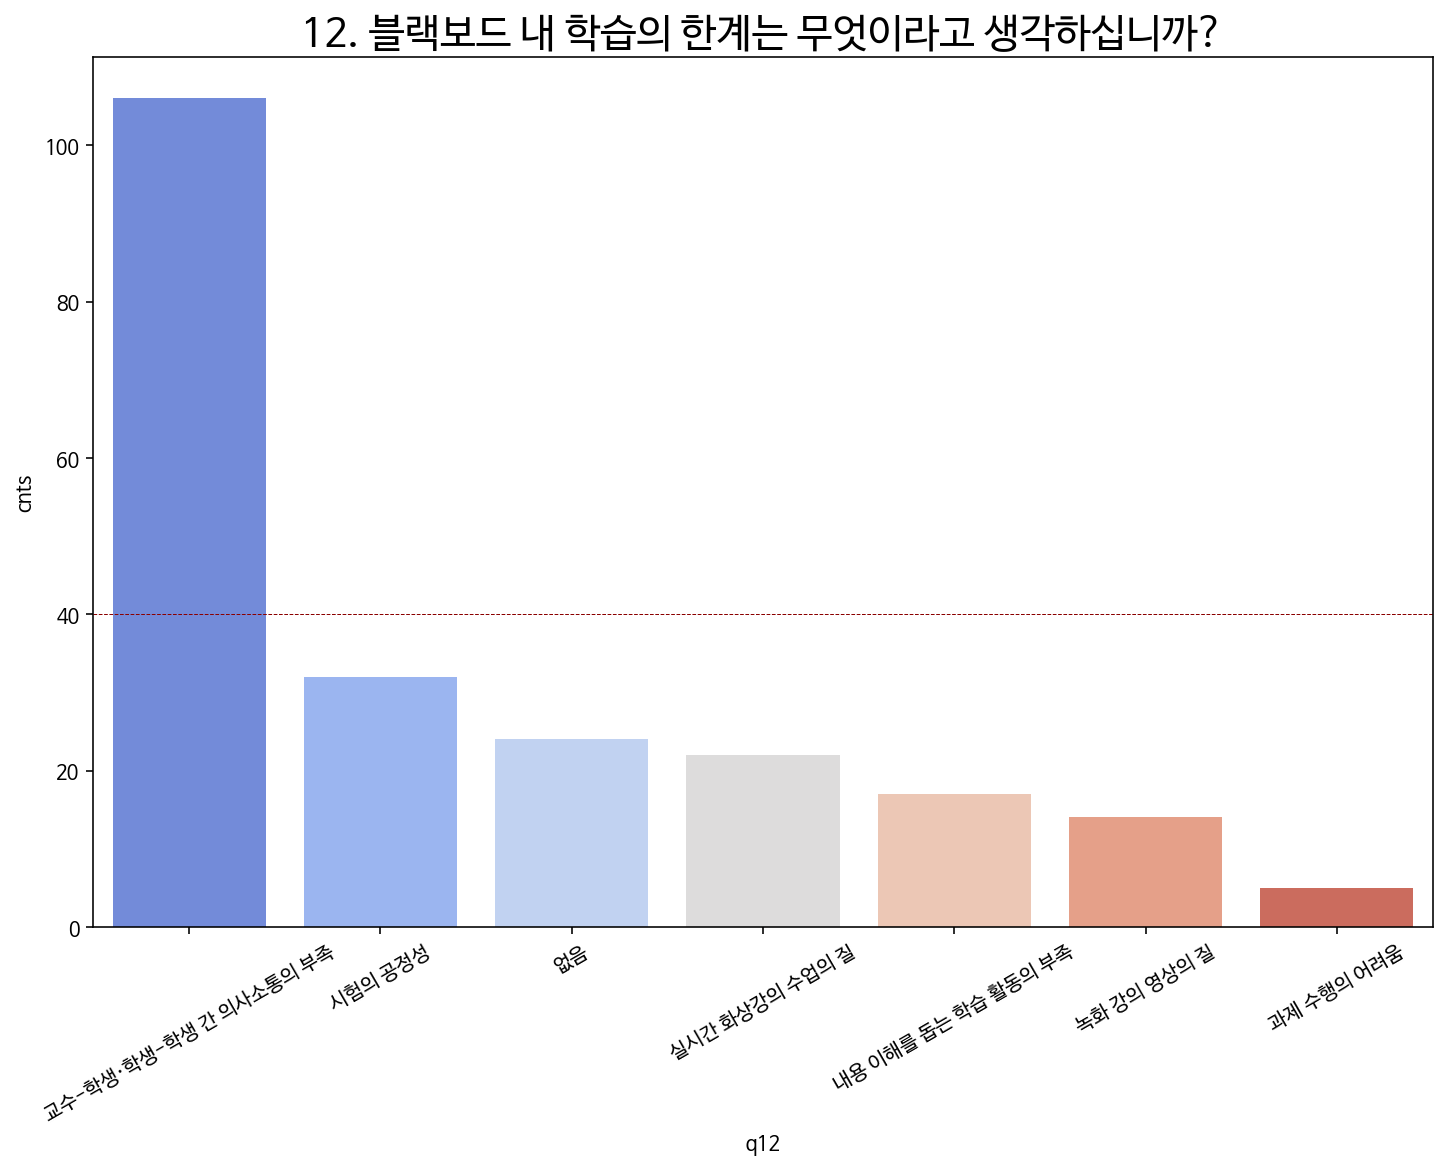

In [ ]:
temp_df_q12 = df_base.groupby('q12').agg(cnts = ('user_id', 'count')).reset_index()
temp_df_q12.sort_values(by='cnts', inplace=True, ascending = False)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8)) # 빈 캔버스

sns.barplot(
  data = temp_df_q12,
  x = 'q12',
  y = 'cnts', 
  palette='coolwarm'
)

temp = 'q12'
plt.title(f'{questions_full[temp]}', fontsize = 20)
#ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x: 0,.0f}'))
plt.axhline(40, color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.xticks(rotation= 30)

plt.show()

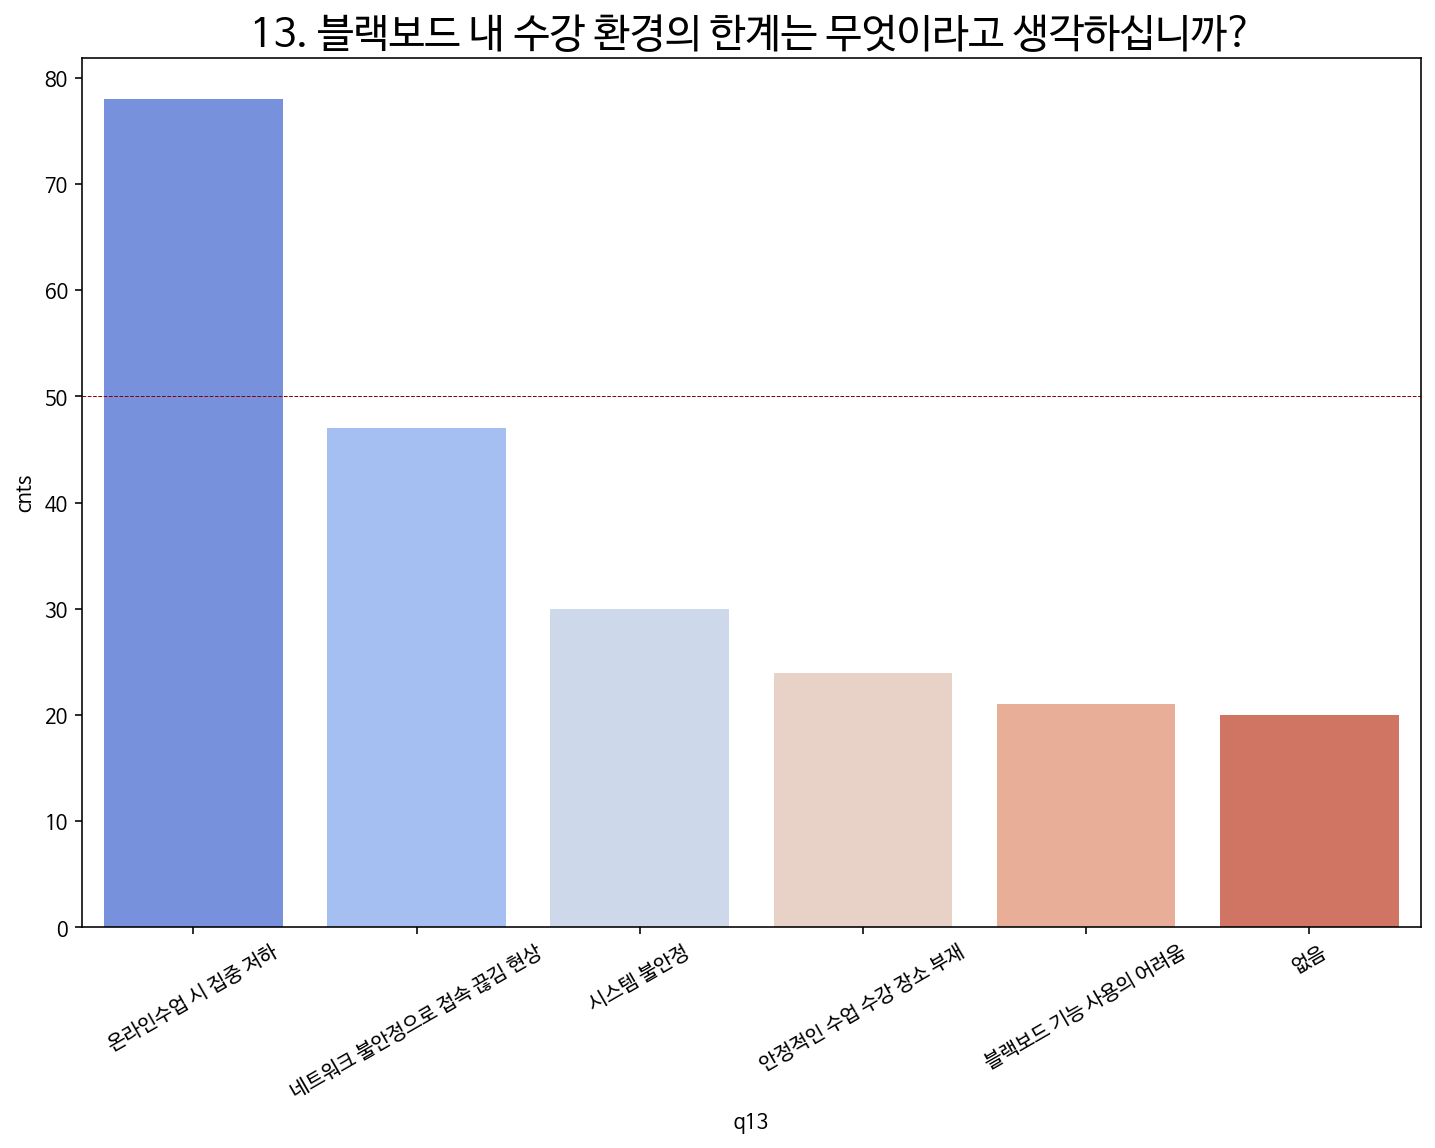

In [ ]:
temp_df_q13 = df_base.groupby('q13').agg(cnts = ('user_id', 'count')).reset_index()
temp_df_q13.sort_values(by='cnts', inplace=True, ascending = False)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8)) # 빈 캔버스

sns.barplot(
  data = temp_df_q13,
  x = 'q13',
  y = 'cnts', 
  palette='coolwarm'
)

temp = 'q13'
plt.title(f'{questions_full[temp]}', fontsize = 20)
#ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x: 0,.0f}'))
plt.axhline(50, color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.xticks(rotation= 30)

plt.show()

In [ ]:
q21_str = df_base['q21'].tolist()
print(len(q21_str))
q21_str_new = {}
idx = 0 

for i in q21_str: 
  temp = i.split(';')
  for j in temp: 
    q21_str_new[idx] = [j]
    idx += 1
print(len(q21_str_new))

220
359


In [ ]:
df_q21 = pd.DataFrame(q21_str_new).T
df_q21.rename(columns = {0: 'ans'}, inplace=True)
df_q21.head()

ans
0  실시간 화상강의(Zoom, Collaborate) 참여
1                        출석 반영 오류
2                      시험 응시 및 접속
3  실시간 화상강의(Zoom, Collaborate) 참여
4                        코스 화면 접속

In [ ]:
df_q21_agg = df_q21.groupby('ans').agg(cnts = ('ans', 'count')).reset_index()
df_q21_agg = df_q21_agg.sort_values(by = 'cnts', ascending = False)
df_q21_agg

ans  cnts
5  실시간 화상강의(Zoom, Collaborate) 참여    58
8                        코스 화면 접속    56
6                              없음    55
0                      SSO 통합 로그인    48
7                        출석 반영 오류    45
1                       강의 동영상 재생    37
2                          과제 업로드    31
4                      시험 응시 및 접속    22
9      학습활동(토론, 위키, 블로그, 저널 등) 참여     4
3                    메시지(수/발신) 기능     3

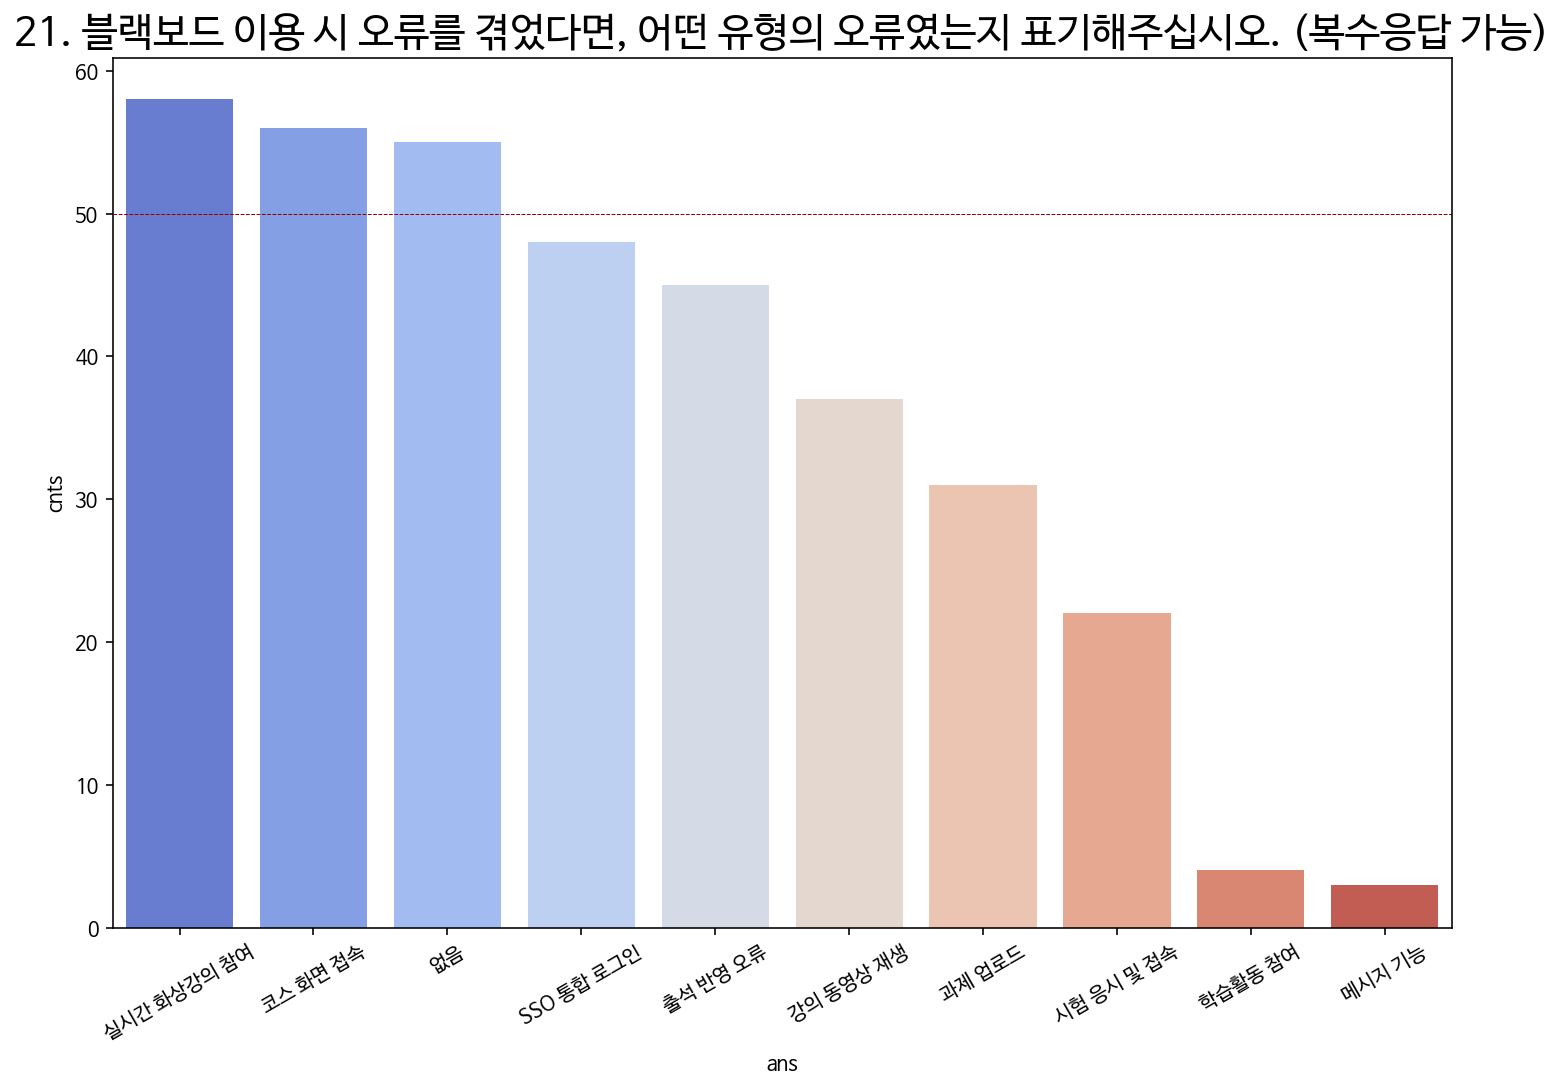

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8)) # 빈 캔버스

# 값 replace 
df_q21_agg['ans'] = df_q21_agg['ans'].replace('실시간 화상강의(Zoom, Collaborate) 참여', '실시간 화상강의 참여')
df_q21_agg['ans'] = df_q21_agg['ans'].replace('학습활동(토론, 위키, 블로그, 저널 등) 참여', '학습활동 참여')
df_q21_agg['ans'] = df_q21_agg['ans'].replace('메시지(수/발신) 기능', '메시지 기능')

sns.barplot(
  data = df_q21_agg,
  x = 'ans',
  y = 'cnts', 
  palette='coolwarm'
)

temp = 'q21'
plt.title(f'{questions_full[temp]}', fontsize = 20)
#ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x: 0,.0f}'))
plt.axhline(50, color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.xticks(rotation= 30)

plt.show()

### (워드클라우드 작성 위한 임포트) 

In [ ]:
%%time
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:7 http://archive.ubuntu.com/ubuntu focal InRelease
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:14 http://archive.ubuntu.com/ubuntu focal-updates/main amd6

In [ ]:
from konlpy.tag import Okt
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import nltk

In [ ]:
#워드클라우드의 모양 설정. 원모양의 이미지를 그대로 가져와 만들도록 하였음.
cand_mask=np.array(Image.open('/content/circle.jpg'))

##_5. 수업 콘텐츠 개선점 수렴 
- q15: 블랙보드 영상 출석콘텐츠 수업 방식의 한계 
- q17: 실시간 화상 강의를 활용한 온라인 수업의 한계 
- 특히, 실시간 화상강의!! (q42) 

- 

In [ ]:
questions_full['q15']

'15. 블랙보드 영상 출석콘텐츠 수업 방식의 한계는 무엇이라고 생각하십니까? (복수응답 가능)'

In [ ]:
q15_str = df_base['q15'].tolist()
print(len(q15_str))
q15_str_new = {}
idx = 0 

for i in q15_str: 
  temp = i.split(';')
  for j in temp: 
    q15_str_new[idx] = [j]
    idx += 1
print(len(q15_str_new))

220
341


In [ ]:
df_q15 = pd.DataFrame(q15_str_new).T
df_q15.rename(columns = {0: 'ans'}, inplace=True)
df_q15.head()

ans
0        출석 반영 오류
1    재생 오류로 인한 끊김
2      음향이 작거나 울림
3  영상 화질이 선명하지 않음
4    재생 오류로 인한 끊김

In [ ]:
df_q15_agg = df_q15.groupby('ans').agg(cnts = ('ans', 'count')).reset_index()
df_q15_agg = df_q15_agg.sort_values(by = 'cnts', ascending = False)
df_q15_agg

ans  cnts
7              출석 반영 오류    76
0  상호작용 불가로 인한 질의응답 어려움    73
6          재생 오류로 인한 끊김    54
2                    없음    36
4        영상 화질이 선명하지 않음    35
3       영상 분량이 부족하거나 많음    25
5            음향이 작거나 울림    24
1          수업 내용 이해 어려움    18

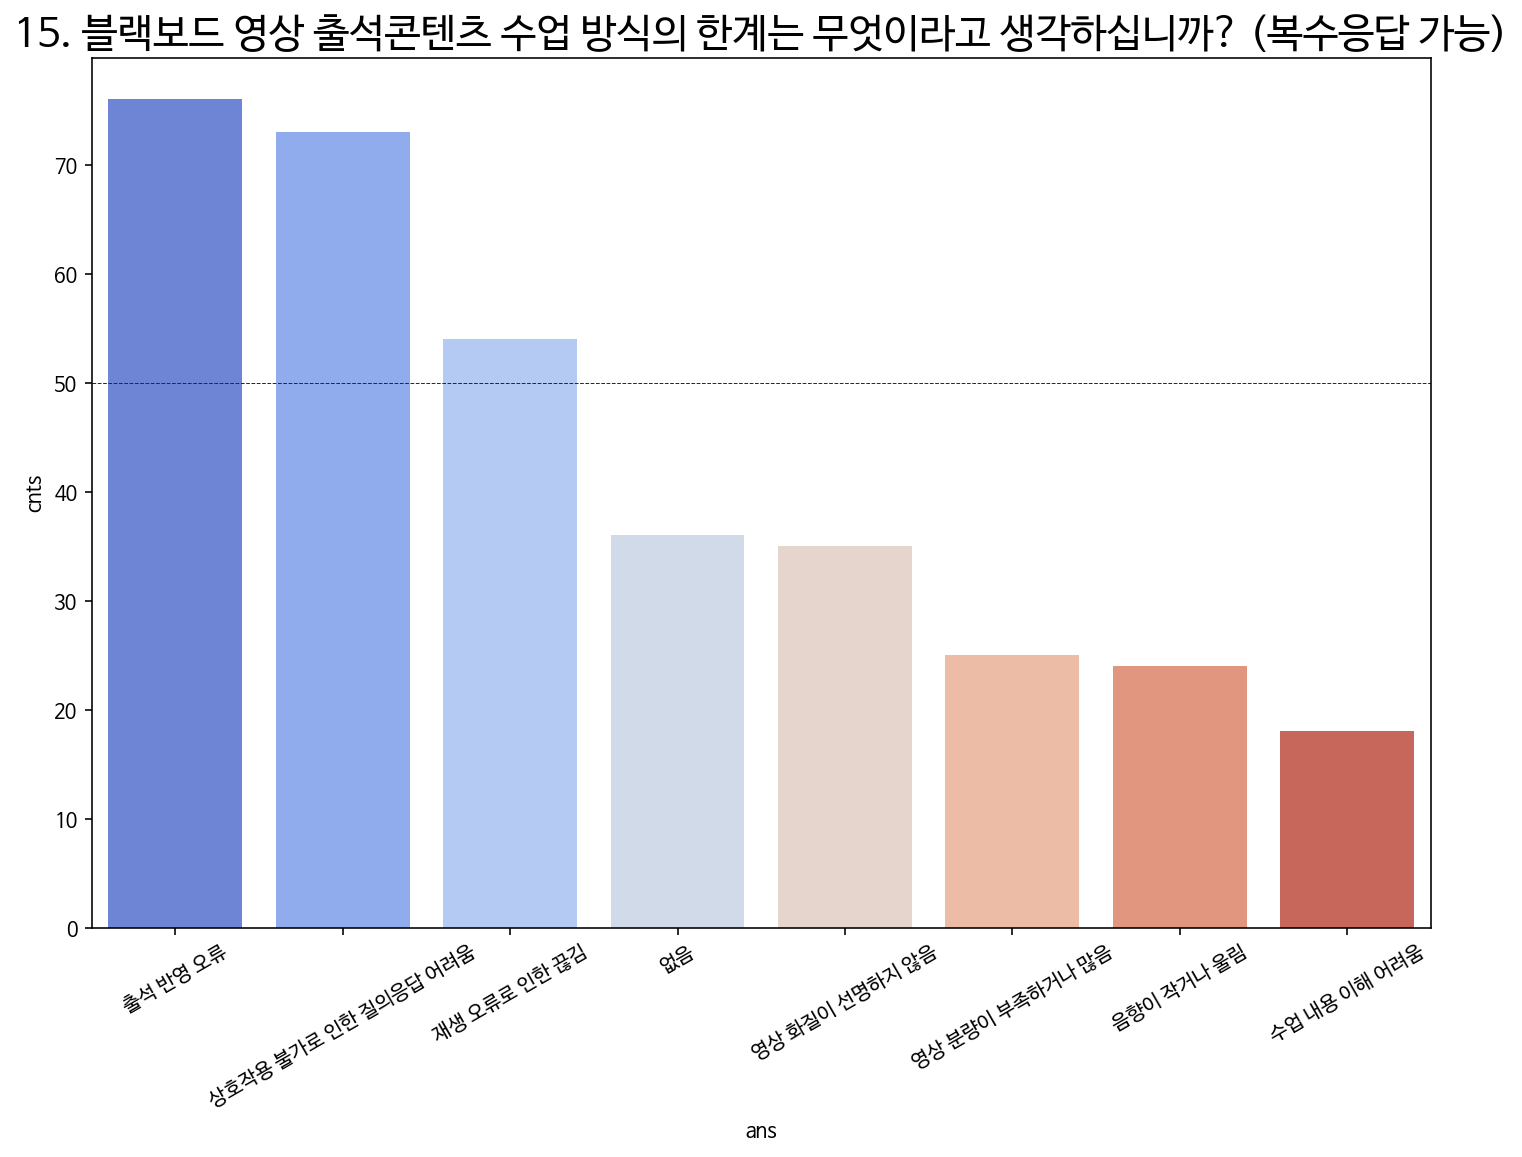

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8)) # 빈 캔버스

# 값 replace 
# df_q15_agg['ans'] = df_q15_agg['ans'].replace('실시간 화상강의(Zoom, Collaborate) 참여', '실시간 화상강의 참여')
# df_q15_agg['ans'] = df_q15_agg['ans'].replace('학습활동(토론, 위키, 블로그, 저널 등) 참여', '학습활동 참여')
# df_q15_agg['ans'] = df_q15_agg['ans'].replace('메시지(수/발신) 기능', '메시지 기능')

sns.barplot(
  data = df_q15_agg,
  x = 'ans',
  y = 'cnts', 
  palette='coolwarm'
)

temp = 'q15'
plt.title(f'{questions_full[temp]}', fontsize = 20)
#ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x: 0,.0f}'))
plt.axhline(50, color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.xticks(rotation= 30)

plt.show()

In [ ]:
questions_full['q17']

'17. 실시간 화상강의(Zoom, Collaborate)를 활용한 온라인수업의 한계는 무엇이라고 생각하십니까? (복수응답 가능)'

In [ ]:
q17_str = df_base['q17'].tolist()
print(len(q17_str))
q17_str_new = {}
idx = 0 

for i in q17_str: 
  temp = i.split(';')
  for j in temp: 
    q17_str_new[idx] = [j]
    idx += 1
print(len(q17_str_new))

220
309


In [ ]:
df_q17 = pd.DataFrame(q17_str_new).T
df_q17.rename(columns = {0: 'ans'}, inplace=True)
df_q17.head()

ans
0       음향이 작거나 울림
1  접속 오류로 인한 수업 끊김
2               없음
3               없음
4    수업 내용 이해의 어려움

In [ ]:
df_q17_agg = df_q17.groupby('ans').agg(cnts = ('ans', 'count')).reset_index()
df_q17_agg = df_q17_agg.sort_values(by = 'cnts', ascending = False)
df_q17_agg

ans  cnts
4  접속 오류로 인한 수업 끊김   118
2   영상 화질이 선명하지 않음    45
3       음향이 작거나 울림    44
1               없음    43
0    수업 내용 이해의 어려움    31
5         출석 반영 오류    28

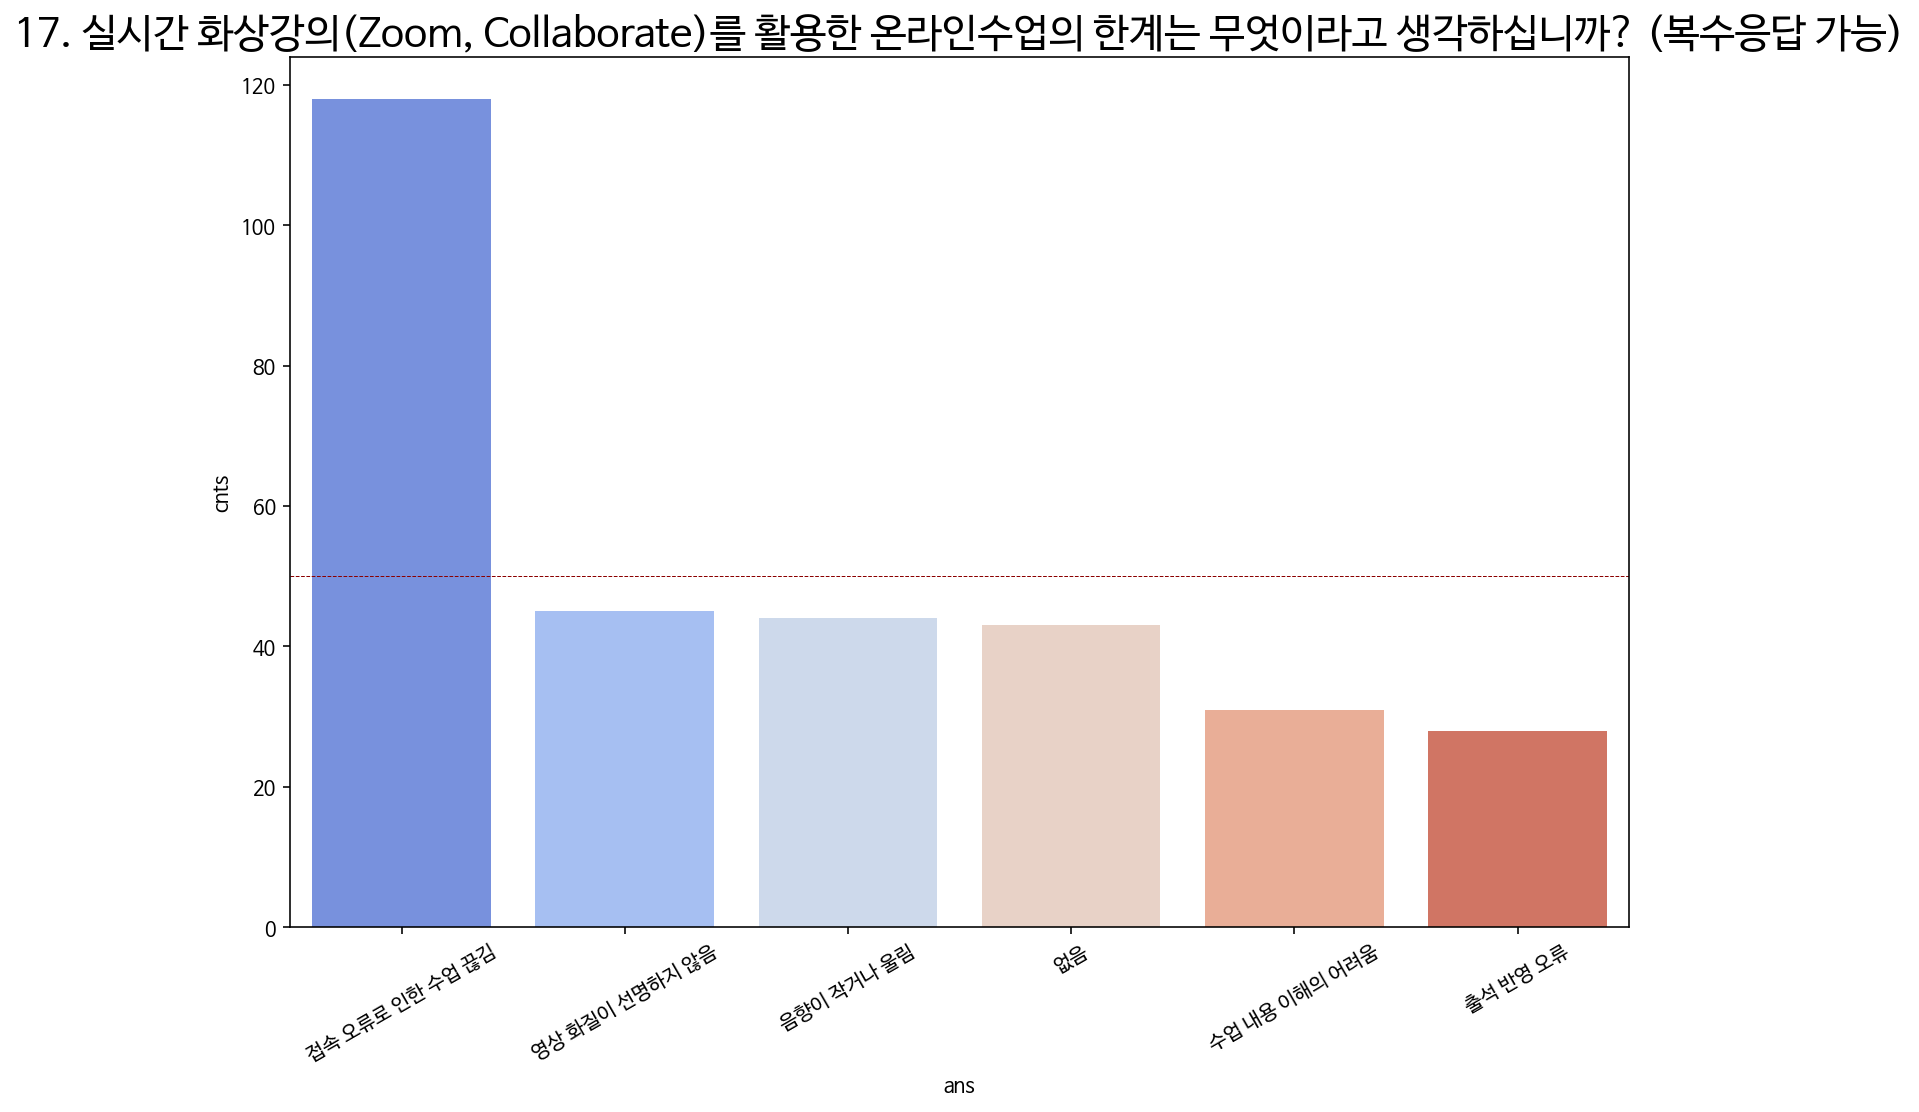

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8)) # 빈 캔버스

sns.barplot(
  data = df_q17_agg,
  x = 'ans',
  y = 'cnts', 
  palette='coolwarm'
)

temp = 'q17'
plt.title(f'{questions_full[temp]}', fontsize = 20)
#ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x: 0,.0f}'))
plt.axhline(50, color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.xticks(rotation= 30)

plt.show()

In [ ]:
questions_full['q42']

'42. 실시간 강의 도구(ZOOM, Collaborate) 기능에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.'

In [ ]:
df_q42 = df_base['q42'].dropna().reset_index()

In [ ]:
%%time
ans_q42 = df_q42['q42'].tolist()
ans_joined = ' '.join(ans_q42)
# print(len(ans_q42))
# print(len(ans_joined))

CPU times: user 491 µs, sys: 0 ns, total: 491 µs
Wall time: 505 µs


In [ ]:
for ans in ans_q42: 
  if '화면' in ans: 
    print(ans)

줌을 이용한 실시간 강의가 훨씬 안정적으로 이루어집니다. 부득이하게 콜라보레이트를 사용한 경우도 있었지만, 연결이 너무 불안정하고 카메라 화면 조정 기능등의 부족으로 불편함이 컸습니다.
콜라보레이트 접속 시 가끔씩 화면이 뜨지 않는 등의 오류가 발생하는데 이러한 사항이 개선되었으면 합니다.
collaborate 기능에서 공유 PPT 화면과 교수님 화면을 동시에 볼 수 있었으면 합니다. 화면크기 자유롭게 조절할 수 있었으면 합니다.
학교 계정으로 로그인해도 다른 가상화면 등록해서 쓸 수 있었으면 좋겠어요.
인터넷은 연결되어 있고 출석으로 뜨는데 화면이 자꾸 멈춰요. 그리고 음향이 안나고 영상만 송츌될 때도 있어요.
Collaborate 수업 화면이 더 이상 확대가 안되서 너무 작게 보여 불편합니다. 
댓글창과 화면크기를 조절할 수 있도록 해주시면 좋을 것 같습니다
배경화면을 자유롭게 교체할 수 있도록 허용
화면 공유 시 화질이 조금 더 개선되었으면 좋겠습니다.
콜라보레이트의 경우 줌보다 화면 전환 속도가 많이 느린 것 같습니다. 


In [ ]:
len(ans_q42)

101

In [ ]:
## 콜라보레이트 <- -> zoom, 줌, Zoom 의견 구분 
%%time
ans_collab = [] # collab 
ans_zoom = [] # zoom 
ans_both = [] # both
ans_not_both = []

for ans in ans_q42: 
  collab, zoom, both = False, False, False 
  if '콜라보레이트' in ans or '콜라보' in ans or 'Collaborate' in ans or 'collaborate' in ans: 
    collab = True 
  if 'zoom' in ans or '줌' in ans or 'Zoom' in ans: 
   zoom = True 
  
  if (collab, zoom) == (True, True): 
    ans_both.append(ans)
  elif (collab, zoom) == (True, False): 
    ans_collab.append(ans)
  elif (collab, zoom) == (False, True): 
    ans_zoom.append(ans)
  else: 
    ans_not_both.append(ans)
    ans_collab.append(ans)
    ans_zoom.append(ans)

print(len(ans_collab ))
print(len(ans_zoom))
print(len(ans_both ))
print()
print(len(ans_collab) + len(ans_zoom) + len(ans_both)-len(ans_not_both) == len(ans_q42))

87
70
9

True
CPU times: user 335 µs, sys: 734 µs, total: 1.07 ms
Wall time: 917 µs


In [ ]:
ans_both

['콜라보레이트는 모바일 웹으로도 들어갈 수 있는데 줌은 줌 어플이 있어야만 해서 귀찮다. 모두 콜라보레이트만 사용하도록 할 수는 없는지?',
 '줌을 이용한 실시간 강의가 훨씬 안정적으로 이루어집니다. 부득이하게 콜라보레이트를 사용한 경우도 있었지만, 연결이 너무 불안정하고 카메라 화면 조정 기능등의 부족으로 불편함이 컸습니다.',
 '줌보다 콜라보레이트에서 자주 연결이 끊겼다. 왜 그런 건지 잘 모르겠고, 개선이 꼭 필요하다. ',
 '딱히 없습니다. 영상 자동저장 및 공개 기능이 특히 좋습니다 (콜라보 한정) 그런데 zoom의 경우 이제 고려대의 구글 스페이스 계정이 만료된다는데 사후 대처 방식에 대해 공지가 이루어지면좋겟습니다.',
 'zoom보다 콜라보레이트가 더 활용되면 좋을 거 같다. 좀 더 편리하고, 특히 발표 때 팀원들이 각자 ppt 슬라이드를 넘기기 용이하다',
 'Collaborate의 경우 Zoom에 비해 메뉴 구성이나 사용이 불편함. Zoom으로 일원화하는 것도 검토해 볼 것을 제안 드림',
 '구글  Collaborate에 대한 홍보가 필요합니다. 줌 밖에 안 씁니다.',
 'Collaborate는 zoom에 비해 직관성및 사용편리성이 떨어짐',
 '콜라보레이트의 경우 줌보다 화면 전환 속도가 많이 느린 것 같습니다. ']

In [ ]:
## 콜라보 관련 의견만 
both = [ans_both[1], ans_both[2], ans_both[-1], ans_both[-2], ans_both[-3], ans_both[-4]]
for ans in both: 
  ans_collab.append(ans)

len(ans_collab)

93

CPU times: user 19.3 s, sys: 819 ms, total: 20.1 s
Wall time: 20.4 s


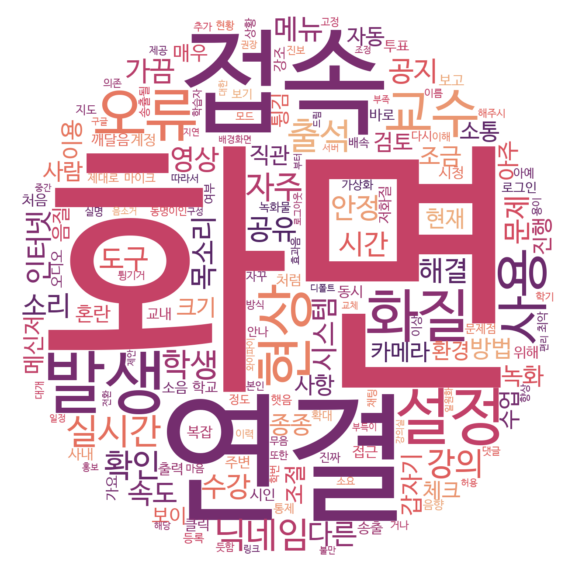

In [ ]:
## 워드클라우드 
%%time
tokenizer = Okt()
ans_joined = ' '.join(ans_collab)

raw_pos_tagged = tokenizer.pos(ans_joined, norm=True, stem=True) # POS Tagging

del_list = ['콜라보', '레이', 'Collaborate', 'collaborate', '콜라보레이트', '기능', '개선', '경우']  

word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun"]: # 명사만 포함하여 워드 클라우드 생성 
        if (len(word[0]) != 1) & (word[0] not in del_list):
          word_cleaned.append(word[0])
        
c = Counter(word_cleaned)

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               width=500, height=500, scale=3.0, max_font_size=250, 
                background_color='white', 
               mask=cand_mask,
               colormap = 'flare') # seaborn color palette

gen = wc.generate_from_frequencies(c)

#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(gen,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
plt.savefig('q42_collaborate.png')

In [ ]:
## 콜라보레이트 화면과 관련된 의견 
for ans in ans_collab: 
  if '화면' in ans: 
    print(ans)

콜라보레이트 접속 시 가끔씩 화면이 뜨지 않는 등의 오류가 발생하는데 이러한 사항이 개선되었으면 합니다.
collaborate 기능에서 공유 PPT 화면과 교수님 화면을 동시에 볼 수 있었으면 합니다. 화면크기 자유롭게 조절할 수 있었으면 합니다.
학교 계정으로 로그인해도 다른 가상화면 등록해서 쓸 수 있었으면 좋겠어요.
인터넷은 연결되어 있고 출석으로 뜨는데 화면이 자꾸 멈춰요. 그리고 음향이 안나고 영상만 송츌될 때도 있어요.
Collaborate 수업 화면이 더 이상 확대가 안되서 너무 작게 보여 불편합니다. 
댓글창과 화면크기를 조절할 수 있도록 해주시면 좋을 것 같습니다
배경화면을 자유롭게 교체할 수 있도록 허용
화면 공유 시 화질이 조금 더 개선되었으면 좋겠습니다.
줌을 이용한 실시간 강의가 훨씬 안정적으로 이루어집니다. 부득이하게 콜라보레이트를 사용한 경우도 있었지만, 연결이 너무 불안정하고 카메라 화면 조정 기능등의 부족으로 불편함이 컸습니다.
콜라보레이트의 경우 줌보다 화면 전환 속도가 많이 느린 것 같습니다. 


In [ ]:
## 콜라보레이트 연결과 관련된 의견 
for ans in ans_collab: 
  if '연결' in ans: 
    print(ans)

한 번 클릭으로 바로 연결 되었으면 합니다
연결의 안정성
연결이 좋아도 갑자기 화질이 안 좋아지는 상황이 자주 발생햇음
인터넷은 연결되어 있고 출석으로 뜨는데 화면이 자꾸 멈춰요. 그리고 음향이 안나고 영상만 송츌될 때도 있어요.
속도 느리거나 인터넷 연결 환경 속도 안좋으면 튕기거나 접속 잘 안되는것 같아요
Collaborate audio설정시 mike 연결이 안되는 현상 자주 발생 시스템 안정성 향상 핀요
줌을 이용한 실시간 강의가 훨씬 안정적으로 이루어집니다. 부득이하게 콜라보레이트를 사용한 경우도 있었지만, 연결이 너무 불안정하고 카메라 화면 조정 기능등의 부족으로 불편함이 컸습니다.
줌보다 콜라보레이트에서 자주 연결이 끊겼다. 왜 그런 건지 잘 모르겠고, 개선이 꼭 필요하다. 


In [ ]:
## 줌 관련 의견만 
both = [ans_both[0], ans_both[3]]
for ans in both: 
  ans_zoom.append(ans)

len(ans_zoom)

72

CPU times: user 2.45 s, sys: 91.7 ms, total: 2.55 s
Wall time: 2.9 s


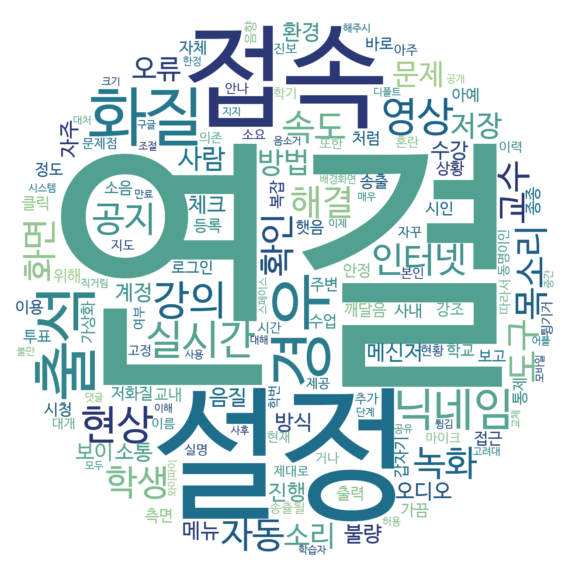

In [ ]:
## 워드클라우드 
%%time
tokenizer = Okt()
ans_joined = ' '.join(ans_zoom)

raw_pos_tagged = tokenizer.pos(ans_joined, norm=True, stem=True) # POS Tagging

del_list = ['줌', 'Zoom', 'zoom', '콜라보', '레이', 'Collaborate', 'collaborate', '콜라보레이트', '기능', '개선', 
            '조금', '발생', '검토', '다른']  

word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외, 대신 "안, 못"같은 것까지 같이 지워져서 긍정,부정을 파악해야 되는경우는 제외하지 않는다.
          word_cleaned.append(word[0])
        
c = Counter(word_cleaned)

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               width=500, height=500, scale=3.0, max_font_size=250, 
                background_color='white', 
               mask=cand_mask,
               colormap = 'crest') # seaborn color palette

gen = wc.generate_from_frequencies(c)

#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(gen,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
plt.savefig('q42_zoom.png')

In [ ]:
## 줌 연결과 관련된 의견 
for ans in ans_zoom: 
  if '연결' in ans: 
    print(ans)

한 번 클릭으로 바로 연결 되었으면 합니다
연결의 안정성
연결이 좋아도 갑자기 화질이 안 좋아지는 상황이 자주 발생햇음
인터넷은 연결되어 있고 출석으로 뜨는데 화면이 자꾸 멈춰요. 그리고 음향이 안나고 영상만 송츌될 때도 있어요.
속도 느리거나 인터넷 연결 환경 속도 안좋으면 튕기거나 접속 잘 안되는것 같아요
끊김 지지직거림 연결불량 오디오불량 등 특히 줌이 심한거같다


In [ ]:
## 줌 설정과 관련된 의견 
for ans in ans_zoom: 
  if '설정' in ans: 
    print(ans)

목소리 기능을 끄는 거 말고도 아예 설정에서 목소리 기능을 이용하지 않을 수 있게 통제할 수 있는 기능이 있으면 좋겠습니다.
닉네임이 '학번 + 이름' 식으로 설정되도록 자동으로 설정되었으면 좋겠음. 현재 실시간 강의 도구의 출석체크는 교수자가 접속 이력을 확인하는 식으로 대개 진행되고 있는데, 수강자가 설정한 닉네임에 의존하는 탓에 닉네임이 실명과 다르게 설정되어 있거나 동명이인이 있는 경우 혼란이 발생하고 있음. 따라서 닉네임을 고정하거나, 닉네임이 아닌 다른 진보된 방식으로 출석체크를 진행할 수 있도록 추가 도구를 제공하면 좋을 것 같음.

더불어 수강자 또한 실시간 강의 도구에서 본인의 출석 현황을 확인할 수 있으면 좋겠음.
학생 음소거 기능을 디폴트로 설정하면 좋겠음.


## _6. 기능별 개선점 수렴 
그룹활동, 앱에 대한 개선이 특히 필요한 듯 
- https://jeonjoon.tistory.com/m/32 

### 4.1. 앱 

In [ ]:
220 - df_base['q24'].isna().sum() # 존재하는 데이터 수 

157

In [ ]:
%%time
def return_nan(ans): 
  nan_list = ['앱을 이용해본 적이 없다.', '사용하지 않음', '써본적이 없어서 깔아서 사용해 봐야겠습니다.', '앱 이용해 본 적 없음'
                '따로 없습니다.','특별히 없습니다.','없음','없습니다.''모바일 앱을 사용해 본 적이 없습니다.', '따로 없습니다. ']
  if type(ans) != str or ans in nan_list: 
    return np.nan
  else: return ans 

ans_df = pd.DataFrame(df_base['q24'].dropna().reset_index())
ans_df['q24'] = ans_df['q24'].apply(lambda ans: return_nan(ans))
# ans_df

CPU times: user 6.3 ms, sys: 66 µs, total: 6.37 ms
Wall time: 11.6 ms


In [ ]:
%%time
ans_q24 = ans_df['q24'].dropna().tolist()
# del ans[ans.index(7)]
for i in range(len(ans)): 
  if type(ans[i]) != str: 
    print(f'idx: {i}\n{ans[i]} ')

ans_joined = ' '.join(ans_q24)
print(len(ans))
print(len(ans_joined))

111
7202
CPU times: user 3.55 ms, sys: 0 ns, total: 3.55 ms
Wall time: 7.44 ms


In [ ]:
## 워드클라우드 
%%time
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(ans_joined, norm=True, stem=True) # POS Tagging

del_list = ['모바일', 'app', 'APP', '등', '사실', 
            '처럼', '크게', '조금', '우선', 
            '바꾸다', '자꾸', '학기', '개선', '현재', 
            '사용', '가끔', '오히려', '매우', '반영', '경우',
            '별로', '화면', '사용자', '필요', '문제', '사항', '때문', '기능', '자동']  

word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외, 대신 "안, 못"같은 것까지 같이 지워져서 긍정,부정을 파악해야 되는경우는 제외하지 않는다.
            word_cleaned.append(word[0])
        
c = Counter(word_cleaned)

CPU times: user 3.16 s, sys: 58.6 ms, total: 3.22 s
Wall time: 4.3 s


CPU times: user 2.02 s, sys: 67.2 ms, total: 2.09 s
Wall time: 3.04 s


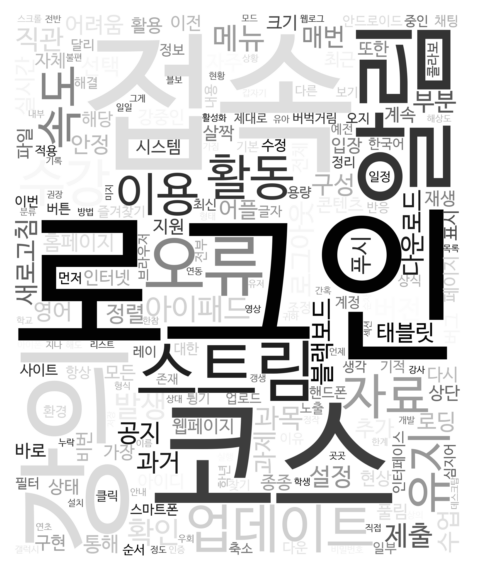

In [ ]:
%%time

#워드클라우드의 모양 설정. 원모양의 이미지를 그대로 가져와 만들도록 하였음.
cand_mask_cellphone =np.array(Image.open('/content/cellphone.png'))

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               width=500, height=500, scale=3.0, max_font_size=250, 
                background_color='white', 
               mask=cand_mask_cellphone,
               colormap = 'Greys') # seaborn color palette

gen = wc.generate_from_frequencies(c)

#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(gen,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
plt.savefig('q24_app.png')

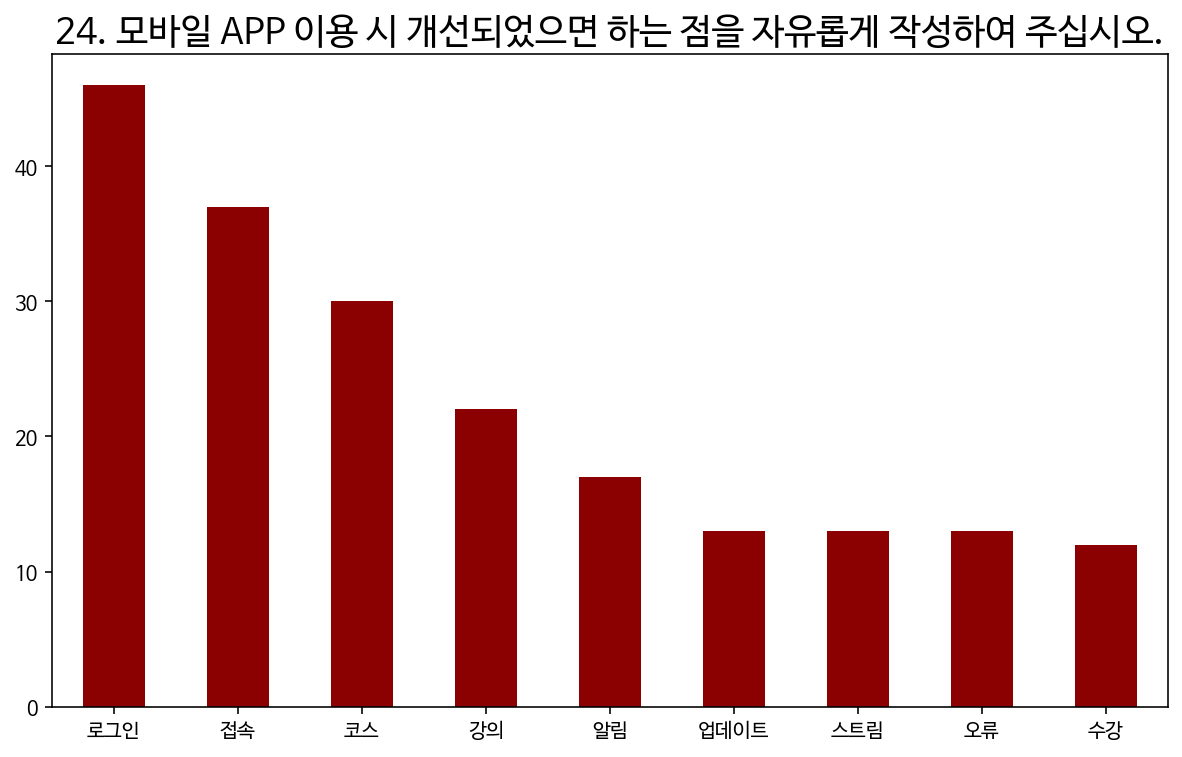

In [ ]:
## 단어 사용 빈도 
word_frequency = nltk.FreqDist(word_cleaned)
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys())

result = df.sort_values([0], ascending = False)
result = result[:9]
result.plot(kind='bar', legend=False, figsize=(10,6), color ='darkred')

plt.title(f"{questions_full['q24']}", fontsize = 18)
plt.xticks(rotation=0)
plt.show()

In [ ]:
ans_q24

['전반적인 모든 것(사실 모바일 사용을 권장하지 않고 있지 않습니까 ??! ㅎㅎ)',
 '코스 화면이 안 들어가짐 UI도 별로임',
 '알림기능 선택',
 '앱에 접속할 때마다 로그인 해야 하는 게 귀찮다',
 '알림 활성화',
 '수정 기능 사용의 한계',
 '강의파일 다운로드가 가능하도록 기능 추가',
 'ui가 블랙보드 웹페이지와 비슷하게 만들어졌으면 좋겠습니다.',
 '직관적인 인터페이스',
 '활동스트림에 과거 수강내역 숨김이 있었으면 좋겠습니다.',
 '간혹 접속이 불안정함. 강의 자료 다운이 안되는 경우가 있음.',
 '전체적으로 느리고 로그인이 맨날 풀려있어서 문제입니다',
 '항상 모바일로 들어가면 사이트로 들어간 것보다 정보가 더디게 뜸',
 '접속이 안되는 경우가 많습니다.',
 '앱 이용해 본 적 없음',
 '속도가 매우 느리다 특히 아이패드에서 쓸때 속도 개선이 되었으면 좋겠다',
 '유아이와 접속 오류',
 '모바일을 이용하지 않습니다.',
 '로딩이 느린 점',
 'ui개선',
 "자꾸 '귀하의 학교 계정 인증을 다시 해야합니다'가 뜨는데 매번 앱을 실행할 때마다 떠서 되게 불편합니다. 또, 이게 인터넷에서 정보를 받아오다보니 너무 느립니다.",
 '직관성이 떨어집니다. 이 부분에 대한 개선이 필요합니다.',
 '모바일도 PC처럼 학기 별로 수강하는 강의가 분류되어 있었으면 좋겠다.',
 '학생입장에서는 개선되었으면 하는 점은 크게 없고, 강사입장에서는 과제 제출현황을 자세히 볼 수 있었으면 좋겠습니다.',
 '모바일 app을 주기적으로 확인하는데, 내가 하지 않았는데 로그아웃이 되어있는 경우가 많이 있었다. 강의 알림이 핸드폰으로 오는 것이 편했는데, 로그아웃이 된 줄 몰라서 불편했다. ',
 '다양한 스마트폰 이용 환경에 맞는 해상도 조정이 필요하다고 생각합니다. 현재는 단순히 PC페이지를 축소해둔 정도로 보여, 내용이 잘려 전체적인 확인이 어렵거나 한 상황이 곳곳에서 보여 아쉽습니다.',
 'Face ID 를 활용한 자동로그인

In [ ]:
def category(ans): 
  if '로그인' in ans: 
    return '로그인'
  elif '코스' in ans: 
    return '코스'
  elif '접속' in ans: 
    return '접속'
  elif '알림' in ans: 
    return '알림'
  else: 
    return np.nan

ans_q24 = ans_df['q24'].dropna().reset_index()
ans_q24['category'] = ans_q24['q24'].apply(lambda ans: category(ans))

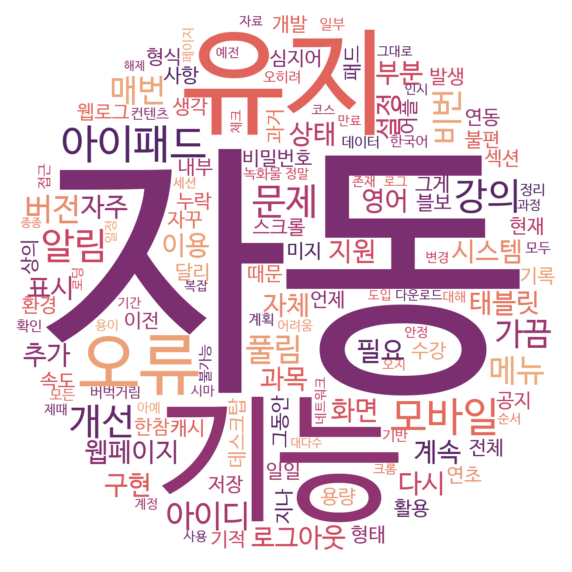

In [ ]:
ans_q24_login = ans_q24[ ans_q24['category'] == '로그인']

ans_login = ans_q24_login['q24'].dropna().tolist()
ans_login_joined = ' '.join(ans_login)

## 워드클라우드 
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(ans_login_joined, norm=True, stem=True) # POS Tagging

del_list = ['접속', '경우', '로그인']  
# cand_mask_rectangle =np.array(Image.open('/content/rectangle_01.png'))

word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외, 대신 "안, 못"같은 것까지 같이 지워져서 긍정,부정을 파악해야 되는경우는 제외하지 않는다.
            word_cleaned.append(word[0])
        
c = Counter(word_cleaned)

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               width=500, height=500, scale=3.0, max_font_size=250, 
                background_color='white', 
               mask=cand_mask,
               colormap = 'flare') # seaborn color palette

gen = wc.generate_from_frequencies(c)

#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(gen,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
plt.savefig('q36_group_login.png')

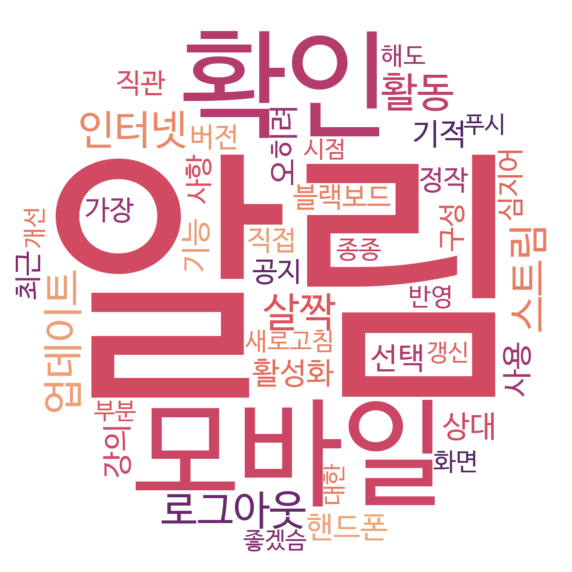

In [ ]:
ans_q24_login = ans_q24[ ans_q24['category'] == '알림']

ans_login = ans_q24_login['q24'].dropna().tolist()
ans_login_joined = ' '.join(ans_login)

## 워드클라우드 
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(ans_login_joined, norm=True, stem=True) # POS Tagging

del_list = ['접속', '경우']  
# cand_mask_rectangle =np.array(Image.open('/content/rectangle_01.png'))

word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외, 대신 "안, 못"같은 것까지 같이 지워져서 긍정,부정을 파악해야 되는경우는 제외하지 않는다.
            word_cleaned.append(word[0])
        
c = Counter(word_cleaned)

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               width=500, height=500, scale=3.0, max_font_size=250, 
                background_color='white', 
               mask=cand_mask,
               colormap = 'flare') # seaborn color palette

gen = wc.generate_from_frequencies(c)

#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(gen,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
plt.savefig('q36_group_login.png')

### 4.2. 그룹활동 

In [ ]:
220 - df_base['q36'].isna().sum() # 존재하는 데이터 수 

108

In [ ]:
# df_base['q36'].dropna() 

In [ ]:
%%time
def return_nan(ans): 
  nan_list = []
  if type(ans) != str or ans in nan_list: 
    return np.nan
  else: return ans  

ans_df = pd.DataFrame(df_base['q36'].dropna().reset_index())
ans_df['q36'] = ans_df['q36'].apply(lambda ans: return_nan(ans))

CPU times: user 6.12 ms, sys: 10 µs, total: 6.13 ms
Wall time: 37.1 ms


In [ ]:
%%time
ans = ans_df['q36'].dropna().tolist()
# del ans[ans.index(7)]
for i in range(len(ans)): 
  if type(ans[i]) != str: 
    print(f'idx: {i}\n{ans[i]} ')

ans_joined = ' '.join(ans)
print(len(ans))
print(len(ans_joined))

108
2636
CPU times: user 2.49 ms, sys: 841 µs, total: 3.33 ms
Wall time: 8.34 ms


In [ ]:
## 워드클라우드 
%%time
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(ans_joined, norm=True, stem=True) # POS Tagging

del_list = []  

word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외, 대신 "안, 못"같은 것까지 같이 지워져서 긍정,부정을 파악해야 되는경우는 제외하지 않는다.
            word_cleaned.append(word[0])
        
c = Counter(word_cleaned)

CPU times: user 1.21 s, sys: 11.1 ms, total: 1.22 s
Wall time: 1.7 s


CPU times: user 1.17 s, sys: 47.3 ms, total: 1.21 s
Wall time: 2.39 s


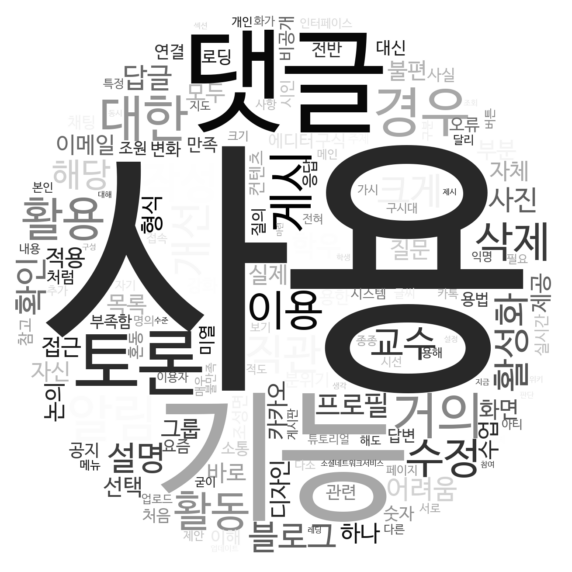

In [ ]:
%%time
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               width=500, height=500, scale=3.0, max_font_size=250, 
                background_color='white', 
               mask=cand_mask,
               colormap = 'Greys') # seaborn color palette

gen = wc.generate_from_frequencies(c)

#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(gen,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
plt.savefig('q36_group.png')

In [ ]:
def have_used(ans): 
  if '사용' in ans and '못' in ans: 
    return '없음' 
  elif '사용' in ans and '않' in ans: 
    return '없음'
  elif '써' in ans and '않' in ans: 
    return '없음'
  elif '이용' in ans and '없' in ans: 
    return '없음'
  elif '사용' in ans and '않' in ans: 
    return '없음'
  elif '사용' in ans and '없' in ans: 
    return '없음'
  elif '써' in ans and '모르' in ans: 
    return '없음'  
  elif '활용' in ans and '않' in ans: 
    return '없음'
  elif '쓰' in ans and '않' in ans: 
    return '없음'
  elif ans in ['크게 활용한 적이 없음', '활성화되면 더 좋겠습니다']:
    return '없음'
  else: 
    if '없습' in ans or '없음' in ans: 
      return np.nan 
    else: 
      return '있음'

ans_df['사용 경험'] = ans_df['q36'].apply(lambda ans: have_used(ans))
#ans_df

In [ ]:
have_used_agg = ans_df.dropna().groupby('사용 경험').agg(cnts = ('사용 경험', 'count'))
have_used_agg = have_used_agg.reset_index()
have_used_agg

사용 경험  cnts
0    없음    30
1    있음    55

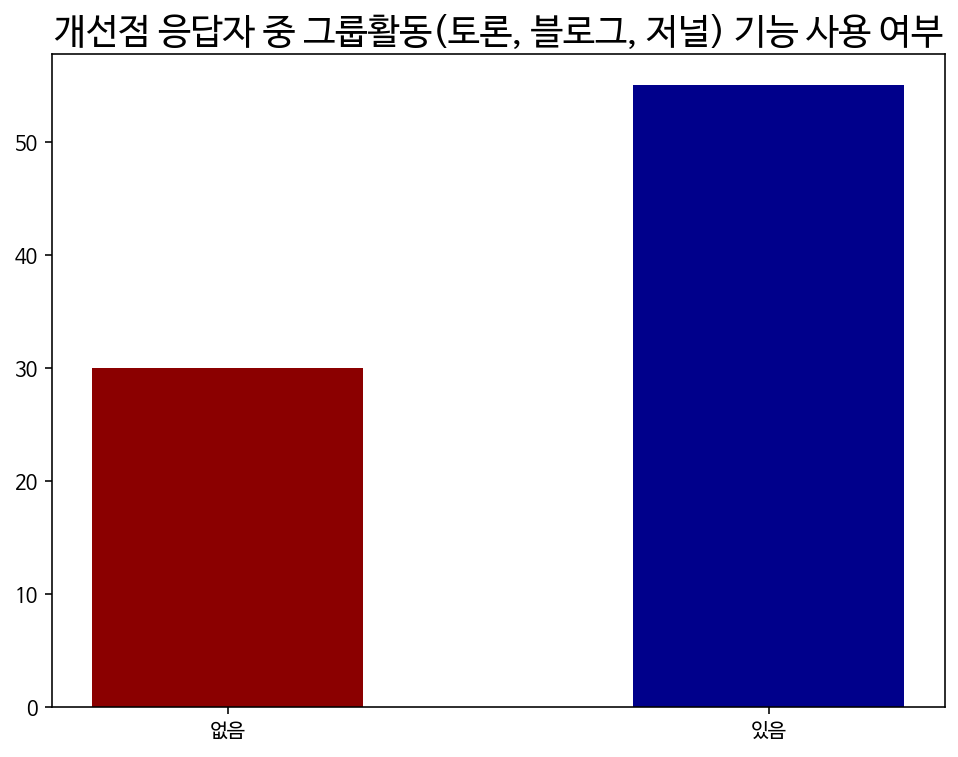

In [ ]:
result = have_used_agg 
# result = result[:6]

plt.figure(figsize = (8, 6))
plt.bar(result['사용 경험'].tolist(), result['cnts'].tolist(), color = ['darkred', 'darkblue'], width = 0.5)

# result.plot(kind='bar', legend=False, figsize=(10,6), color ='darkred')
# plt.xlabel(result['분류'])

plt.title(f"개선점 응답자 중 그룹활동(토론, 블로그, 저널) 기능 사용 여부", fontsize = 18)
plt.xticks(rotation=0)
plt.show()

분명하게 드러나진 않는 것 같다 

In [ ]:
len( ans_df[ ans_df['사용 경험'] == '없음'])

30

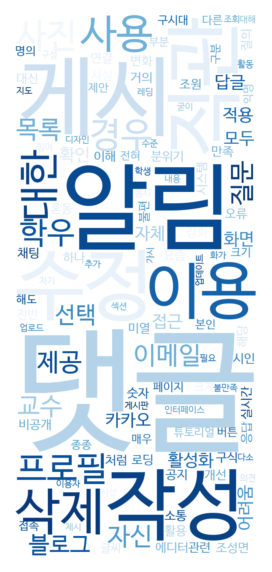

In [ ]:
ans_df = ans_df.dropna()
ans_df_used = ans_df[ ans_df['사용 경험'] == '있음']

ans_used = ans_df_used['q36'].dropna().tolist()
ans_used_joined = ' '.join(ans_used)

## 워드클라우드 
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(ans_used_joined, norm=True, stem=True) # POS Tagging

del_list = ['기능', '토론', '바로']  
cand_mask_rectangle =np.array(Image.open('/content/rectangle_01.png'))

word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외, 대신 "안, 못"같은 것까지 같이 지워져서 긍정,부정을 파악해야 되는경우는 제외하지 않는다.
            word_cleaned.append(word[0])
        
c = Counter(word_cleaned)

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               width=500, height=500, scale=3.0, max_font_size=250, 
                background_color='white', 
               mask=cand_mask_rectangle,
               colormap = 'Blues') # seaborn color palette

gen = wc.generate_from_frequencies(c)

#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(gen,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
plt.savefig('q36_group_used.png')

In [ ]:
ans_used

['전반적으로 만족',
 '글 작성할 때 에디터가 너무 구식이고 느려서 잘 이용하게 되지 않습니다.',
 '로딩이 느려서 더 빨랐으면 합니다',
 '.',
 '연결 오류 ',
 '알림이 이메일로도 왔으면 좋겠다',
 '자신의 댓글을 바로 찾을 수 있는 기능이 있었으면 좋겠다.',
 '자유롭게 토론할 분위기 조성면에서 부족한 점이 보입니다.',
 '토론 관련 공지가 토론 창에서도 제공되었으면 좋겠다',
 '교수님께 비공개로 질문하고 싶은 질문이 있는데, 이를 위한 잠금기능이 있었으면 좋겠다. ',
 '게시글을 누르지 않아도 목록에서 바로 댓글을 달 수 있게 기능이 수정되면 좋겠습니다',
 'X',
 '블로그 미열람 글 알림 변화(숫자 대신 N 등)',
 '게시글 여러개를 보려면 선택을 하나씩 한 후에 몰아서봐야된다는게 좀 이해가 안되었습니다',
 '토론 기능 활성화를 위한 알림 강화 등이 이루어졌으면 합니다.',
 '시인성이 개선되었으면 합니다.',
 '같은 조원들 이메일을 알 수 있어 편하다. 그런데, 블로그 기능은 사실상 이용이 거의 되고 있지 않다. 요즘 카카오톡으로 많이 소통을 하는데, 카카오톡이나 Slack처럼 실시간으로 채팅할 수 있는 기능이 있으면 좋겠다.',
 '글 작성과 댓글 작성이 혼동됨.',
 '활용도 낮음',
 '질의응답 기능 확인 불편',
 '댓글 시스템이 직관적이지 않음.',
 '수정 및 삭제가 가능했으면 좋겠다',
 '해당 기능이 접근 및 사용하기에 어렵습니다. 튜토리얼이라도 제공되었으면 합니다.',
 '글씨 크기를 좀 더 크게 해도 좋을 것 같습니다.',
 'thread 수정 기능 제안',
 '댓글 부분이 더 눈에 띄게 들어가면 좋을 것 같습니다. 첫 게시글에 대한 댓글과 댓글에 대한 댓글이 잘 구분되지 않아 헷갈리는 경우가 종종 있었습니다. ',
 '매우 만족합니다.',
 '앱 접속 시 댓글에 한명의 프로필 사진이 모두에게 적용됩니다.. 프로필 사진이 있는 학우가 댓글을 쓰면 다른 학우들에게도 그 학우의 프로필 사진이 모두 적용되어

### 6.3 코스화면 구성 
- q26 

In [ ]:
questions_full['q26']

'26. 코스 화면에서 개선되었으면 하는 점을 자유롭게 작성하여 주십시오.'

In [ ]:
%%time
df_q26 = df_base['q26'].dropna().reset_index()
ans_q26 = df_q26['q26'].tolist()
# ans_joined = ' '.join(ans_q42)

CPU times: user 2.43 ms, sys: 0 ns, total: 2.43 ms
Wall time: 2.41 ms


In [ ]:
df_q26.shape

(148, 2)

CPU times: user 2.99 s, sys: 55.8 ms, total: 3.04 s
Wall time: 2.01 s


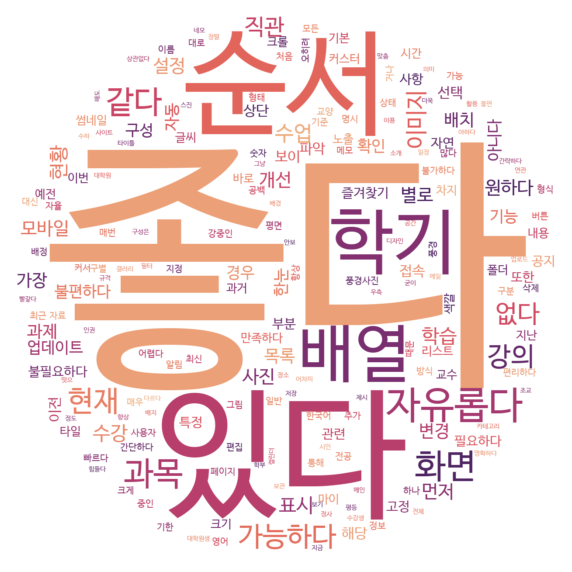

In [ ]:
## 워드클라우드 
%%time
tokenizer = Okt()
ans_joined = ' '.join(ans_q26)

raw_pos_tagged = tokenizer.pos(ans_joined, norm=True, stem=True) # POS Tagging

del_list = ['코스']  

word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun", 'Adjective']: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if ((len(word[0]) != 1) & (word[0] not in del_list)): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외, 대신 "안, 못"같은 것까지 같이 지워져서 긍정,부정을 파악해야 되는경우는 제외하지 않는다.
          word_cleaned.append(word[0])
        
c = Counter(word_cleaned)

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               width=500, height=500, scale=3.0, max_font_size=250, 
                background_color='white', 
               mask=cand_mask,
               colormap = 'flare') # seaborn color palette

gen = wc.generate_from_frequencies(c)

#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(gen,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
plt.savefig('q26_course.png')

In [ ]:
## '순서' 포함된 의견 
ans_q26_sem = []
for ans in ans_q26: 
  if '순서' in ans: 
    ans_q26_sem.append(ans)

print(len(ans_q26_sem))

45


In [ ]:
ans_q26_sem

['코스 순서 배열',
 '코스 순서 편집 가능하도록',
 '코스 순서를 자유롭게 배열 혹은 정렬 후 저장할 수 있었으면 좋겠다.',
 '코스 순서를 자유롭게 배열할 수 있으면 좋겠음',
 '코스 순서 자유롭게 배열가능하면 좋겠네요',
 '코스 순서 자유롭게 배열 ...\n코스 더 직관적으로 디자인 변경\n자연 이미지 말고 수업 이미지나 교수님 사진으로 넣어주세요',
 '코스 순서를 사용자 맞춤으로 변경할 수 있었으면 좋겠음',
 '코스 순서를 자유롭게 배열할 수 있으면 좋겠음',
 '1. 원하는 학기의 코스만 뜨게 만들 수 있으면 좋겠음. 2. 숨기기 기능이 있으면 좋겠음 3. 코스순서 자유롭게 배열할 수 있으면 좋겠음',
 '코스 순서 중 최신 게 가장 위에 떴으면 좋겠고 순서를 자율적으로 정할 수 있으면 좋을 것 같음',
 '코스 순서를 자유롭게 배열할 수 있으면 좋겠음 / 인권과 성평등 이수하라고 공지가 되면 좋겠음',
 '순서 배열 편집 기능과, 가능하면 전공, 교양과 같은 카테고리별로 구분이 가능하도록 하면 좋을 것 같아요',
 '코스 순서 배열을 원하는 대로 하고 싶습니다. 코스 보여주기 방식이 현재 타일(강의명+풍경사진), 긴 네모(?) 형식인데, 그냥 일반적인 정사각 타일(강의명만) 형식이 있으면 좋겠습니다. 공지사항이나 자료가 업로드가 되면 코스 타일에 빨간 점이나 우측 상단 숫자배지가 있으면 좋겠습니다.',
 "처음 들어가면 '현재'코스로 들어가게 되는데 이게 이번 학기에 듣는 과목들이 아니라 다른 과목들이 들어가 있다. 그래서 순서나 처음 들어갈 때 나오는 것을 자유로이 배열할 수 있으면 좋겠다",
 '평면적 구조로 인해 내가 원하는 특정 과목을 찾는데 바로 찾지 못하고 시간이 소요된다. \n 차라리 리스트형 UI대신에 폴더형 UI를 쓰면 어떨까 싶으며, 순서 배열이라고 가능하면 좀 나을 것 같다.\n제목 색깔을 지정할 수 있어도 좋을것 같다. 그리고 안타깝겠지만 과목마다 그림이 하나씩 배정되는게 블랙보드의 특징인데, 그건 미관상 좋을 뿐

### 4.1 시험 기능 (이건 보고서에 포함 X) 

In [ ]:
### 4.1 시험 기능 

In [ ]:
220 - df_base['q40'].isna().sum() # 존재하는 데이터 수 

99

In [ ]:
%%time
def return_nan(ans): 
  nan_list = ['안 써봤다', '사용 안해봤어요', '사용해 본 적이 없음.'
             '딱히 없다.', '이것도 사용해본적 없다', '사용한 적이 없어서 모르겠습니다.', '안써봄' ]
  if type(ans) != str or ans in nan_list: 
    return np.nan
  elif '없' in ans: 
    return '만족'
  else: return ans 

ans_df = pd.DataFrame(df_base['q40'].dropna().reset_index())
ans_df['q40'] = ans_df['q40'].apply(lambda ans: return_nan(ans))
# ans_df

CPU times: user 4.27 ms, sys: 891 µs, total: 5.16 ms
Wall time: 5.75 ms


In [ ]:
%%time
ans = ans_df['q40'].dropna().tolist()
# del ans[ans.index(7)]
for i in range(len(ans)): 
  if type(ans[i]) != str: 
    print(f'idx: {i}\n{ans[i]} ')

ans_joined = ' '.join(ans)
print(len(ans))
print(len(ans_joined))

95
2233
CPU times: user 4.53 ms, sys: 34 µs, total: 4.57 ms
Wall time: 4.99 ms


In [ ]:
## 워드클라우드 
%%time
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(ans_joined, norm=True, stem=True) # POS Tagging

del_list = ['배경', '락다운', '시험', '브라우저']  

word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외, 대신 "안, 못"같은 것까지 같이 지워져서 긍정,부정을 파악해야 되는경우는 제외하지 않는다.
            word_cleaned.append(word[0])
        
c = Counter(word_cleaned)

CPU times: user 743 ms, sys: 8.63 ms, total: 751 ms
Wall time: 446 ms


CPU times: user 456 ms, sys: 29.9 ms, total: 486 ms
Wall time: 487 ms


(-0.5, 1244.5, 1244.5, -0.5)

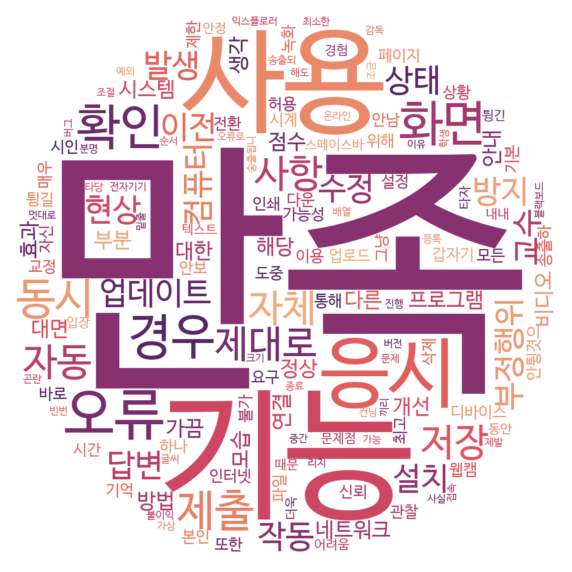

In [ ]:
%%time
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               width=500, height=500, scale=3.0, max_font_size=250, 
                background_color='white', 
               mask=cand_mask,
               colormap = 'flare') # seaborn color palette

gen = wc.generate_from_frequencies(c)

#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(gen,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
#plt.savefig('test.png')

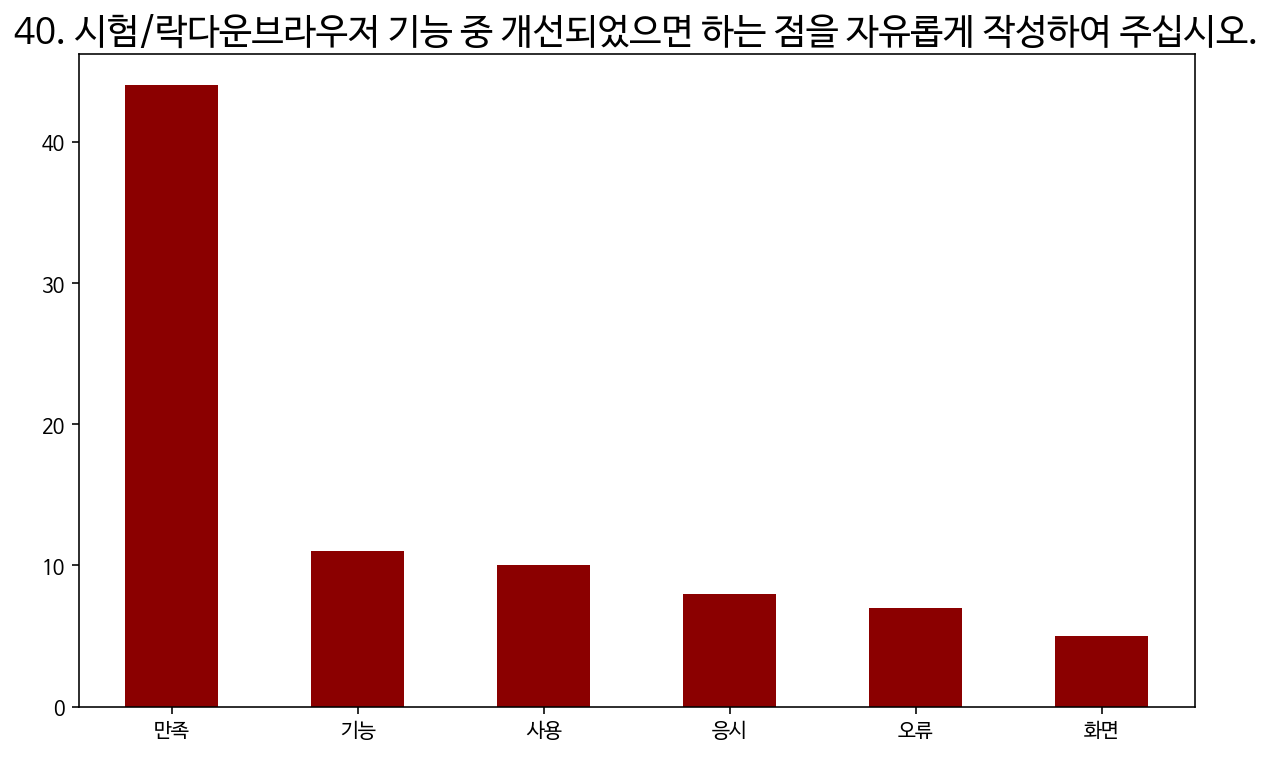

In [ ]:
## 단어 사용 빈도 
word_frequency = nltk.FreqDist(word_cleaned)
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys())

result = df.sort_values([0], ascending = False)
result = result[:6]
result.plot(kind='bar', legend=False, figsize=(10,6), color ='darkred')

plt.title(f"{questions_full['q40']}", fontsize = 18)
plt.xticks(rotation=0)
plt.show()

In [ ]:
## 개선사항 수렴 

%%time
def get_class(suggestion): 
  if type(suggestion) == str: 
    if 'ZOOM' in suggestion or 'zoom' in suggestion or 'Zoom' in suggestion or '줌' in suggestion: 
      return 'zoom'
    elif '오류' in suggestion and '않' in suggestion: 
      return np.nan
    elif '부정행위' in suggestion or '커닝' in suggestion: 
      return '부정행위'
    elif '네트워크' in suggestion or '연결' in suggestion: 
      return '네트워크'
    elif '현상' in suggestion or '오류' in suggestion: 
      return '오류'
    elif '기능' in suggestion or '불편' in suggestion or '순서' in suggestion or '기능' in suggestion or '저장' in suggestion:
      return '기능 개선 필요'
    else: return np.nan
  else: 
    return np.nan

suggestions_df = pd.DataFrame(ans_df['q40'].copy())
suggestions_df.dropna()

suggestions_df['분류'] = suggestions_df['q40'].apply(lambda sug: get_class(sug))
suggestions_df.sort_values(by = '분류', inplace =True)
suggestions_df.dropna(inplace= True)

CPU times: user 8.2 ms, sys: 14 µs, total: 8.22 ms
Wall time: 12.2 ms


In [ ]:
#suggestions_df

In [ ]:
suggestions_agg = suggestions_df.groupby('분류').agg({'q40': 'count'}).reset_index()
suggestions_agg.sort_values(by = 'q40', ascending = False)
suggestions_agg.rename(columns = {'q40': 'cnts'}, inplace = True)
suggestions_agg

분류  cnts
0      zoom     6
1  기능 개선 필요     9
2      네트워크     4
3      부정행위     1
4        오류     8

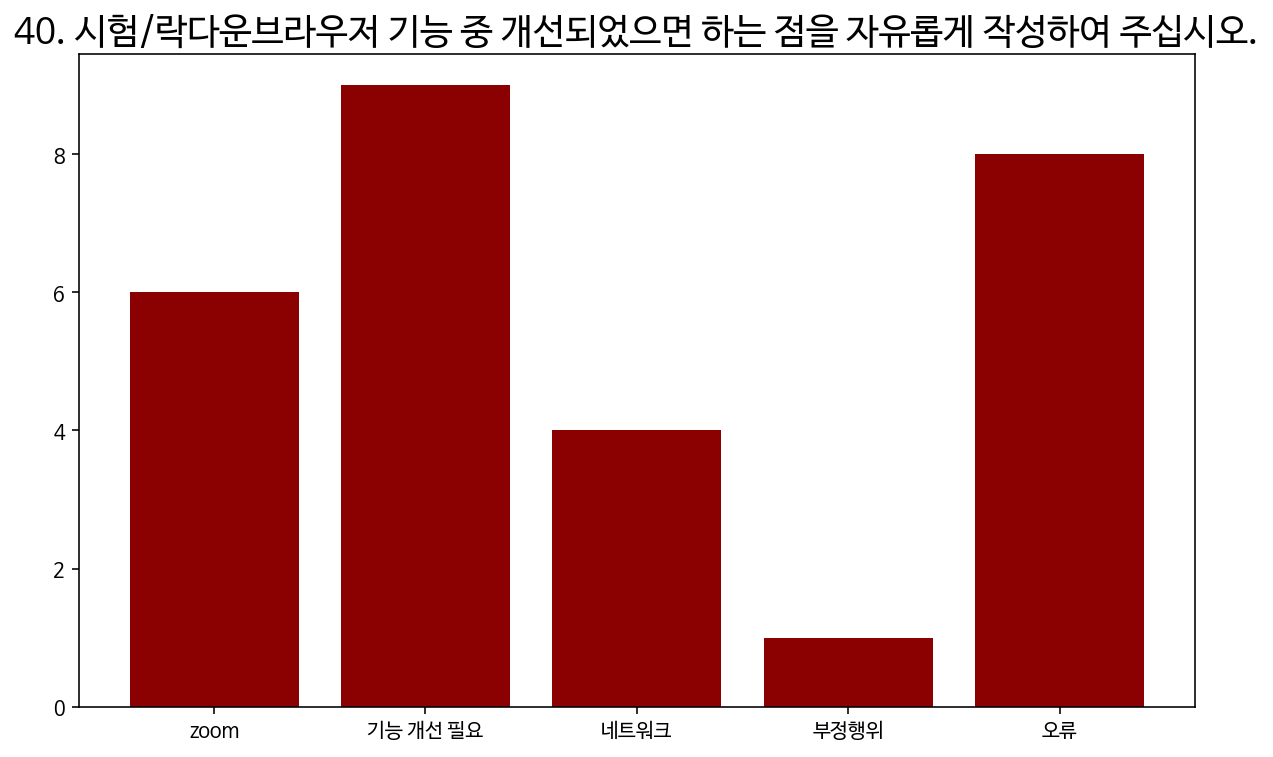

In [ ]:
result = suggestions_agg
# result = result[:6]

plt.figure(figsize = (10, 6))
plt.bar(result['분류'].tolist(), result['cnts'].tolist(), color ='darkred')

# result.plot(kind='bar', legend=False, figsize=(10,6), color ='darkred')
# plt.xlabel(result['분류'])

plt.title(f"{questions_full['q40']}", fontsize = 18)
plt.xticks(rotation=0)
plt.show()

In [ ]:
# %%time
# fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8)) # 빈 캔버스

# sns.barplot(
#     data = suggestions_agg,
#     x = '분류',
#     y = 'cnts', 
#     palette= 'coolwarm'
# )

# #ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x: 0,.0f}'))
# plt.title(f'', fontsize = 20)
# # plt.axhline(100, color = 'darkred', linestyle = '--', linewidth = 0.5)
# # plt.axhline(20, color = 'darkred', linestyle = '--', linewidth = 0.5)
# plt.show()

## 학습관리시스템(LMS) 블랙보드와 관련하여 개선되었으면 하는 사항
- q45

In [ ]:
df_q45 = df_base['q45'].dropna().reset_index() 

In [ ]:
ans = df_base['q45'].dropna().tolist()

ans_joined = ' '.join(ans)
print(len(ans))
print(len(ans_joined))

105
4610


In [ ]:
# 워드클라우드 
%%time
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(ans_joined, norm=True, stem=True) # POS Tagging

del_list = []  

word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외, 대신 "안, 못"같은 것까지 같이 지워져서 긍정,부정을 파악해야 되는경우는 제외하지 않는다.
            word_cleaned.append(word[0])
        
c = Counter(word_cleaned)

CPU times: user 1.35 s, sys: 6.95 ms, total: 1.36 s
Wall time: 780 ms


CPU times: user 828 ms, sys: 51.1 ms, total: 879 ms
Wall time: 890 ms


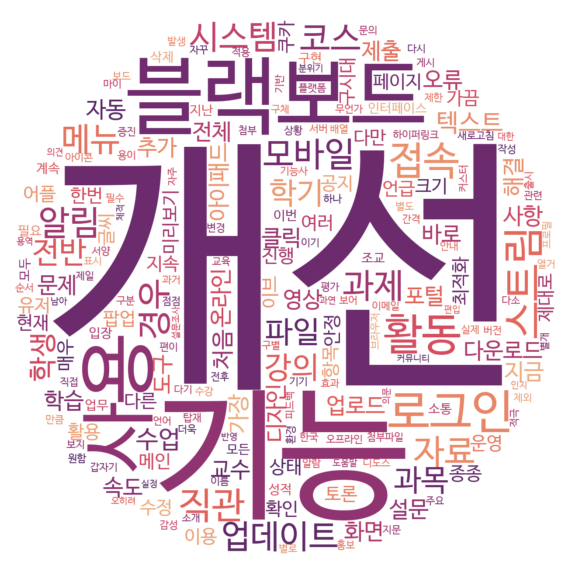

In [ ]:
%%time
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               width=500, height=500, scale=3.0, max_font_size=250, 
                background_color='white', 
               mask=cand_mask,
               colormap = 'flare') # seaborn color palette

gen = wc.generate_from_frequencies(c)

#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(gen,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
plt.savefig('q45_blackboard.png')

In [ ]:
len(df_q45['q45'].tolist())

105

In [ ]:
count = 0 
ans_suggestion = []

for ans in df_q45['q45'].tolist(): 
  if '개선' in ans: 
    count += 1 
    ans_suggestion.append(ans)
    print(ans)

# print()
# print(count)

토론방-학생자료실에 게시글 작성하여 첨부자료를 업로드할 때 글 하나에 파일이 1개만 올라가도록 제한되어 있는데 첨부파일을 여러 개 업로드 할 수 있도록 개선되었으면 좋겠습니다.
블랙보드 앱 개선이 필요하다.
모바일 버전이 더 개선되면 좋겠습니다
사용 편이를 지속적으로 개선해주셨으면 좋겠습니다.
모바일에서 파일이 다운로드 되지 않는 문제가 개선되었으면 좋겠다.
블래보드로 과제 제출시, pdf를 제외하면, 과제가 줄여져 보어는 상황이 있는데, 이것이 개선되었으면 좋겠다. 
전반적으로 만족스럽지만 접속 속도 개선 등이 된다면 더욱 좋을 것 같습니다.
모바일 환경 개선이 필요해보입니다.
지금으로도 전반적으로 만족스럽다. 원하는 개선점은 이미 다 적었다.
이 설문 할때마다 쓰는 것이지만, 어플의 최적화가 시급함.. 자료가 올라와도 한동안 스트림에 업데이트 되지 않고, 알림도 몇분 후에 늦게 오는 점 등 개선되어야 할 점이 많음.
강의 영상 등 업로드시 너무 느립니다. 그리고 메뉴가 직관적으로 되어있다기보다 다 열거되어 있어 주요 활용하는 기능을 부각시키는 등의 개선이 있다면 좋겠습니다.
브라우저 기반의 시스템이니만큼 어느 기기에서나 원활하게 사용할 수 있도록 개선했으면 합니다.
UI 개선 및 피드백속도 개선
설문조사 의견 반영 해서 개선해주시면 감사하겠습니다.
현재 블랙보드 UI는 대체적으로 디자인하다 만 것 같은 구시대적인 분위기가 매우 강하며 여러 기능이 직관적으로 눈에 들어오지 않아, 과연 제대로 된 시스템인지에 대한 의문이 강하게 남아 있음. 오히려 쿠카이브의 '학습활동' 메뉴가 훨씬 직관적으로 다가오는 실정인데, 용역을 맡기든 여하의 방식을 통해 유저 인터페이스를 직관적이고 편리하게 개선할 것을 요망함.

더불어 현재 고려대학교의 학생 온라인 업무가 포털(KUPID; 학적사항, 성적처리, 장학금 등 실업무), 블랙보드(KULMS; 학업), 쿠카이브(Kuchive; 비교과라지만 정작 이수과목으로의 확장성을 띠고 있음), 네이버웍스(메일 용도이지만 캘린더, to-

CPU times: user 1.21 s, sys: 46 ms, total: 1.25 s
Wall time: 1.09 s


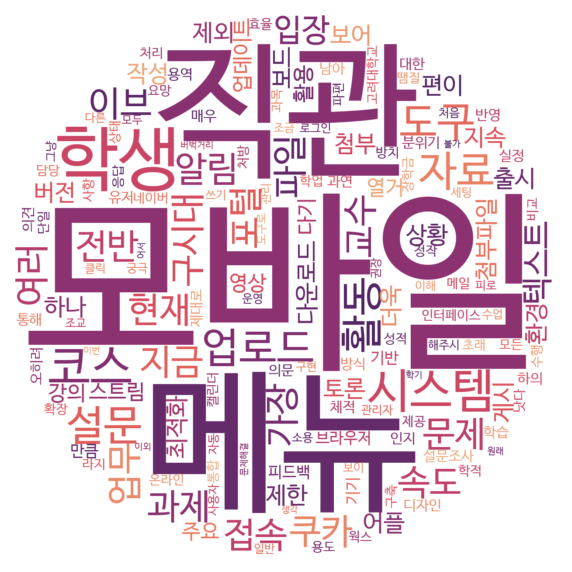

In [ ]:
%%time
ans_joined = ' '.join(ans_suggestion)

# 워드클라우드 
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(ans_joined, norm=True, stem=True) # POS Tagging

del_list = ['개선', '기능', '사용', '블랙보드']  

word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외, 대신 "안, 못"같은 것까지 같이 지워져서 긍정,부정을 파악해야 되는경우는 제외하지 않는다.
            word_cleaned.append(word[0])
        
c = Counter(word_cleaned)

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               width=500, height=500, scale=3.0, max_font_size=250, 
                background_color='white', 
               mask=cand_mask,
               colormap = 'flare') # seaborn color palette

gen = wc.generate_from_frequencies(c)

#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(gen,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
plt.savefig('q45_blackboard_improve.png')

## _7. 차세대 LMS 의견 수렴 
- q46~ q50 

In [ ]:
lms_cols = ['q46', 'q47', 'q48', 'q49', 'q50']

for col in lms_cols: 
  print(f'{questions_full[col]}')

46. 차세대 학습관리시스템(LMS)를 도입하는 것에 대해 어떻게 생각하십니까? 
47. 차세대 학습관리시스템(LMS)을 도입을 희망하지 않는 이유에 대해 작성하여 주십시오.
48. 차세대 학습관리시스템(LMS)을 도입을 희망하는 이유에 대해 작성하여 주십시오.
49. 차세대 학습관리시스템(LMS)을 도입하게 된다면, 반드시 유지해야 하는 기능에 대해 작성하여 주십시오.
50. 차세대 학습관리시스템(LMS)을 도입하게 된다면, 새롭게 도입되길 희망하는 기능에 대해 작성하여 주십시오.


In [ ]:
## q46
df_base['q46'].unique().tolist()

['차세대 학습관리시스템(LMS) 도입 희망', '현재 학습관리시스템(LMS) 블랙보드 유지', '상관없음']

In [ ]:
df_q46_agg = df_base.groupby('q46').agg(cnts = ('user_id','count')).reset_index()
df_q46_agg

q46  cnts
0                     상관없음    62
1   차세대 학습관리시스템(LMS) 도입 희망    59
2  현재 학습관리시스템(LMS) 블랙보드 유지    99

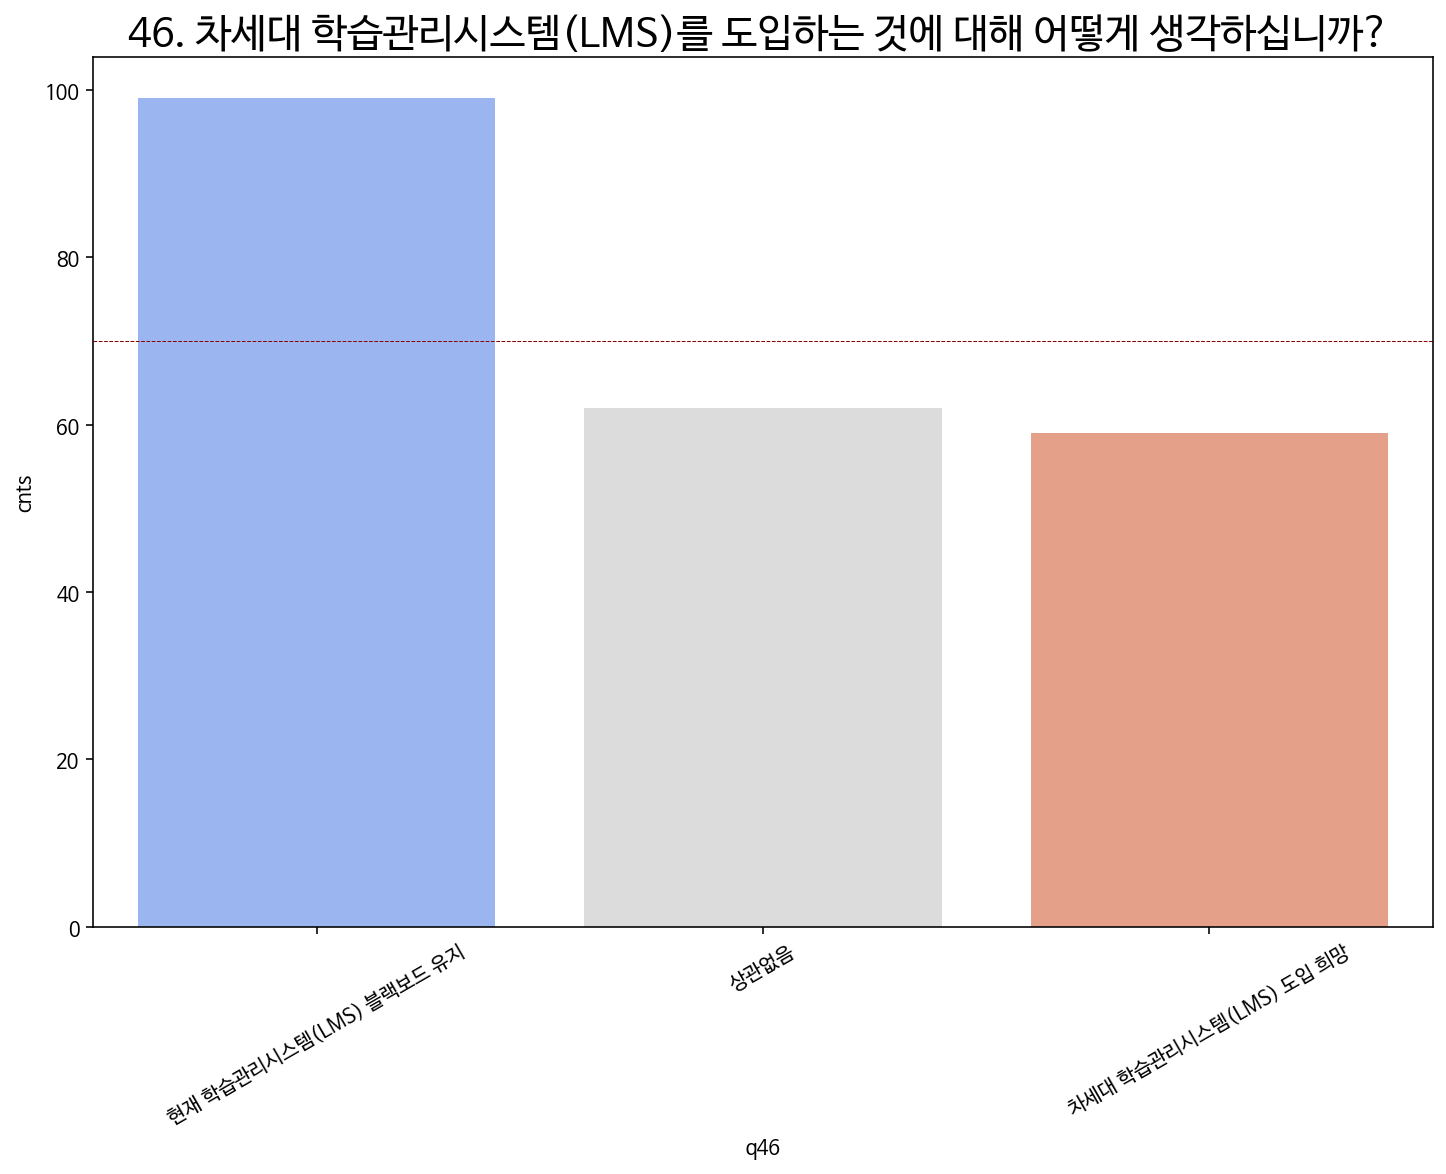

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8)) # 빈 캔버스

# 값 replace 
# df_q21_agg['ans'] = df_q21_agg['ans'].replace('실시간 화상강의(Zoom, Collaborate) 참여', '실시간 화상강의 참여')
# df_q21_agg['ans'] = df_q21_agg['ans'].replace('학습활동(토론, 위키, 블로그, 저널 등) 참여', '학습활동 참여')
# df_q21_agg['ans'] = df_q21_agg['ans'].replace('메시지(수/발신) 기능', '메시지 기능')

df_q46_agg.sort_values(by = 'cnts', ascending = False, inplace=True)

sns.barplot(
  data = df_q46_agg,
  x = 'q46',
  y = 'cnts', 
  palette='coolwarm'
)

temp = 'q46'
plt.title(f'{questions_full[temp]}', fontsize = 20)
#ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x: 0,.0f}'))
plt.axhline(70, color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.xticks(rotation= 30)

plt.show()

In [ ]:
# df_q46 = df_base['q46'].dropna().reset_index() # 객관식 
df_q47 = df_base['q47'].dropna().reset_index()
df_q48 = df_base['q48'].dropna().reset_index()
df_q49 = df_base['q49'].dropna().reset_index()
df_q50 = df_base['q50'].dropna().reset_index()

In [ ]:
%%time
ans_q47 = df_base['q47'].dropna().tolist()

ans_joined = ' '.join(ans_q47)
print(len(ans_q47))
print(len(ans_joined))

## 워드클라우드 
%%time
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(ans_joined, norm=True, stem=True) # POS Tagging

del_list = ['쿠카', '이브', '교육']  

word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외, 대신 "안, 못"같은 것까지 같이 지워져서 긍정,부정을 파악해야 되는경우는 제외하지 않는다.
            word_cleaned.append(word[0])
        
c = Counter(word_cleaned)

74
3417


UsageError: Line magic function `%%time` not found.


In [ ]:
c['생각'] = 0
c['교육'] = 0
c['학습'] = 0
c['쿠카'] = 0
c['이브'] = 0

CPU times: user 776 ms, sys: 50.6 ms, total: 826 ms
Wall time: 862 ms


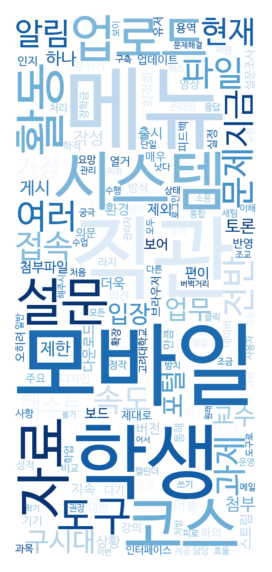

In [ ]:
%%time

#워드클라우드의 모양 설정. 원모양의 이미지를 그대로 가져와 만들도록 하였음.
cand_mask_rectangle =np.array(Image.open('/content/rectangle_01.png'))

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               width=500, height=500, scale=3.0, max_font_size=250, 
                background_color='white', 
               mask=cand_mask_rectangle,
               colormap = 'Blues') # seaborn color palette

gen = wc.generate_from_frequencies(c)

#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(gen,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
plt.savefig('q47.png')


CPU times: user 1.25 s, sys: 39.1 ms, total: 1.29 s
Wall time: 1.29 s


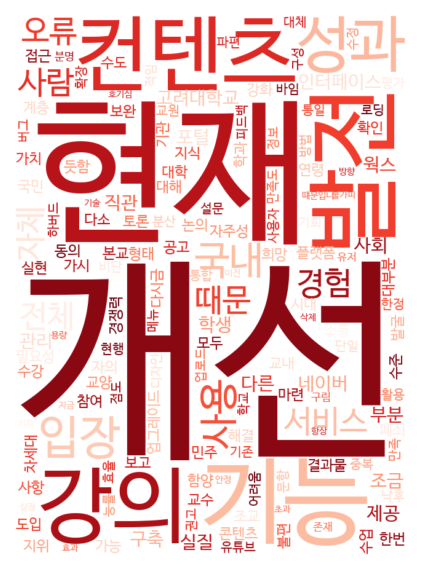

In [ ]:
%%time
ans_q48 = df_base['q48'].dropna().reset_index()['q48'].tolist()
ans_joined = ' '.join(ans_q48)

# 워드클라우드 
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(ans_joined, norm=True, stem=True) # POS Tagging

del_list = ['블랙보드', '시스템']  

word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외, 대신 "안, 못"같은 것까지 같이 지워져서 긍정,부정을 파악해야 되는경우는 제외하지 않는다.
            word_cleaned.append(word[0])
        
c = Counter(word_cleaned)

c['생각'] = 0
c['교육'] = 0
c['학습'] = 0
c['쿠카'] = 0
c['이브'] = 0

#워드클라우드의 모양 설정. 원모양의 이미지를 그대로 가져와 만들도록 하였음.
cand_mask_rectangle =np.array(Image.open('/content/rectangle_02.png'))

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               width=500, height=500, scale=3.0, max_font_size=250, 
                background_color='white', 
               mask=cand_mask_rectangle,
               colormap = 'Reds') # seaborn color palette

gen = wc.generate_from_frequencies(c)

#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(gen,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
plt.savefig('q48.png')

CPU times: user 1.43 s, sys: 54.3 ms, total: 1.48 s
Wall time: 1.71 s


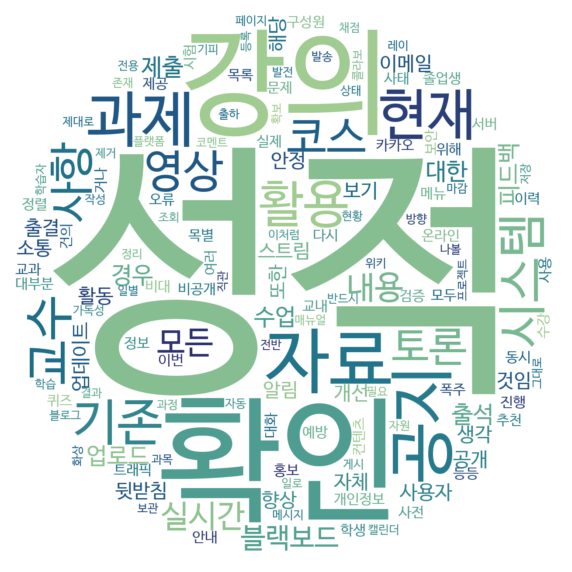

In [ ]:
%%time
ans_q49 = df_base['q49'].dropna().reset_index()['q49'].tolist()
ans_joined = ' '.join(ans_q49)

# 워드클라우드 
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(ans_joined, norm=True, stem=True) # POS Tagging

del_list = ['기능', '유지']  

word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외, 대신 "안, 못"같은 것까지 같이 지워져서 긍정,부정을 파악해야 되는경우는 제외하지 않는다.
            word_cleaned.append(word[0])
        
c = Counter(word_cleaned)

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               width=500, height=500, scale=3.0, max_font_size=250, 
                background_color='white', 
               mask=cand_mask,
               colormap = 'crest') # seaborn color palette

gen = wc.generate_from_frequencies(c)

#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(gen,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
plt.savefig('q49.png')

In [ ]:
ans_q49

['영상 출결 시스템이 좀 잘 되었으면 좋겠습니다. ',
 '코스 성적 공지사항 과제제출 ',
 '공지 및 토론메뉴',
 '활동스트림과 같이 실시간으로 교과목별 업데이트된 내용을 한 눈에 확인할 수 있는 기능 ',
 '자료 업로드',
 '현재 모든 기능은 유지',
 '성적 /공지/과제 이메일로 보내는 기능',
 '현재 블랙보드에 있는 기능은 모두 유지되어야 합니다.',
 '공지기능',
 '토론식 수업의 내용을 공개할 경우, 학생들의 정보는 비공개가 되었으면 좋겠다. ',
 '교내 구성원들의 개인정보에 대한 철저한 보안이 뒷받침될 수 있어야 합니다. 또한, 수많은 사용자가 동시에 사용하게 되면서 트래픽이 폭주하거나, 이번 카카오 사태처럼 서버의 불안정 등의 문제에 관한 사전 예방이 뒷받침 되어야 합니다.',
 '현재의 Zoom 등 온라인 강의의 출결시스템은 유지되었으면 합니다',
 '기존의 블랙보드 기능',
 '소통과 대화, 건의와 추천, 안내와 홍보가 꼭 필요할 것 같습니다.',
 '코스 목록 정렬 및 활동스트림 업데이트 및 알림',
 '피드백기능, 영상출석 확인 ',
 '대부분 기능',
 '졸업생 등 기존 수강했던 이력을 다시 확인할 수 있으면 좋겠습니다. (내용 및 강의 자료 등등)',
 '실시간 강의, 퀴즈, 시험 등 비대면 강의를 원활하게 진행하기 위해 필요한 모든 기능',
 '시스템 오류 없길',
 '사용자 검증, 컨텐츠 ip',
 '1. 현재 블랙보드에서 여러 기능을 제공하고 있지만, 실제로 수업에서 활용되는 기능은 공지사항, 강의자료 업로드, 과제 제출, 토론방, 실시간 플랫폼, 성적 확인에 그치고 있음. 메시지, 저널, 위키, 블로그 등의 기능은 활용하는 교수자를 본 적이 없음. 이처럼 수업에 꼭 필요한 기능은 꼭 유지되어야 할 것이지만, 블랙보드에서 제대로 활용되지 않는 기능의 경우에도 해당 기능이 불필요해서가 아닌, UI의 불편함으로 인해 기피되거나 존재 자체가 알려지지 않은 경우이므로 제거가 아닌 활용하는 방향으로 나아가야 할 것임.\n\n

In [ ]:
df_q49 = df_base['q49'].dropna().reset_index()
count = 0 
ans_grades_q49 = []

for ans in df_q49['q49'].tolist(): 
  if '성적' in ans: 
    count += 1 
    ans_grades_q49.append(ans)

ans_grades_q49

['코스 성적 공지사항 과제제출 ',
 '성적 /공지/과제 이메일로 보내는 기능',
 '1. 현재 블랙보드에서 여러 기능을 제공하고 있지만, 실제로 수업에서 활용되는 기능은 공지사항, 강의자료 업로드, 과제 제출, 토론방, 실시간 플랫폼, 성적 확인에 그치고 있음. 메시지, 저널, 위키, 블로그 등의 기능은 활용하는 교수자를 본 적이 없음. 이처럼 수업에 꼭 필요한 기능은 꼭 유지되어야 할 것이지만, 블랙보드에서 제대로 활용되지 않는 기능의 경우에도 해당 기능이 불필요해서가 아닌, UI의 불편함으로 인해 기피되거나 존재 자체가 알려지지 않은 경우이므로 제거가 아닌 활용하는 방향으로 나아가야 할 것임.\n\n2. 그 외에 편리하게 활용하고 있는 기능으로는 캘린더에 마감일별로 과제를 정리하여 표출하는 기능임. 해당 기능 또한 향상된 가독성 및 기능으로 만나볼 수 있어야 할 것임.',
 '과제와 피드백, 성적 보기',
 '코스 성적 확인 기능, 과목별 공지사항 등록 시 메일로도 알림이 발송되는 기능. ',
 '실시간 강의, 과제 제출, 강의자료 업로드, 성적 조회 기능 등은 반드시 필요함',
 '성적 확인과 코스는 유지했으면 좋겠습니다',
 '출석확인, 성적보기, 토론실, 팀프로젝트와 같이 교수자와 학습자의 학습과정 및 결과에 대한 소통을 할 수 있는 기능은 유지 및 발전되어야 한다고 생각합니다. ']

In [ ]:
df_q49 = df_base['q49'].dropna().reset_index()
count = 0 
ans_suggestion_q49 = []

for ans in df_q49['q49'].tolist(): 
  if '기능' in ans: 
    count += 1 
    ans_suggestion_q49.append(ans)

print(ans)

활동스트림과 같이 실시간으로 교과목별 업데이트된 내용을 한 눈에 확인할 수 있는 기능 
현재 모든 기능은 유지
성적 /공지/과제 이메일로 보내는 기능
현재 블랙보드에 있는 기능은 모두 유지되어야 합니다.
공지기능
기존의 블랙보드 기능
피드백기능, 영상출석 확인 
대부분 기능
실시간 강의, 퀴즈, 시험 등 비대면 강의를 원활하게 진행하기 위해 필요한 모든 기능
1. 현재 블랙보드에서 여러 기능을 제공하고 있지만, 실제로 수업에서 활용되는 기능은 공지사항, 강의자료 업로드, 과제 제출, 토론방, 실시간 플랫폼, 성적 확인에 그치고 있음. 메시지, 저널, 위키, 블로그 등의 기능은 활용하는 교수자를 본 적이 없음. 이처럼 수업에 꼭 필요한 기능은 꼭 유지되어야 할 것이지만, 블랙보드에서 제대로 활용되지 않는 기능의 경우에도 해당 기능이 불필요해서가 아닌, UI의 불편함으로 인해 기피되거나 존재 자체가 알려지지 않은 경우이므로 제거가 아닌 활용하는 방향으로 나아가야 할 것임.

2. 그 외에 편리하게 활용하고 있는 기능으로는 캘린더에 마감일별로 과제를 정리하여 표출하는 기능임. 해당 기능 또한 향상된 가독성 및 기능으로 만나볼 수 있어야 할 것임.
영상 출석 현황 확인 시스템 / 교수자 채점페이지에서 코멘트및피드백 작성란 / 콜라보레이트 같이 자동으로 영상이 저장되고 공개가 되는 기능 / 교수자 전용 매뉴얼
기존의 모든 기능
코스 성적 확인 기능, 과목별 공지사항 등록 시 메일로도 알림이 발송되는 기능. 
실시간 강의, 과제 제출, 강의자료 업로드, 성적 조회 기능 등은 반드시 필요함
모든 기능 유지하되 직관성 향상및 안정성 확보필요.
공지사항이나 교수자가 게시한 자료에 대한 내용을 이메일로 보내주는 기능은 유지되어야 합니다.
자체 화상 시스템 및 기존 기능 유지
출석확인, 성적보기, 토론실, 팀프로젝트와 같이 교수자와 학습자의 학습과정 및 결과에 대한 소통을 할 수 있는 기능은 유지 및 발전되어야 한다고 생각합니다. 


CPU times: user 1.28 s, sys: 44.5 ms, total: 1.32 s
Wall time: 1.4 s


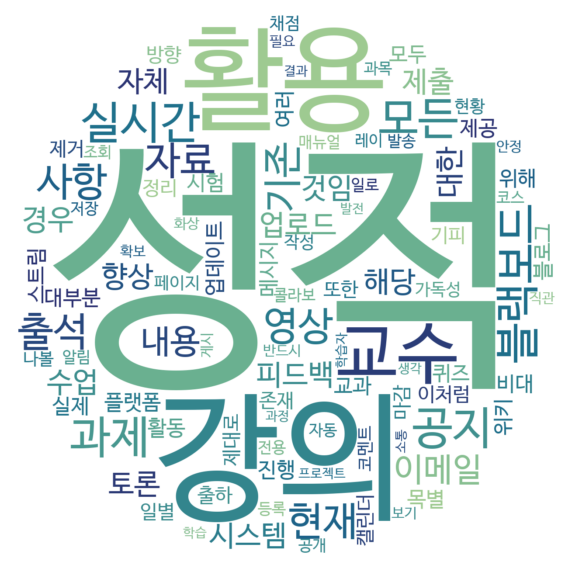

In [ ]:
%%time
# ans_q49 = df_base['q49'].dropna().reset_index()['q49'].tolist()
# ans_joined = ' '.join(ans_q49)
ans_joined = ' '.join(ans_suggestion_q49)

# 워드클라우드 
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(ans_joined, norm=True, stem=True) # POS Tagging

# del_list = ['블랙보드', '시스템', '기능', '유지']  
del_list = ['기능', '유지','확인']  

word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외, 대신 "안, 못"같은 것까지 같이 지워져서 긍정,부정을 파악해야 되는경우는 제외하지 않는다.
            word_cleaned.append(word[0])
        
c = Counter(word_cleaned)

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               width=500, height=500, scale=3.0, max_font_size=250, 
                background_color='white', 
               mask=cand_mask,
               colormap = 'crest') # seaborn color palette

gen = wc.generate_from_frequencies(c)

#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(gen,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
plt.savefig('q49.png')

CPU times: user 836 ms, sys: 38.9 ms, total: 875 ms
Wall time: 875 ms


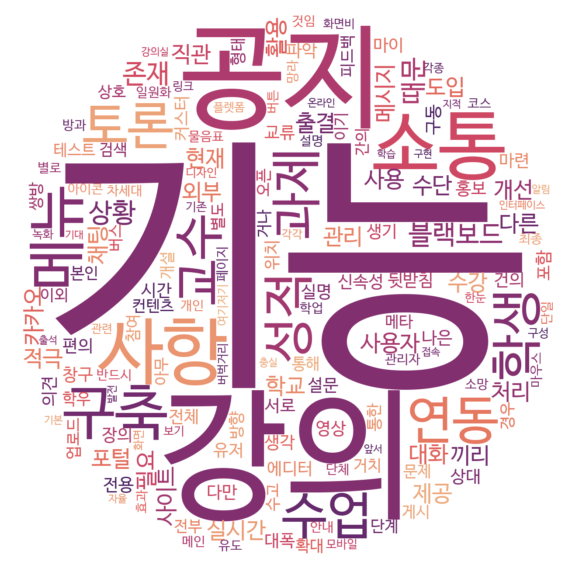

In [ ]:
%%time
ans_q50 = df_base['q50'].dropna().reset_index()['q50'].tolist()
ans_joined = ' '.join(ans_q50)

# 워드클라우드 
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(ans_joined, norm=True, stem=True) # POS Tagging

del_list = ['시스템']  

word_cleaned = []
for word in raw_pos_tagged:
    if word[1] in ["Noun"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외, 대신 "안, 못"같은 것까지 같이 지워져서 긍정,부정을 파악해야 되는경우는 제외하지 않는다.
            word_cleaned.append(word[0])
        
c = Counter(word_cleaned)

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               width=500, height=500, scale=3.0, max_font_size=250, 
                background_color='white', 
               mask=cand_mask,
               colormap = 'flare') # seaborn color palette

gen = wc.generate_from_frequencies(c)

#사이즈 설정 및 출력
plt.figure(figsize=(5,5))
plt.imshow(gen,interpolation='bilinear')
plt.axis('off') # 차트로 나오지 않게
plt.savefig('q50.png')

In [ ]:
df_q50 = df_base['q50'].dropna().reset_index()

In [ ]:
count = 0 
ans_suggestion = []

for ans in df_q50['q50'].tolist(): 
  if '기능' in ans: 
    count += 1 
    #ans_suggestion.append(ans)
    print(ans)

사용이 편리한 에디터가 포함된 토론장 기능
좀 더 원활한 실시간 수업 강의가 가능하도록 했으면 좋겠고 수업마다 전체가 시간순으로 보이도록(공지 과제 성적등) 하는 기능이 생기면 좋겠다.
줌 말고 다른 강의 기능이 도입되면 좋겠습니다
다양한 사용자들과 소통 교류 토론할 수 있는 장의 마련이 필요합니다. 다만, 실명제 혹은 철저한 관리가 뒷받침되어야 순기능을 극대화 할 수 있다고 생각합니다.
UI의 유저 커스터마이징 기능들이 대폭 개선되면 좋을 것 같습니다
서로 소통할 수 있는 창구 필요, 건의와 공지 사항, 적극적인 홍보 기능
본인이 수강한 강의 이외에도 검색해서 찾아서 들을 수 있는 등의 기능이 있다면 더 좋겠습니다.
교수와 학생 수강자 간의 상호 피드백 기능
1. 현재 블랙보드에서는 교수자가 공지사항을 업로드하거나 토론방을 통해 학우 간 대화를 나눌 수 있는 기능이 존재하기는 하지만, 전부 '게시물' 형태의 일방향적 소통 수단이기 때문에 쌍방 소통의 기능이 제공되지 않고 있는 상황임. '메시지' 기능이 존재하기는 하지만 아무도 사용하지 않는 상황이며, 이 때문에 교수자가 별도로 카카오톡 오픈채팅방을 개설하는 수고를 들이는 경우도 존재하는 상황임. 차세대 시스템이 구축된다면 카카오톡 채팅방과 유사한 단체방, 개인 메시지 기능을 반드시 구축해야 할 것이며, 구축에 그치지 않고 적극적으로 활용할 수 있도록 유도해야 할 것임.

2. 학업에 활용되는 수단뿐만 아니라, 최종 성적처리, 출결처리 등까지 총망라하는 일원화된 단일 시스템이 구축되기를 소망함.
현재 기능들은 나쁘지 않으니, 모바일/pc화면에 각각 잘 맞게 화면비가 보기편하고 외부연동잘되고 버벅거리지 않으면 됨
블랙보드내에 학생들이 녹화할수있는 기능
기존 블랙보드, 포털, 각종 사이트가 나뉘어 있어서 여기저기 따로 찾아봐야 하는 것 때문에 힘들었어서 학교 관련 공지와 각 사이트 링크를 한눈에 볼 수 있는 기능이 필요함. 
기본 기능에 충실


In [ ]:
count = 0 
ans_suggestion = []

for ans in df_q50['q50'].tolist(): 
  if '강의' in ans: 
    count += 1 
    #ans_suggestion.append(ans)
    print(ans)

보다 나은 실시간 강의 제공
좀 더 원활한 실시간 수업 강의가 가능하도록 했으면 좋겠고 수업마다 전체가 시간순으로 보이도록(공지 과제 성적등) 하는 기능이 생기면 좋겠다.
줌 말고 다른 강의 기능이 도입되면 좋겠습니다
본인이 수강한 강의 이외에도 검색해서 찾아서 들을 수 있는 등의 기능이 있다면 더 좋겠습니다.
강의실과 연동되는 자율출석시스템
